In [20]:
# import sklearn

# 1.1 Метрика качества. Определения

In [21]:
# Метрика качества – это способ численно оценить модель на основе её предсказаний

In [22]:
# Функции с суффиксом _score 
# измеряют качество модели, основываясь на том, насколько хорошо модель выполняет свою задачу. 
# Эти функции возвращают чем больше, тем лучше: чем выше значение, тем более эффективна модель. 
# Как правило, такие функции применяются для оценки производительности модели на тестовых данных или в процессе кросс-валидации.

# Основная идея: метрики с суффиксом _score оценивают положительные аспекты модели, 
# и их значения варьируются в пределах от 0 до 1 (или, в случае регрессии, от минус бесконечности до некоторого максимума), 
# где чем выше, тем лучше.

In [23]:
# Функции с суффиксом _loss или _error, 
# наоборот, измеряют ошибки модели, то есть то, насколько плохо модель работает. 
# Эти функции возвращают чем меньше, тем лучше: минимизация потерь является целью обучения модели.

# Основная идея: метрики с суффиксом _loss или _error оценивают потери или ошибки, 
# и их значения варьируются от нуля (идеальное предсказание) до бесконечности, 
# где чем меньше значение, тем лучше модель.

In [24]:
# Таким образом, функции с суффиксом _score ориентированы на оценку успешности модели, 
# а функции с суффиксом _loss /_error измеряют потери и ошибки. 
# Их выбор зависит от контекста – обучения модели или её оценки.

In [25]:
# 1. Бинарная классификация:

# Суть: В задачах бинарной классификации каждый объект может быть отнесён к одному из двух классов. 
# Это наиболее простой и интуитивно понятный случай классификации.
# Пример: Классификация писем на "спам" или "не спам", диагностика болезни: "болен" или "здоров".
 

# 2. Многоклассовая классификация (multiclass classification):

# Суть: В задачах многоклассовой классификации каждый объект может принадлежать к одному из нескольких (трёх или более) классов. 
# При этом каждый объект относится только к одному классу.
# Пример: Распознавание цифр (0-9), предсказание типа животного (собака, кошка, птица).
 

# 3. Классификация с несколькими метками (multilabel classification):

# Суть: В задачах с несколькими метками каждый объект может принадлежать одновременно нескольким классам. 
# Это усложняет задачу, так как для каждого объекта нужно предсказать не одну метку, а набор меток.
# Пример: Тегирование фотографий, где изображение может содержать одновременно несколько объектов (например, "кошка", "дерево", "здание").

# 1.2 accuracy_score()

In [26]:
# Метрика accuracy (правильность классификации) – это один из самых простых и часто используемых способов измерения того, 
# насколько хорошо модель справляется с задачей. Он измеряет долю правильных предсказаний модели среди всех предсказаний.

# accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

# Звёздочка (*) в сигнатуре функции accuracy_score() (и других функций в Python) означает, 
# что все параметры, которые следуют за ней, должны передаваться только по имени. 
# То есть такие аргументы нельзя передать позиционно, их нужно указывать явно по имени.

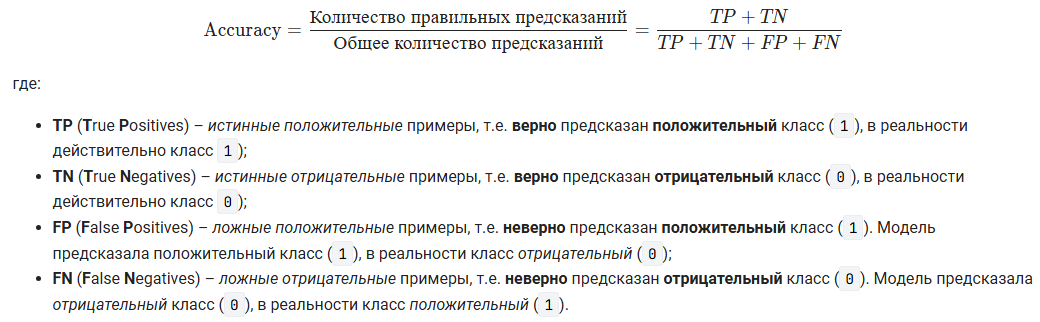

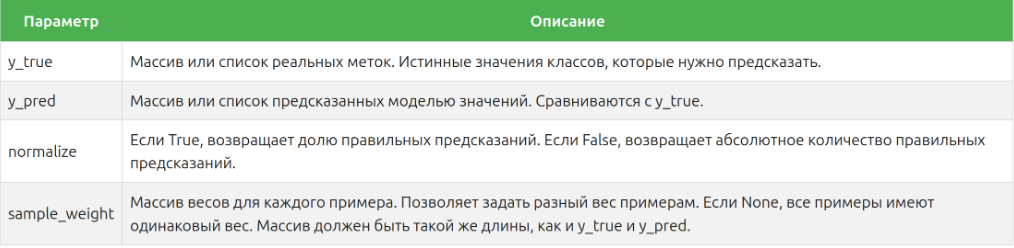

In [27]:
# Рассчитайте метрику accuracy при условии, что 
# положительный класс (1) имеет вес = 2, 
# а отрицательный класс (0) имеет вес = 1

from sklearn.metrics import accuracy_score
import numpy as np

y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weight = np.where(np.array(y_true) == 1, 2, 1)
accuracy = accuracy_score(y_true, y_pred, sample_weight=weight)

accuracy = accuracy_score(y_true, y_pred, sample_weight=weight)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [28]:
y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weights = {0: 1, 1: 2}

sample_weight = [weights[y] for y in y_true]

accuracy = accuracy_score(y_true, y_pred, sample_weight=sample_weight)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


In [29]:
y_true = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0]

weights = {0: 1, 1: 2}

sample_weight = list(map(lambda x: weights[x], y_true))

accuracy = accuracy_score(y_true, y_pred, sample_weight=sample_weight)
accuracy2 = accuracy_score(y_true, y_pred, sample_weight=sample_weight, normalize=False)

print(f'Accuracy: {accuracy:.2f}')
print(f'Количество правильных предсказаний: {accuracy2}')

Accuracy: 0.68
Количество правильных предсказаний: 13.0


# 1.3  confusion_matrix()

In [30]:
# Матрица ошибок представляет собой квадратную таблицу, 
# в которой отображается количество предсказанных и фактических классов для классификационной модели. 
# В этой матрице строки представляют истинные классы (реальные метки), 
# а столбцы представляют предсказанные классы (метки, которые предсказала модель). 
# Размер матрицы соответствует количеству классов.

# confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

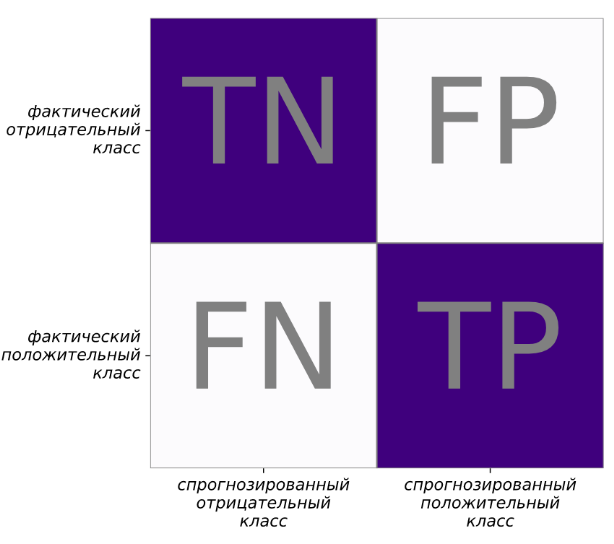

In [31]:
# В статистике ложноположительный пример (FP) называют ошибкой I рода, а ложноотрицательный (FN) – ошибкой II рода.

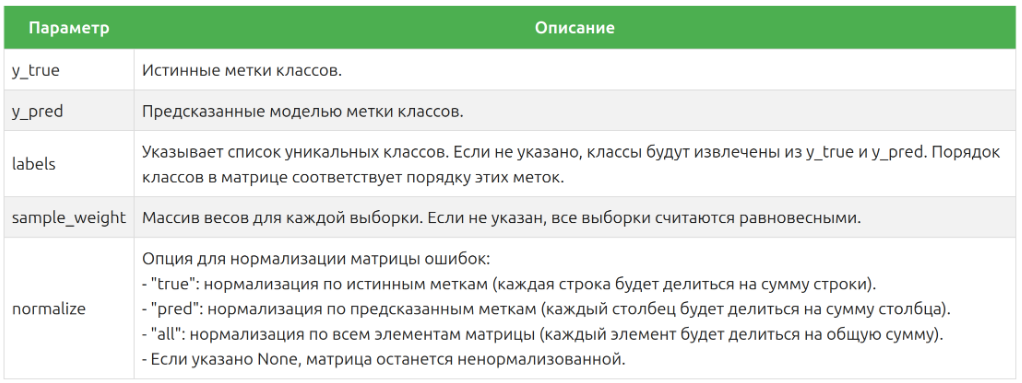

In [32]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 0, 1, 0, 1, 1, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 0, 1, 0, 1, 1, 0]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)
cm

array([[5, 0],
       [1, 3]])

In [33]:
y_true = [0, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0]  # Истинные метки классов
y_pred = [0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 1, 0],
       [1, 5, 0],
       [2, 1, 1]])

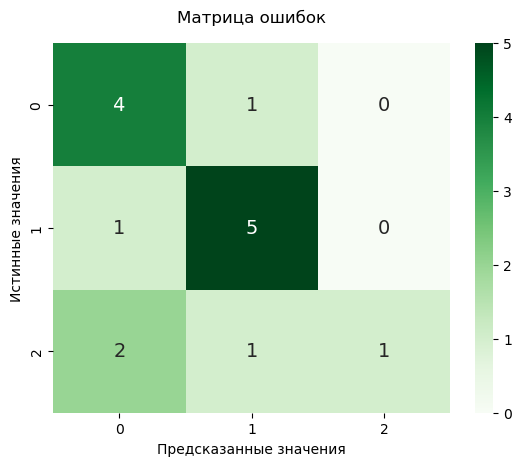

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение тепловой карты
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={'fontsize': 14})
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок', pad=15)
plt.show()

In [35]:
# Параметр labels функции confusion_matrix() 
# позволяет задать порядок классов, для которых будет построена матрица ошибок, 
# а также указать, какие именно классы включить в матрицу.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, labels=['лошадь', 'корова'])
cm

array([[3, 1],
       [2, 1]])

In [36]:
# Параметр normalize функции confusion_matrix() управляет нормализацией матрицы ошибок. 
# Нормализация позволяет представить значения в относительных долях или процентах, а не в абсолютных значениях.

cm = confusion_matrix(y_true, y_pred, normalize='true')
cm

array([[0.33333333, 0.        , 0.66666667],
       [0.        , 1.        , 0.        ],
       [0.25      , 0.        , 0.75      ]])

In [37]:
# Вариант normalize='pred' нормализует по предсказанным меткам, то есть по столбцам.
# Каждый элемент матрицы делится на сумму элементов своей колонки. 
# Это позволяет видеть, насколько уверенно модель классифицирует примеры в каждый класс. 
# Например, если модель часто ошибочно предсказывает какой-то класс, 
# это будет отражено высокой нормализованной долей в этой колонке.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, normalize='pred')
cm

array([[0.5, 0. , 0.4],
       [0. , 1. , 0. ],
       [0.5, 0. , 0.6]])

In [38]:
# Если normalize='all', то происходит нормализация по всей матрице, 
# то есть каждый элемент делится на общее количество предсказаний. 
# Таким образом, каждый элемент матрицы отражает долю всех предсказаний, которые попали в конкретную ячейку. 
# Это даёт общее представление о том, насколько часто модель делает правильные предсказания или ошибается.

y_true = ['корова', 'лошадь', 'кошка', 'кошка', 'лошадь', 'корова', 'корова', 'лошадь', 'лошадь']
y_pred = ['лошадь', 'лошадь', 'кошка', 'кошка', 'корова', 'лошадь', 'корова', 'лошадь', 'лошадь']

cm = confusion_matrix(y_true, y_pred, normalize='all')
cm

array([[0.11111111, 0.        , 0.22222222],
       [0.        , 0.22222222, 0.        ],
       [0.11111111, 0.        , 0.33333333]])

In [39]:
# Воспользуемся данными датасета digits библиотеки scikit-learn.

# В датасете digits содержатся изображения рукописных цифр (от 0 до 9) размером 8x8 пикселей, 
# и каждый пиксель изображения представлен числовым значением интенсивности (оттенка серого). 
# Столбцы с именами pixel_0_0, pixel_0_1, ..., pixel_7_7 представляют собой значения интенсивности пикселей в этих изображениях.

# Столбцы названы в формате pixel_<row>_<col>, где <row> – это индекс строки (от 0 до 7), а <col> – индекс столбца (от 0 до 7).

# Каждое значение в этих столбцах – это числовое значение интенсивности пикселя, обычно в диапазоне от 0 до 16, где:

# 0 представляет собой белый цвет (отсутствие чернил).
# 16 представляет собой чёрный цвет (полностью закрашенный пиксель).


import pandas as pd
from sklearn.datasets import load_digits

# Загрузка датасета digits
digits = load_digits()

# Преобразование данных в DataFrame
# digits.data содержит массив с признаками, а digits.target - целевые значения
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)

# Добавление колонки с метками классов
df['target'] = digits.target

# Просмотр последних 5 строк DataFrame
display(df.tail())

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
1792        0.0        0.0        0.0        1.0  ...        0.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        0.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        0.0        0.0   

      pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
1792        0.0        2.0       14.0       15.0        9.0        0.0   
1793        0.0        6.0       16.0       14.0        6.0        0.0   
1794        0.0        2.0        9.0       13.0        6.0        0.0   
1795        0.0        5.0       12.0       16.0       12.0        0.0   
1796        1.0        8.0       12.0       14.0       12.0        1.0   

      pixel_7_7  target  
1792        0.0       9  
1793        0.0       0  
1794        0.0       8  
1795        0.0       9  
1796        0.0       8  

[5 rows x 65 columns]

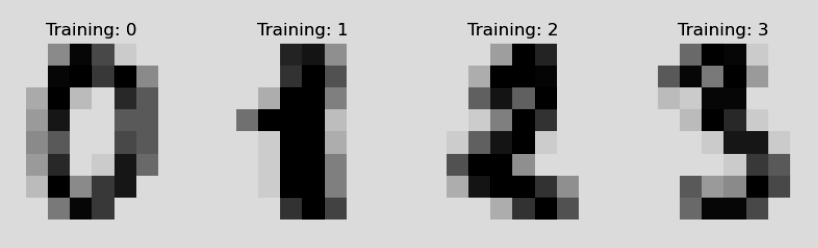

In [40]:
# Разделим данные на признаки и целевую переменную:

X = df.drop('target', axis=1)
y = df['target']

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [41]:
# Далее разделим данные на обучающие и тестовые выборки:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Для демонстрации работы функции confusion_matrix() будем использовать модель случайного леса. 
# Создадим объект класса RandomForestClassifier(), 
# затем обучим модель и сделаем предсказания, 
# а далее при помощи функции confusion_matrix() сформируем матрицу ошибок и выведем её на печать:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


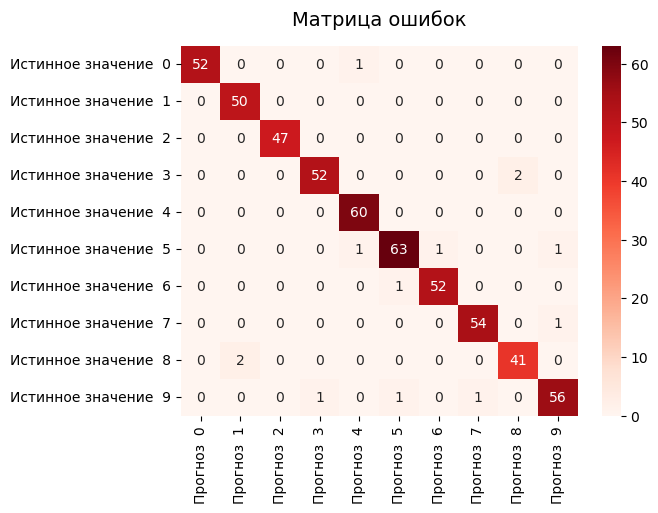

In [43]:
# Для более наглядного отображения матрицы ошибок, построим тепловую карту:

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=[f'Прогноз  {i}' for i in range(10)],
            yticklabels=[f'Истинное значение  {i}' for i in range(10)])
plt.title('Матрица ошибок', pad=15, fontsize=14)
plt.show()

In [44]:
y_true = [1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1]  # Истинные метки классов
y_pred = [2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 1]  # Предсказанные метки классов

cm = confusion_matrix(y_true, y_pred)

print(cm)

[[1 2 0]
 [2 3 2]
 [1 1 3]]


# 1.4 multilabel_confusion_matrix()

In [45]:
# Функция multilabel_confusion_matrix()
# используется для построения матриц ошибок для каждой метки (или класса) в многометочной классификации. 
# Она расширяет стандартную матрицу ошибок, которая обычно применяется для бинарной или многоклассовой классификации, 
# на многометочные задачи, где каждый образец может принадлежать нескольким классам одновременно.

# Многометочная классификация – это ситуация, когда один и тот же образец может иметь несколько меток. 
# Например, изображение может быть одновременно отмечено как «собака», «животное» и «питомец».
# Для каждого класса строится отдельная бинарная матрица ошибок, которая показывает, 
# как правильно или неправильно были предсказаны метки для данной категории.

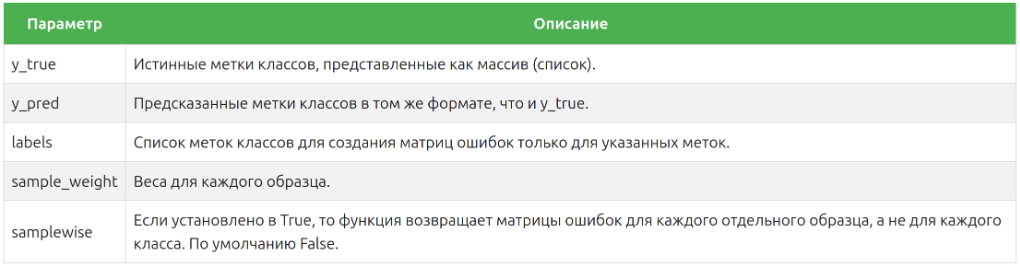

Данные для матрицы ошибок<br><br>
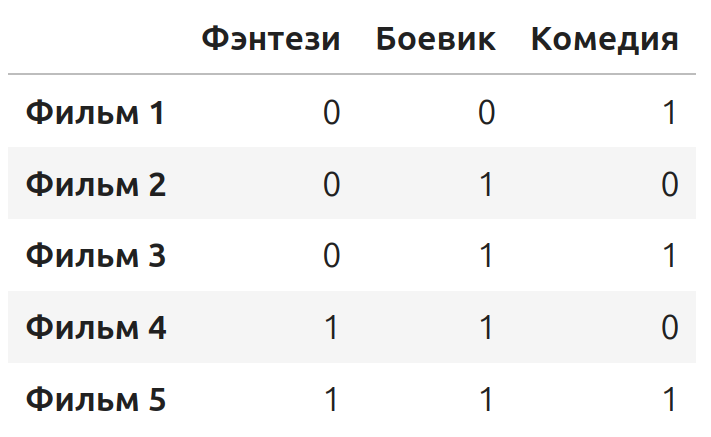

In [46]:
from sklearn.metrics import multilabel_confusion_matrix

# Истинные метки классов
y_true = [[0, 0, 1], 
          [0, 1, 0], 
          [0, 1, 1], 
          [1, 1, 0], 
          [1, 1, 1]]

# Предсказанные метки классов
y_pred = [[1, 0, 0], 
          [0, 1, 1], 
          [1, 0, 1], 
          [1, 1, 0], 
          [1, 1, 1]]

# Вычисление многометочных матриц ошибок
mcm = multilabel_confusion_matrix(y_true, y_pred)

print(mcm)

# В итоге сформировались три матрицы ошибок – по одной для каждого класса. 
# Первая матрица – для класса "Фэнтези", 
# вторая – для "Боевик" и 
# третья – для "Комедия".

[[[1 2]
  [0 2]]

 [[1 0]
  [1 3]]

 [[1 1]
  [1 2]]]


In [47]:
# Параметр samplewise функции multilabel_confusion_matrix() позволяет получать более детальную информацию о работе модели, 
# разбивая результаты по каждому образцу (sample) в наборе данных.

In [48]:
# Истинные метки классов
y_true = [[0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 0], [1, 1, 1]]

# Предсказанные метки классов
y_pred = [[1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]]

# Вычисление многометочных матриц ошибок
mcm = multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

print(mcm)

# В итоге сформировалось пять матриц ошибок – по одной для каждого примера. 
# Первая матрица – для примера "Фильм 1", 
# вторая - для примера "Фильм 2" 
# и т.д.

[[[1 1]
  [1 0]]

 [[1 1]
  [0 1]]

 [[0 1]
  [1 1]]

 [[1 0]
  [0 2]]

 [[0 0]
  [0 3]]]


0 мандарин
1 апельсин
2 лимон


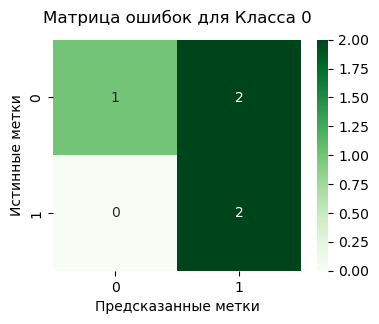

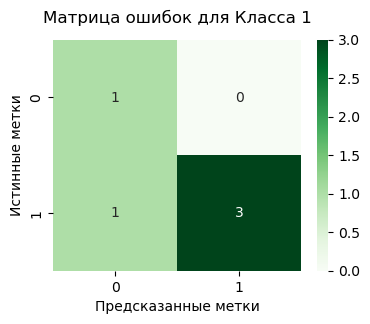

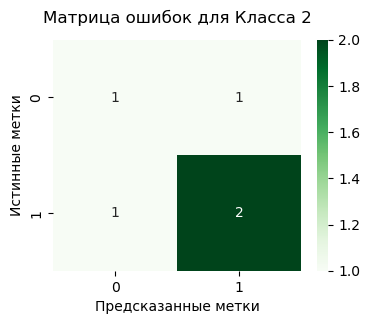

In [49]:
fruits = ['мандарин', 'апельсин', 'лимон']

for index, fruit in enumerate(fruits):
    print(index, fruit)

# Истинные метки классов
y_true = [[0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 1, 0], [1, 1, 1]]

# Предсказанные метки классов
y_pred = [[1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1, 1, 1]]

mcm = multilabel_confusion_matrix(y_true, y_pred)

for i, matrix in enumerate(mcm):
    plt.figure(figsize=(4, 3))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Матрица ошибок для Класса {i}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.show()

In [50]:
from sklearn.datasets import make_multilabel_classification

# Генерация данных
X, y = make_multilabel_classification(n_samples=300, n_classes=3, 
                                      n_labels=2, n_features=5, random_state=42)

# Преобразование признаков в DataFrame
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Преобразование меток классов в DataFrame
y = pd.DataFrame(y, columns=[f'class_{i}' for i in range(y.shape[1])])

# Просмотр первых строк DataFrame
print('Признаки:', X.head(), sep='\n', end='\n\n') 
print('Целевая переменная:', y.head(), sep='\n',)

# Аргументы функции, использованные в примере:

# n_samples=300: Количество создаваемых объектов (образцов данных) = 300.
# n_classes=3: Количество классов, к которым могут относиться объекты, = 3.
# n_labels=2: Количество меток классов, которые могут быть присвоены каждому объекту = 2. Это означает, что каждый объект будет связан с двумя классами из трёх.
# n_features=5: Количество признаков (features), которые будут использоваться для описания каждого объекта = 5.
# random_state=42: Фиксирует генератор случайных чисел, чтобы каждый раз получать одни и те же данные при одинаковых параметрах (для воспроизводимости).

Признаки:
   feature_0  feature_1  feature_2  feature_3  feature_4
0        6.0       22.0        1.0        3.0        9.0
1        8.0        4.0       16.0       10.0        5.0
2        5.0       27.0       14.0        4.0       10.0
3        7.0       19.0       11.0       10.0       14.0
4        6.0       18.0       13.0        6.0       12.0

Целевая переменная:
   class_0  class_1  class_2
0        0        1        0
1        1        0        1
2        0        1        1
3        1        1        1
4        0        1        1


In [51]:
# Для демонстрации работы функции make_multilabel_classification() будем использовать модель случайного леса. 
# Создадим объект класса RandomForestClassifier(), предварительно разделив данные на обучающие и тестовые выборки. 
# Затем обучим модель и сделаем предсказания, 
# а далее при помощи функции multilabel_confusion_matrix()сформируем матрицу ошибок и выведем её на печать:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mcm = multilabel_confusion_matrix(y_test, y_pred)

print(mcm)

[[[41  8]
  [12 29]]

 [[30  9]
  [ 9 42]]

 [[35  5]
  [ 5 45]]]


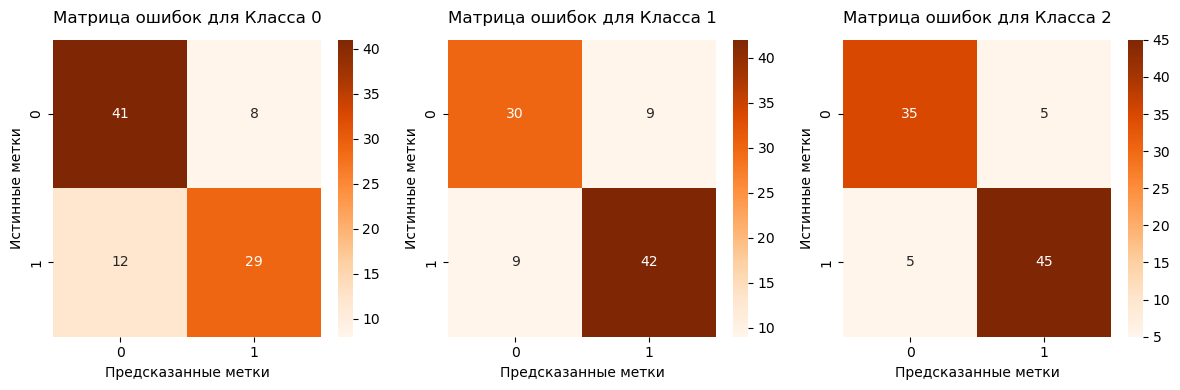

In [52]:
# И сделаем визуализацию этих данных, расположив матрицы горизонтально:

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 4))

gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Oranges', ax=ax)
    ax.set_title(f'Матрица ошибок для Класса {i}', pad=12)
    ax.set_xlabel('Предсказанные метки')
    ax.set_ylabel('Истинные метки')
    
plt.tight_layout()
plt.show()

In [53]:
# Выборка y_test содержит 90 примеров, значит у нас сформировалось 90 матриц ошибок.
mcm = multilabel_confusion_matrix(y_test, y_pred, samplewise=True)
len(mcm)

90

In [54]:
# Допустим, нам нужно посмотреть на некоторые из них, например, с индексами 10, 11, 12 - выведем их на печать:

print(mcm[10:13])

[[[1 1]
  [0 1]]

 [[2 0]
  [0 1]]

 [[1 0]
  [0 2]]]


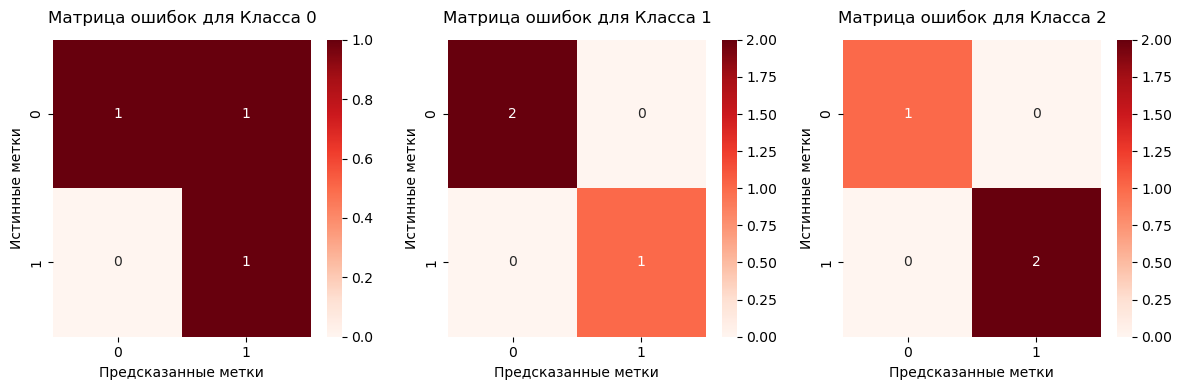

In [55]:
# И визуализируем эти матрицы:

fig = plt.figure(figsize=(12, 4))

gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm[10:13]):
    ax = fig.add_subplot(gs[0, i])
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds', ax=ax)
    ax.set_title(f'Матрица ошибок для Класса {i}', pad=12)
    ax.set_xlabel('Предсказанные метки')
    ax.set_ylabel('Истинные метки')
    
plt.tight_layout()
plt.show()

In [56]:
# Набор данных содержит четыре класса.  Выведите на печать матрицы ошибок только для третьего и четвёртого классов.

y_true = [[0, 0, 1, 0], [0, 1, 0, 0], [0, 1, 1, 1], [1, 1, 0, 0], [1, 1, 1, 1]]
y_pred = [[1, 0, 0, 0], [0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]

print(multilabel_confusion_matrix(y_true, y_pred, samplewise=False)[2:5])
print()
print()
print(multilabel_confusion_matrix(y_true, y_pred, labels=[2,3]))

[[[1 1]
  [1 2]]

 [[2 1]
  [1 1]]]


[[[1 1]
  [1 2]]

 [[2 1]
  [1 1]]]


# 1.5 ConfusionMatrixDisplay

In [57]:
# Помимо библиотеки seaborn и её функцию heatmap() для наглядной визуализации матриц ошибок 
# в самой библиотеке scikit-learn имеется класс ConfusionMatrixDisplay, 
# который позволяет визуализировать матрицы ошибок. 
# Класс ConfusionMatrixDisplay использует инструменты библиотеки matplotlib для визуализации матриц ошибок.

# ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)

# confusion_matrix: Непосредственно сама матрица ошибок, которую необходимо визуализировать.
# display_labels: Метки для классов, которые будут отображаться на графике.

[[4 2]
 [1 3]]


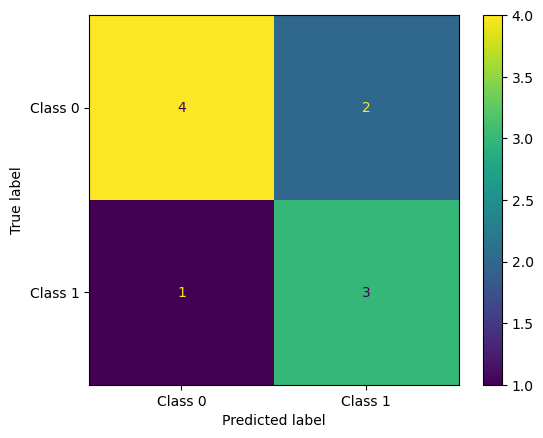

In [58]:
# Для того, чтобы произвелось графическое отображение матрицы ошибок, 
# нужно дополнительно использовать метод plot() класса ConfusionMatrixDisplay


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Истинные метки классов
y_true = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

# Предсказанные моделью метки
y_pred = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

cm = confusion_matrix(y_true, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()

plt.show()

In [59]:
# Метод plot() 
# запускает отрисовку графика, фактически выводя матрицу ошибок на экран, 
# где каждая ячейка показывает количество предсказаний для комбинаций «истинное значение - предсказанное значение». 
# Метод plot() автоматически использует matplotlib для построения графика, 
# но сам метод принадлежит scikit-learn, 
# и именно scikit-learn вызывает отрисовку через встроенные инструменты matplotlib.

# plot(*, include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format=None, 
#      ax=None, colorbar=True, im_kw=None, text_kw=None)

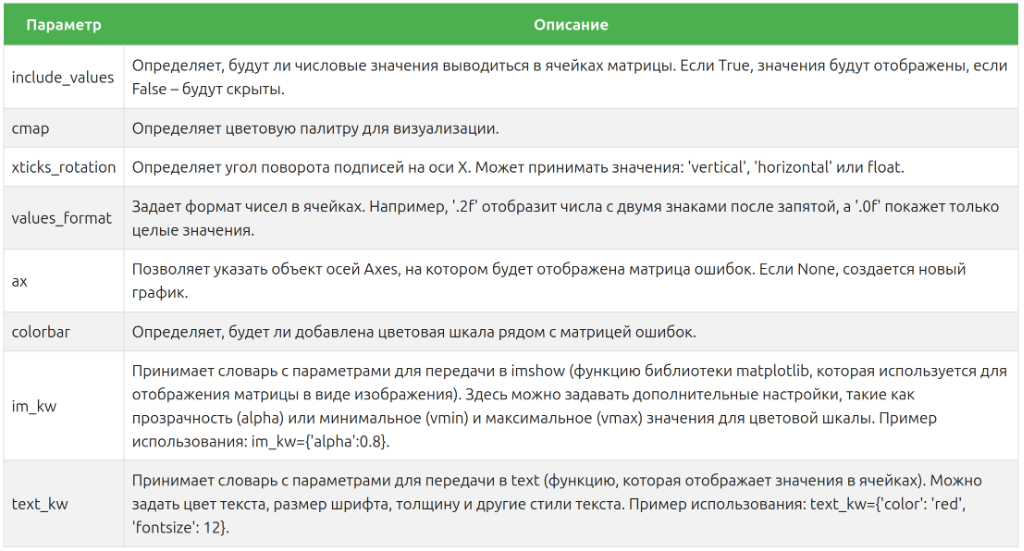

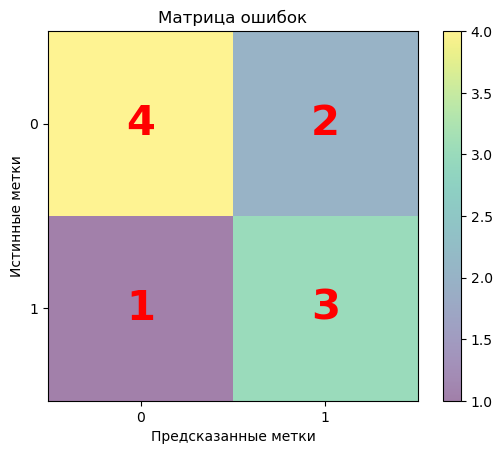

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

y_true = np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0])
y_pred = np.array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(im_kw={'alpha': 0.5},
          text_kw={'color': 'red', 
                   'fontsize': 30, 
                   'fontweight': 'bold'})

plt.title('Матрица ошибок')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

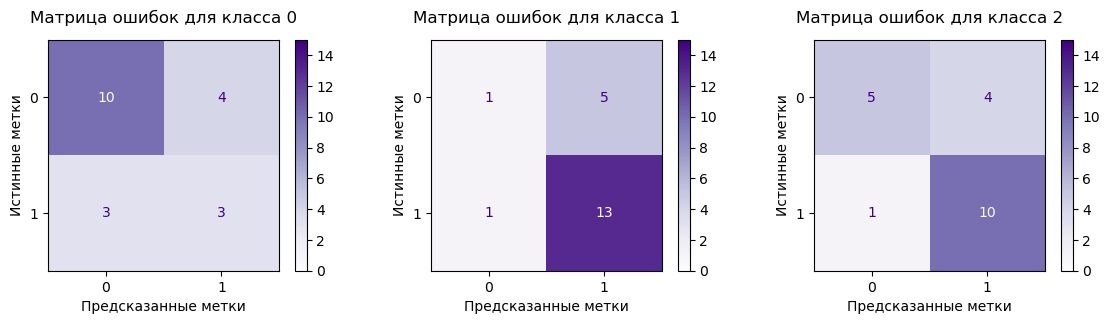

In [61]:
# Для многометочной классификации


# Генерация многометочных данных
X, y = make_multilabel_classification(n_samples=100, n_classes=3, n_labels=2, random_state=42)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели случайного леса
model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)

# Вычисление многометочной матрицы ошибок
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Визуализация многометочной матрицы ошибок для каждой метки с горизонтальным отображением
fig = plt.figure(figsize=(14, 3))
gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=mcm[i])
    disp.plot(cmap='Purples', im_kw={'vmin': 0, 'vmax': 15}, ax=ax)
    plt.title(f'Матрица ошибок для класса {i}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')

plt.show()

In [62]:
mcm

array([[[10,  4],
        [ 3,  3]],

       [[ 1,  5],
        [ 1, 13]],

       [[ 5,  4],
        [ 1, 10]]])

# 1.6 precision_score()

In [63]:
# Одной из наиболее часто используемых метрик качества для задач классификации, является метрика precision (точность). 
# Метрика precision "работает" с предсказанными образцами положительного класса. 
# Если посмотреть на матрицу ошибок для бинарной классификации, 
# то для расчёта precision задействуются значения правой части матрицы: FP (False Positive) и TP (True Positive).

In [64]:
# Точность представляет собой долю правильно классифицированных положительных образцов среди всех предсказанных положительных. 
# В основе precision лежит стремление к снижению ложноположительных срабатываний, что особенно важно, когда ошибка может иметь последствия.

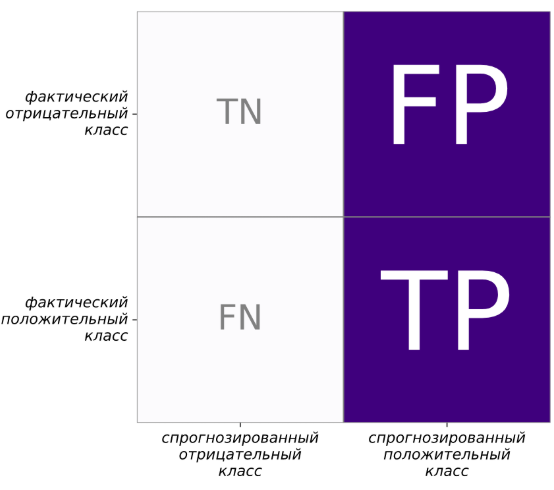

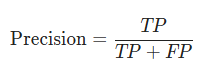

In [65]:
# где:

# TP (True Positive) – количество правильно классифицированных положительных образцов 
# (предсказан положительный класс, и фактически класс является положительным),
# FP (False Positive) – количество неправильно классифицированных положительных образцов 
# (предсказан положительный класс, но фактически класс является отрицательным).

In [66]:
# Несколько случаев, в которых важны высокие значения метрики precision:

# Оптимизация затрат и риска: 
# В задачах обнаружения мошенничества или кибербезопасности precision помогает не распылять ресурсы на ложные срабатывания. 
# Представьте, если каждая ложноположительная транзакция рассматривалась бы банком как мошенническая – 
# это привело бы к недовольству клиентов и значительным операционным издержкам.

# Фильтрация спама: 
# В фильтрах электронной почты важно, чтобы обычные письма не попадали в папку спама. 
# Precision помогает снизить количество «чистых» писем, ошибочно классифицированных как спам.

# Выявление дефектов на производстве: 
# При контроле качества в производственных процессах важно минимизировать ложные срабатывания, 
# чтобы снизить вероятность ошибочной маркировки качественного продукта как дефектного, 
# что может привести к излишним затратам и снижению эффективности.

# Рекомендательные системы в e-commerce: 
# Для точных рекомендаций товаров важно, чтобы рекомендации не приводили к раздражению пользователя из-за нерелевантных предложений. 
# Высокая точность (precision) помогает предложить только те товары, которые с наибольшей вероятностью интересуют пользователя.

# Обнаружение отказов в автомобилях: 
# В системах предупреждения о неисправностях в автомобилях ложные срабатывания 
# могут привести к лишним визитам в сервис и ухудшению восприятия пользователя. 
# Высокая точность помогает предупредить лишь о тех неисправностях, которые действительно требуют вмешательства.

# Выявление токсичных комментариев в соцсетях: 
# В системах модерации контента важно, чтобы алгоритм точно распознавал токсичные комментарии, чтобы не блокировать невинные высказывания. 
# Высокая точность позволяет снизить количество ложноположительных срабатываний и повысить качество автоматической модерации.

# Идентификация лояльных клиентов в CRM: 
# При выборе клиентов для специальных предложений важно, 
# чтобы выборка была точной и содержала только действительно заинтересованных клиентов. 
# Это помогает не переплачивать за маркетинговые акции, направленные на неподходящую аудиторию.

In [67]:
# precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None,
#                 zero_division='warn')

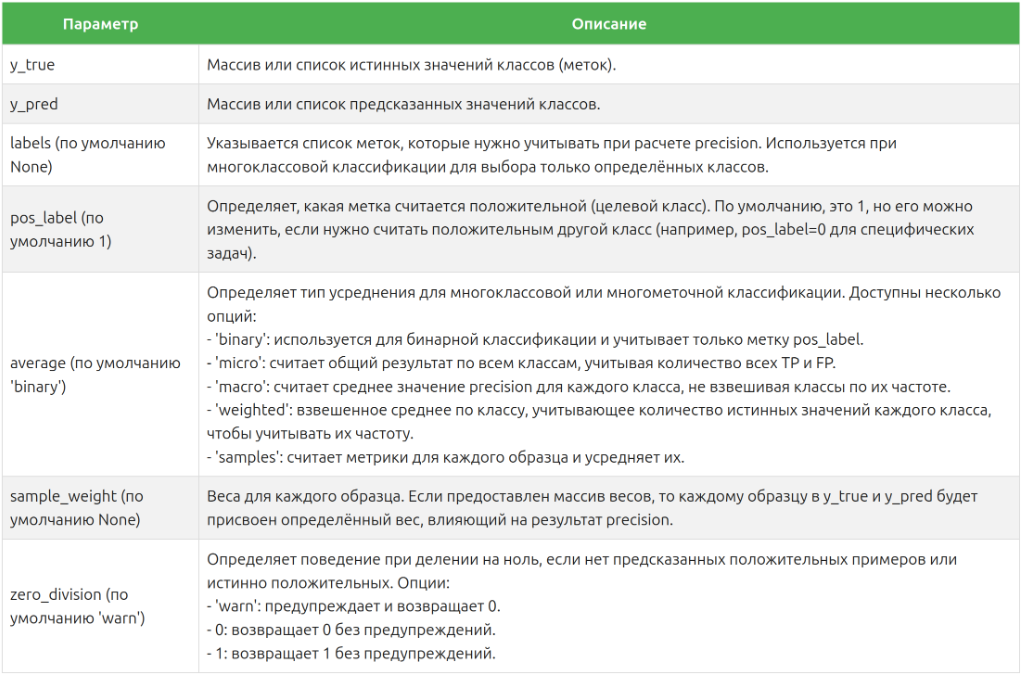

In [68]:
from sklearn.metrics import precision_score

# Истинные метки классов
y_true = [0, 1, 1, 0, 0, 0, 0, 1, 0]

# Предсказанные метки классов
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0]

# Вычисление точности
precision = precision_score(y_true, y_pred)

print(f'Precision: {precision:.2f}')

Precision: 0.75


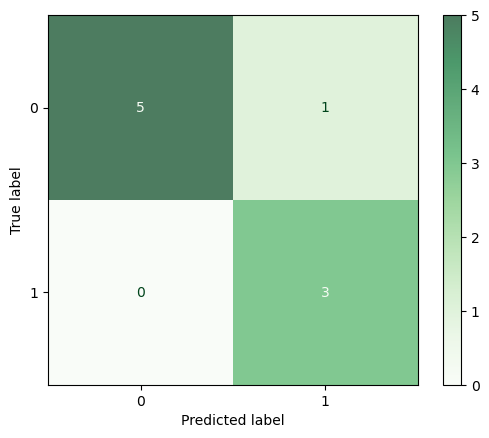

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Greens', im_kw={'alpha': 0.7})

plt.show()

In [70]:
# Сымитируем задачу классификации мошеннических транзакций. Для этого создадим датасет с большой диспропорцией двух классов:

from sklearn.datasets import make_classification

# Создаем синтетический набор данных
# Здесь класс 1 будет представлять мошеннические транзакции
X, y = make_classification(
    n_samples=1000,       # количество транзакций
    n_features=20,        # количество признаков
    n_classes=2,          # два класса: мошенническая (1) и легитимная (0)
    weights=[0.95, 0.05], # несимметричное распределение (5% мошеннических)
    random_state=42)

In [71]:
# Разделим эти данные на обучающую и тестовую выборки. 
# После чего, обучим модель случайного леса и сделаем предсказания на тестовой выборке, 
# и вычислим метрики precision и accuracy:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Вычисляем accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Precision: 0.80
Accuracy: 0.97


In [72]:
# Данный пример позволяет наглядно увидеть, что если бы мы в оценке результата обучения модели опирались на метрику accuracy, 
# то данная модель нас вполне могла бы устроить, так как оценка, равная 0.97, является достаточно высокой. 
# Но метрика precision показывает нам, что точность модели 
# при определении положительного класса (мошеннических транзакций) составляет только 80%.

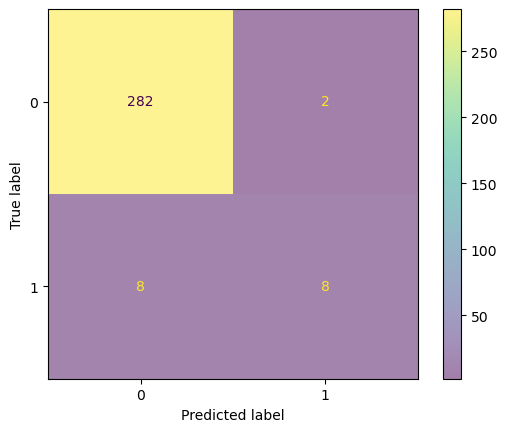

In [73]:
# Отобразим матрицу ошибок:

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(im_kw={'alpha': 0.5})

plt.show()

In [74]:
# Из 10-ти транзакций, которые модель посчитала противоправными, восемь – это мошеннические, 
# а две являются легитимными транзакциями, и отнесены к противозаконным ошибочно. 
# Соответственно, точность предсказаний модели равна 0.8.

In [75]:
# Параметр average функции precision_score()
# Параметр average функции precision_score() определяет, 
# как будут объединены метрики точности для многоклассовых и многометочных задач, 
# что позволяет гибко выбирать подход, наиболее подходящий для конкретного анализа.

# Его настройка особенно важна, если вы работаете с несимметричными задачами классификации, 
# где классы могут быть представлены в неравной пропорции или иметь разное значение для решения задачи.

## average='binary'

In [76]:
# average='binary'
# Применяется по умолчанию. 
# Используется для бинарной классификации и рассчитывает точность только для положительного класса (который помечен как 1). 
# В этом режиме precision_score() оценивает долю корректно классифицированных положительных объектов 
# относительно всех предсказанных положительных.

## average='micro'

In [77]:
# average='micro'
# Параметр average='micro' актуален, когда нужно вычислить точность по всем классам в задаче классификации с несколькими классами, 
# учитывая каждый экземпляр (True Positive и False Positive) одинаково, вне зависимости от класса. 
# Это полезно, когда требуется общий уровень точности, а не усредненная оценка по классам.

# Формула для расчета micro-average precision объединяет все истинные положительные (TP) 
# и ложные положительные (FP) предсказания по всем классам, чтобы получить общую точность.

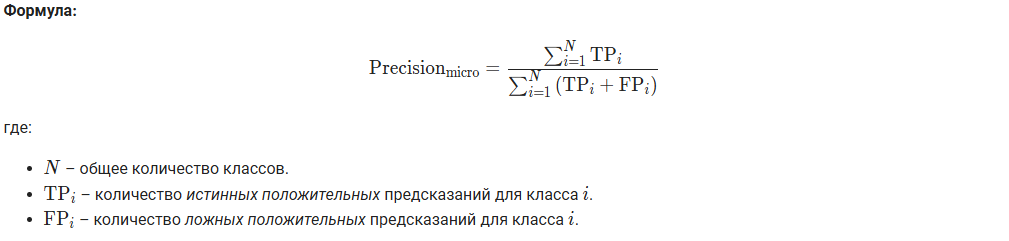

In [78]:
# Допустим, что у нас имеются два списка с истинными метками классов y_true и предсказанными метками классов y_pred:

y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
  
# Посмотрим на количество экземпляров в каждом классе в этих списках:

from collections import Counter

counts_true = Counter(y_true)
counts_pred = Counter(y_pred)

print('y_true:', counts_true)
print('y_pred:', counts_pred)

y_true: Counter({0: 45, 1: 30, 2: 30})
y_pred: Counter({0: 40, 2: 40, 1: 25})


In [79]:
# Рассчитаем метрику micro-average precision для этих данных:

from sklearn.metrics import precision_score

y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
          1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 
          2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

# Вычисляем метрику точности (precision) для average='micro'
precision_micro = precision_score(y_true, y_pred, average='micro')

print(f'Micro-average Precision: {precision_micro:.3f}')

Micro-average Precision: 0.714


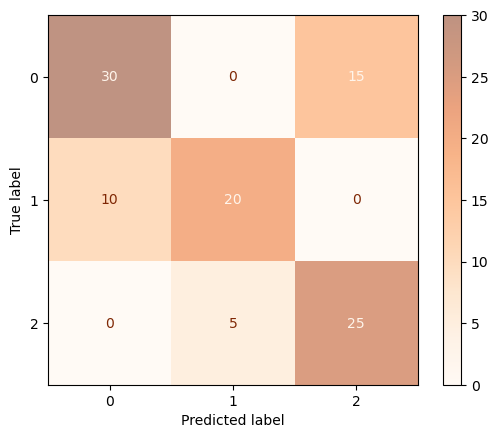

In [80]:
# Теперь давайте рассчитаем эту метрику вручную, используя приведённую выше формулу. 
# Сначала отобразим матрицу ошибок:

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Oranges', im_kw={'alpha': 0.5})

plt.show()

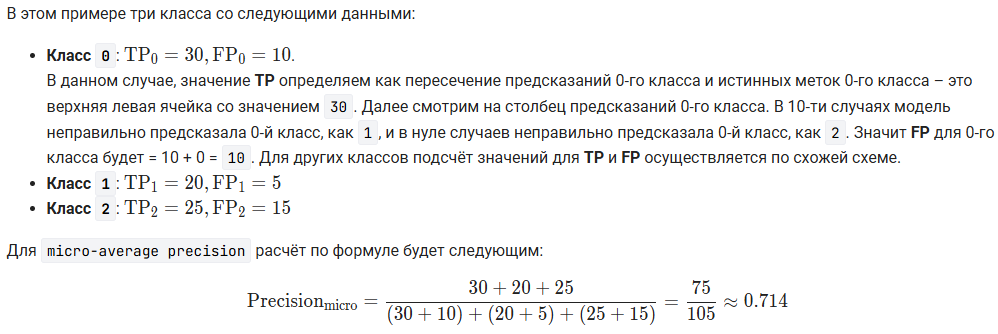

In [81]:
# Итак, параметр average='micro' считает precision для каждого истинного и ложного прогноза, 
# независимо от класса, что даёт общее представление о точности модели по всем категориям сразу.
 
# Это может быть актуально, если одна категория доминирует, и точность в целом важнее, чем для каждого класса отдельно.

## average='macro'

In [82]:
# average='macro'
# В формуле для расчета macro-average precision, для каждого класса рассчитывается его точность, 
# а затем все эти значения усредняются. 

# Macro-average не учитывает количество экземпляров в каждом классе, что позволяет избежать искажений, 
# связанных с доминированием классов с большим количеством примеров.

#  Этот подход важен, когда классы представлены неравномерно, так как он не зависит от их распределения, 
# делая акцент на равномерной важности каждого класса.

# Пример: Если модель классифицирует разные типы заболеваний, average='macro' покажет, 
# насколько точно модель предсказывает каждую болезнь, независимо от того, насколько редко или часто она встречается.

In [83]:
# Вычисляем метрику точности (precision) для average='macro'
precision_macro = precision_score(y_true, y_pred, average='macro')

print(f'Macro-average Precision: {precision_macro}')

Macro-average Precision: 0.725


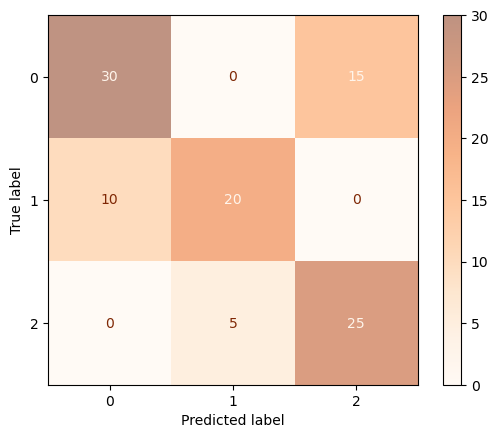

In [84]:
disp.plot(cmap='Oranges', im_kw={'alpha': 0.5})

plt.show()

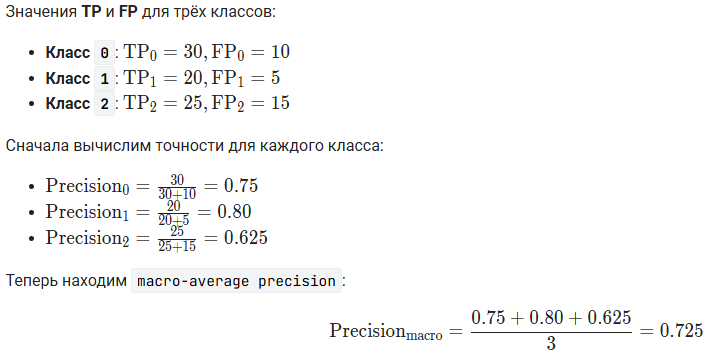

In [85]:
# Итак, macro-average precision позволяет оценить общую производительность модели, уделяя равное внимание каждому классу. 
# Это может быть важно для обеспечения того, чтобы модель хорошо работала для всех классов, независимо от их частоты в наборе данных.

## average='weighted'

In [86]:
# average='weighted'
# Параметр average='weighted' функции precision_score() усредняет метрики каждого класса с учетом их пропорции (или веса) в тестовой выборке.

# Формула для расчета weighted-average precision учитывает количество экземпляров в каждом классе 
# и позволяет получать более сбалансированную оценку, особенно в задачах с несбалансированными классами.

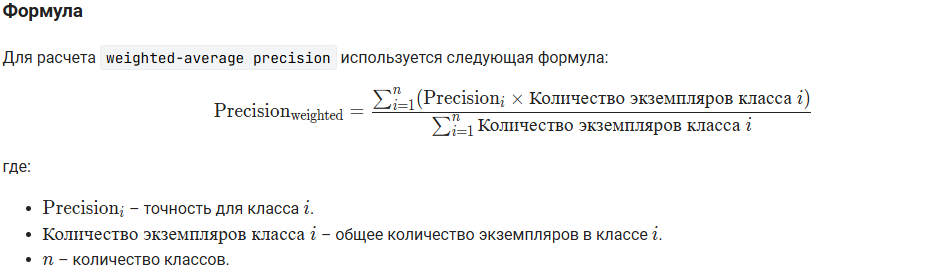

In [87]:
# Вычисляем метрику точности (precision) для average='weighted'
precision_weighted = precision_score(y_true, y_pred, average='weighted')

print(f'Weighted-average Precision: {precision_weighted:.3f}')

Weighted-average Precision: 0.729


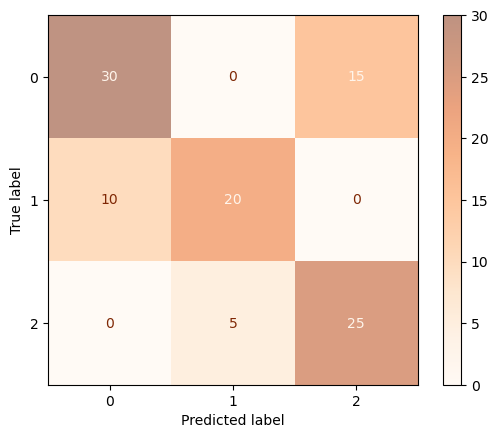

In [88]:
disp.plot(cmap='Oranges', im_kw={'alpha': 0.5})

plt.show()

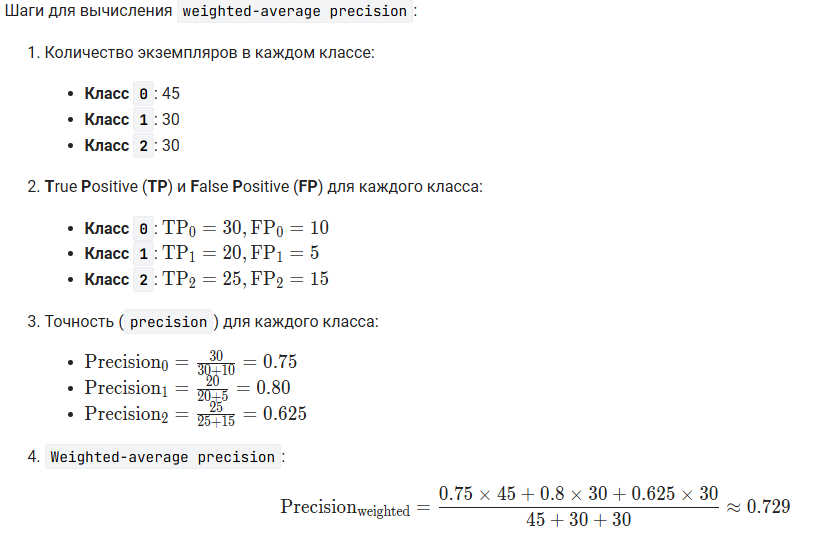

In [89]:
# Интерпретация метрики weighted-average precision:

# Если weighted-average precision высокое, это означает, 
# что модель хорошо предсказывает наиболее распространенные классы, так как их точность имеет наибольший вес.

# Если значение weighted-average precision низкое, 
# то модель не справляется с точными предсказаниями для крупных классов, что может быть критично, 
# если доминирующие классы имеют высокий практический интерес.

# Таким образом, weighted-average precision полезен, когда приоритет отдается более крупным классам, 
# а не редким, и важно, чтобы точность по основным классам была максимальной.

## average='samples'

In [90]:
# average='samples'
# Подходит для многометочной классификации, в которой каждому образцу может быть назначено несколько меток. 
# В этом случае точность рассчитывается для каждого образца, а затем усредняется по всем образцам. 

# Такой подход важен для задач, где одно наблюдение может принадлежать сразу нескольким классам, 
# например, как в классификации текстов по нескольким тематикам.

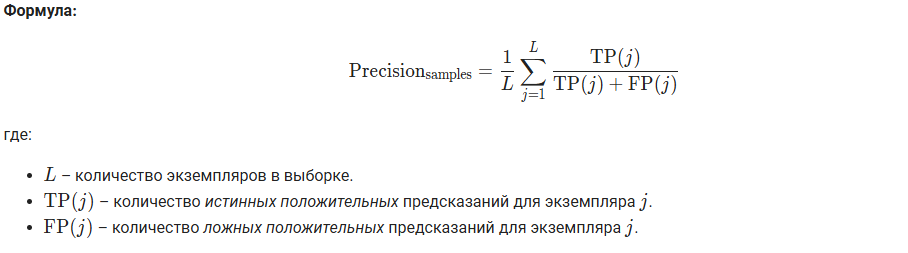

In [91]:
# Например, у нас имеются следующие два массива с истинными и предсказанными метками:

import numpy as np

y_true = np.array([[1, 0, 1],  # Образец 1 принадлежит к классам 0 и 2
                   [0, 1, 0],  # Образец 2 принадлежит к классу 1
                   [1, 1, 0],  # Образец 3 принадлежит к классам 0 и 1
                   [0, 0, 1]]) # Образец 4 принадлежит к классу 2

y_pred = np.array([[1, 0, 0],  # Образец 1 предсказан с классом 0
                   [0, 1, 0],  # Образец 2 предсказан с классом 1
                   [1, 0, 1],  # Образец 3 предсказан с классами 0 и 2
                   [0, 0, 1]]) # Образец 4 предсказан с классом 2

In [92]:
# При помощи функции precision_score() с параметром average='samples' рассчитаем точность:

from sklearn.metrics import precision_score

precision_samples = precision_score(y_true, y_pred, average='samples')

print(f'Samples-average Precision: {precision_samples:.3f}')

Samples-average Precision: 0.875


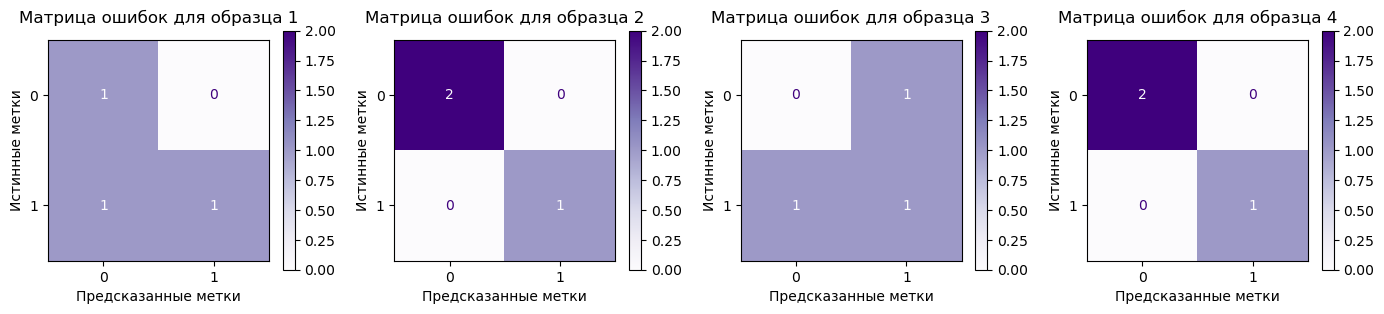

In [93]:
# Давайте также вручную рассчитаем точность. 
# Сначала отобразим матрицу ошибок для каждого образца:

from matplotlib.gridspec import GridSpec
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Вычисление многометочной матрицы ошибок
mcm = multilabel_confusion_matrix(y_true, y_pred, samplewise=True)

# Визуализация многометочной матрицы ошибок для каждого образца с горизонтальным отображением
fig = plt.figure(figsize=(14, 3))
gs = GridSpec(nrows=1, ncols=len(mcm), figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=mcm[i])
    disp.plot(cmap='Purples', im_kw={'vmin': 0, 'vmax': 2}, ax=ax)
    plt.title(f'Матрица ошибок для образца {i+1}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')

plt.tight_layout()
plt.show()

In [94]:
# В данном случае сформирована матрица по каждому образцу, но без разбивки на классы, 
# то есть в каждой матрице ошибки и совпадения показаны совокупно по всем классам.

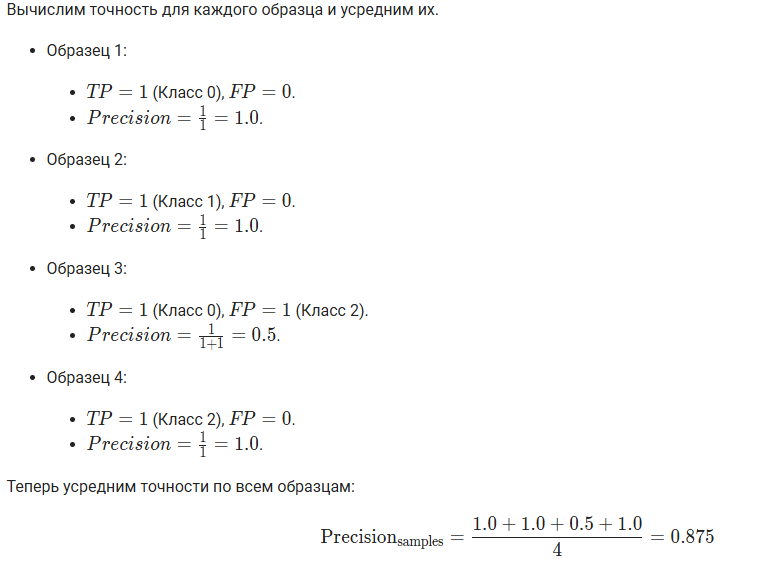

## Задачи

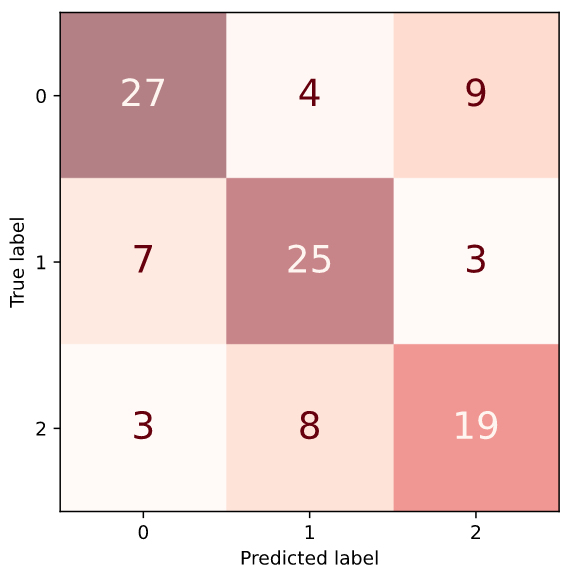

In [95]:
micro = (27 + 25 + 19) / (37 + 37 + 31)
macro = (27 / 37 + 25 / 37 + 19 / 31) / 3
weighted = ((27 / 37) * 40 + (25 / 37) * 35 + (19 / 31) * 30) / (40 + 35 + 30)

print(f'micro: {micro:.3f}')
print(f'macro: {macro:.3f}')
print(f'weighted: {weighted:.3f}')

micro: 0.676
macro: 0.673
weighted: 0.678


In [96]:
# Даны два списка:

# y_true – фактические метки;
# y_pred – предсказанные метки.

# Рассчитайте метрики accuracy и precision

import numpy as np

y_true = [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]   
y_pred = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]   

y_true = np.array(y_true)
y_pred = np.array(y_pred)

accuracy = np.sum(y_true == y_pred) / len(y_true)
precision = np.sum(y_true[np.where(y_pred == 1)] == y_pred[np.where(y_pred == 1)]) / \
            np.sum(y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')

Accuracy: 0.79
Precision: 0.75


In [97]:
# Даны два списка:

# y_true – фактические метки;
# y_pred – предсказанные метки.
# Класс 3 является положительным классом.

# Рассчитайте точность (precision).

y_true = [3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3]   
y_pred = [2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3]   

precision = precision_score(y_true, y_pred, pos_label=3)

print(f'Precision: {precision:.3f}')

Precision: 0.857


In [98]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=2000,                 # количество примеров
                           n_features=10,                  # количество признаков
                           n_classes=4,                    # количество классов
                           n_informative=4,                # количество информативных признаков 
                           weights=[0.7, 0.15, 0.1, 0.05], # веса классов
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(cm, end='\n\n')
print(f'Micro-average Precision: {precision_micro:.3f}')
print(f'Macro-average Precision: {precision_macro:.3f}')
print(f'Weighted-average Precision: {precision_weighted:.3f}')

[[234  20  17   7]
 [ 20  35   4   2]
 [ 14   1  23   3]
 [  4   5   3   8]]

Micro-average Precision: 0.750
Macro-average Precision: 0.581
Weighted-average Precision: 0.756


In [99]:
from sklearn.datasets import make_multilabel_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# добавьте необходимые импорты
from sklearn.metrics import multilabel_confusion_matrix, precision_score

num_1, num_2, num_3, num_4 = map(int, '500 3 2 42'.split())
X, y = make_multilabel_classification(n_samples=num_1, # количество примеров
                                      n_classes=num_2, # количество классов
                                      n_labels=num_3,  # Среднее количество меток (классов), которые  
                                                       # присваиваются каждому наблюдению.
                                      random_state=num_4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Продолжите написание кода здесь

mcm = multilabel_confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='samples', zero_division=0)

print(mcm)
print()
print('%.3f' % precision)

[[[69 27]
  [21 33]]

 [[40 21]
  [20 69]]

 [[39 24]
  [17 70]]]

0.617


In [100]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8 = map(int, '2000 10 3 4 7 2 1 42'.split())
X, y = make_classification(n_samples=num_1,                        # количество примеров
                           n_features=num_2,                       # количество признаков
                           n_classes=num_3,                        # количество классов
                           n_informative=num_4,                    # количество информативных признаков 
                           weights=[num_5/10, num_6/10, num_7/10], # веса классов
                           random_state=num_8)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Дерево решений
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_valid)

# Случайный лес
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_valid)

# Наивный байес с распределением Гаусса
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_valid)

precision_weighted_dtc = precision_score(y_valid, y_pred_dtc, average='weighted')
precision_weighted_rfc = precision_score(y_valid, y_pred_rfc, average='weighted')
precision_weighted_gnb = precision_score(y_valid, y_pred_gnb, average='weighted')

print(f'WA Precision для DecisionTreeClassifier: {precision_weighted_dtc:.3f}')
print(f'WA Precision для RandomForestClassifier: {precision_weighted_rfc:.3f}')
print(f'WA Precision для GaussianNB: {precision_weighted_gnb:.3f}', end='\n\n')
print()

y_pred = model_rfc.predict(X_test)
precision_best_estimator = precision_score(y_test, y_pred, average='weighted')

print('%.3f' % precision_best_estimator)

WA Precision для DecisionTreeClassifier: 0.802
WA Precision для RandomForestClassifier: 0.865
WA Precision для GaussianNB: 0.780


0.814


# 1.7 recall_score()

In [101]:
# Функция recall_score() библиотеки scikit-learn – это один из ключевых инструментов для оценки качества модели классификации, 
# особенно в тех задачах, где важна полнота (recall).

# Полнота измеряет, какую долю всех реальных положительных примеров модель правильно предсказала. 
# В тех ситуациях, где важно минимизировать количество пропущенных положительных случаев, 
# полнота становится решающим критерием качества модели.

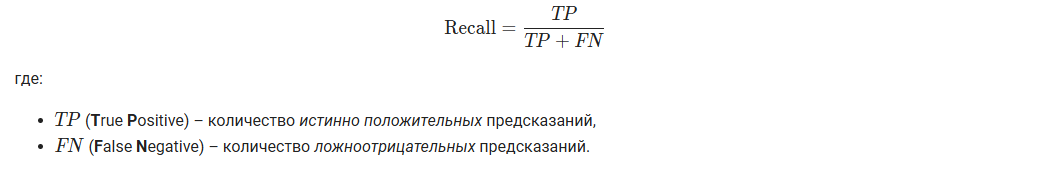

In [102]:
# Полнота (recall) используется, когда критично минимизировать ложноотрицательные результаты, 
# то есть ситуации, когда модель не замечает важные положительные примеры.
 
# В задачах, связанных с безопасностью, здоровьем или финансовыми рисками, 
# пропуски положительных случаев могут иметь серьёзные последствия, 
# поэтому recall становится приоритетной метрикой.

# Случаеи, в которых важны высокие значения метрики recall:

# Диагностика серьезных заболеваний (онкология, инфекционные заболевания): 
# Важно выявить все положительные случаи, даже если некоторые из них окажутся ложными срабатываниями, 
# чтобы не пропустить тех, кто действительно болен.

# Мониторинг состояния авиационного оборудования и прогнозирование отказов: 
# В авиации важно предсказывать все возможные отказы оборудования, 
# поскольку даже один пропущенный инцидент может стоить человеческих жизней.

# Контроль качества и обнаружение загрязнений в пищевой промышленности: 
# В процессе производства продуктов питания обнаружение загрязнений (например, металла, стекла, вредных примесей) 
# требует высокой полноты, поскольку пропуск загрязнения может привести к ухудшению здоровья потребителей и отзыву продукции.

# Кредитный скоринг: 
# При выдаче кредитов для определения потенциально дефолтных заемщиков 
# система с высоким recall может лучше защитить банк от неплатежей.

# Распознавание дорожных знаков и разметки: 
# Важно распознать все знаки и разметку на дороге, чтобы автомобиль "на автопилоте" 
# корректно следовал правилам движения и не создавал опасных ситуаций.

# Распознавание потенциально опасных действий в общественных местах: 
# Системы должны фиксировать и определять любое подозрительное поведение (драки, падения и т.д.), 
# чтобы сотрудники охраны могли вовремя среагировать.

# Обнаружение сорняков и вредителей: 
# В сельском хозяйстве дроны с камерами могут обнаруживать участки, пораженные вредителями или сорняками. 
# Важно выявить все пораженные зоны, чтобы оперативно принять меры по обработке.

# Анализ негативных отзывов: 
# При анализе отзывов о компании или продукте важно захватить все тексты с негативной тональностью. 
# Пропущенные негативные отзывы могут исказить оценку настроений клиентов и привести к неверным бизнес-решениям.

In [103]:
# Синтаксис функции recall_score():

# recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, 
#              zero_division='warn')

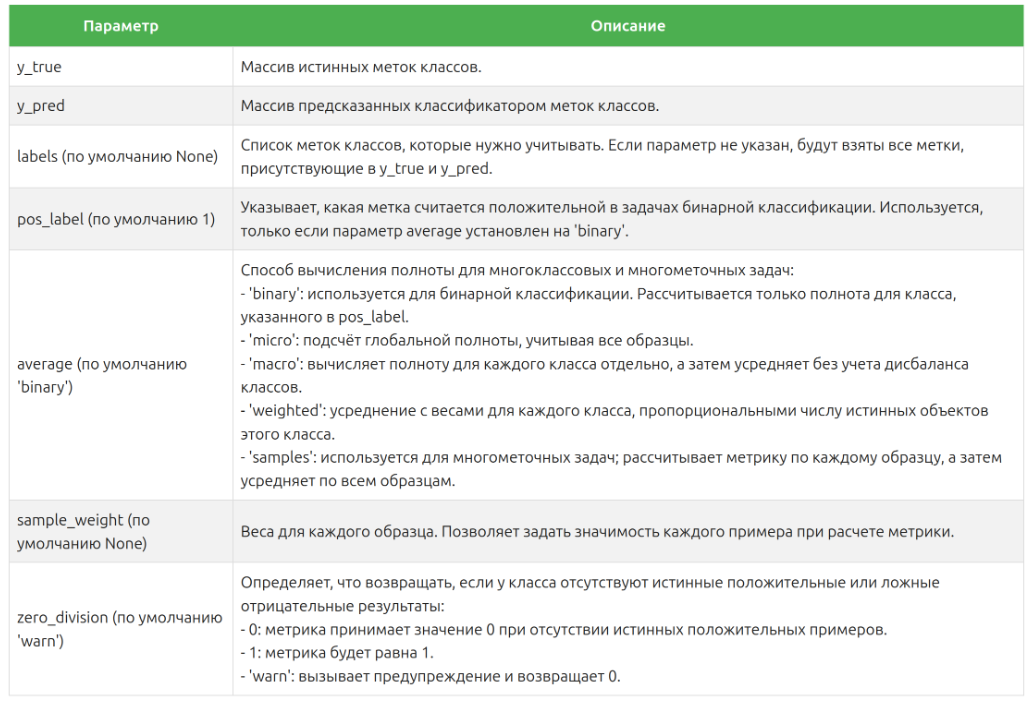

In [104]:
# Теперь рассчитаем метрику recall на простом примере:

from sklearn.metrics import recall_score

# Истинные метки классов
y_true = [0, 1, 1, 0, 0, 0, 0, 1, 0]

# Предсказанные метки классов
y_pred = [0, 1, 1, 0, 0, 0, 1, 1, 0]

# Вычисление полноты
recall = recall_score(y_true, y_pred)

print(f'Recall: {recall:.2f}')

Recall: 1.00


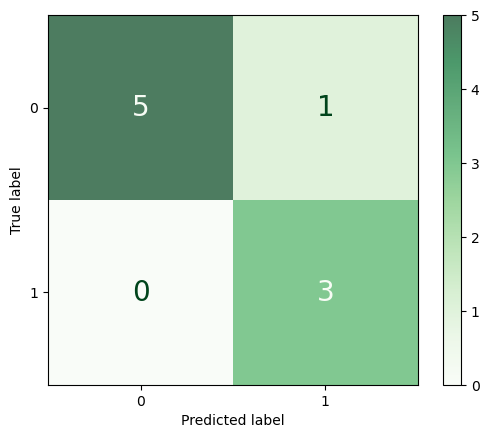

In [105]:
# Полнота для этих данных равна 1. 
# Давайте рассчитаем полноту вручную по формуле, приведённой выше, и сверимся с результатом, 
# предоставленным функцией recall_score(). 
# Сначала отобразим матрицу ошибок:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Greens', im_kw={'alpha': 0.7}, text_kw={'fontsize': 20})

plt.show()

In [106]:
# Рассчитаем полноту по формуле: 3 / (3 + 0) = 1. И получаем такой же результат, как и рассчитанный функцией recall_score()

In [107]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Создаем синтетический набор данных
# Здесь класс 1 будет представлять мошеннические транзакции
X, y = make_classification(
    n_samples=1000,       # количество транзакций
    n_features=20,        # количество признаков
    n_classes=2,          # два класса: мошенническая (1) и легитимная (0)
    weights=[0.95, 0.05], # несимметричное распределение (5% мошеннических)
    random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Вычисляем precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Вычисляем accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Recall: 0.50
Precision: 0.80
Accuracy: 0.97


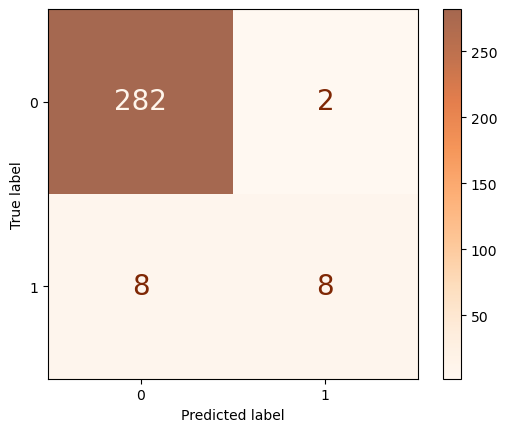

In [108]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Oranges', im_kw={'alpha': 0.7}, text_kw={'fontsize': 20})

plt.show()

In [109]:
# Полученный результат наглядно демонстрирует слабые стороны метрики accuracy, 
# да и вообще, показывает важность правильного выбора именно той метрики, 
# которая наиболее соответствует целям поставленной задачи. 

# Представьте, что если бы мы в задаче по классификации мошеннических транзакций, 
# выбрали как ориентир - правильность accuracy, то ввели бы в эксплуатацию "кривую" модель. 
# На "бумаге" у нас было бы всё отлично - мы имеем высокую правильность, аж 97%. 
# Но на деле, наша модель пропускает 50% противоправных транзакций, 
# а 20% транзакций из тех, которые она считает мошенническими, являются ошибочно классифицированными. 
# В данном случае нужно работать над повышением и полноты (recall), и точности (precision).

# Однако одновременно повышать и полноту, и точность удаётся лишь до определённого предела, 
# так как они часто вступают в противоречие друг с другом. 
# Увеличивая полноту, мы можем жертвовать точностью или наоборот.

## Порог классификации

In [110]:
# Порог классификации – это ключ к управлению тем, как модель машинного обучения принимает решения. 
# Величина порога (threshold) определяет, начиная с какого значения вероятности, 
# модель будет считать объект принадлежащим к определённому классу.

In [111]:
# Далее нам понадобиться метод predict_proba() библиотеки scikit-learn, 
# который возвращает вероятности принадлежности каждого экземпляра к определённому классу в задаче классификации.

# Этот метод возвращает массив, где каждая строка соответствует экземпляру, 
# а каждый столбец – вероятностям принадлежности к соответствующему классу. 
# Для бинарной классификации массив будет иметь два столбца, 
# где первый столбец представляет вероятность принадлежности к классу 0, а второй – к классу 1. 
# Сумма вероятностей по каждому экземпляру всегда равна 1. 
# Это означает, что если proba[i] – это вероятность для экземпляра i, то proba[i][0] + proba[i][1] = 1.

# Давайте к данным предыдущего примера применим метод predict_proba() и выведем на печать первые 10 экземпляров:

y_proba = model.predict_proba(X_test)

print(y_proba[:10])

[[0.95 0.05]
 [0.99 0.01]
 [1.   0.  ]
 [1.   0.  ]
 [0.93 0.07]
 [0.96 0.04]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]]


In [112]:
# Для первого экземпляра вероятность принадлежности к классу 0 составляет 0.95, а к классу 1 – 0.05. 
# Для второго экземпляра вероятность принадлежности к классу 0 составляет 0.99, а к классу 1 – 0.01 и т.д.

# Далее, оставим только те предсказания, которые относятся к положительному классу, т.е. к классу 1:

y_proba = model.predict_proba(X_test)[:, 1]

print(y_proba[:10])

[0.05 0.01 0.   0.   0.07 0.04 0.   0.   0.01 0.  ]


In [113]:
# Теперь снизим порог классификации до 0.1, т.е., если вероятность выше этого порога или равна ему, 
# то образец будем относить к положительному классу 1. 
# Снижая порог, мы снижаем требования к отнесению образцов к положительному классу.

threshold_01 = 0.1

y_pred_th01 = y_proba >= threshold_01

print(y_pred_th01[0:10])

[False False False False False False False False False False]


In [114]:
# Если к этому массиву применить метод astype() и перевести булевы значения в целочисленные, 
# то значения True трансформируются в единицы, а False – в нули:

y_pred_custom_01 = (y_proba >= threshold_01).astype(int)

print(y_pred_custom_01)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0]


In [115]:
# В итоге мы получаем массив с предсказанными моделью целевыми значениями при пороге классификации = 0.1.

# А теперь посчитаем точность и полноту при пороге классификации = 0.1:

precision_01 = precision_score(y_test, y_pred_custom_01)
recall_01 = recall_score(y_test, y_pred_custom_01)

print(f'Precision при пороге = 0.1:   {precision_01:.2f}')
print(f'Recall при пороге = 0.1:      {recall_01:.2f}')

Precision при пороге = 0.1:   0.31
Recall при пороге = 0.1:      0.69


In [116]:
# Далее давайте проделаем то же самое, но для порога классификации 0.7, т.е. ужесточим требования к отнесению образцов к положительному классу.

threshold_07 = 0.7

y_pred_custom_07 = (y_proba >= threshold_07).astype(int)

print(y_pred_custom_07)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [117]:
# Рассчитаем точность и полноту при пороге классификации = 0.7:

precision_07 = precision_score(y_test, y_pred_custom_07)
recall_07 = recall_score(y_test, y_pred_custom_07)

print(f'Precision при пороге = 0.7:   {precision_07:.2f}')
print(f'Recall при пороге = 0.7:      {recall_07:.2f}')

Precision при пороге = 0.7:   1.00
Recall при пороге = 0.7:      0.19


In [118]:
print(f'Precision при пороге = 0.1:   {precision_01:.2f}')
print(f'Precision при пороге = 0.5:   {precision:.2f}')
print(f'Precision при пороге = 0.7:   {precision_07:.2f}', end='\n\n')

print(f'Recall при пороге = 0.1:      {recall_01:.2f}')
print(f'Recall при пороге = 0.5:      {recall:.2f}')
print(f'Recall при пороге = 0.7:      {recall_07:.2f}')

Precision при пороге = 0.1:   0.31
Precision при пороге = 0.5:   0.80
Precision при пороге = 0.7:   1.00

Recall при пороге = 0.1:      0.69
Recall при пороге = 0.5:      0.50
Recall при пороге = 0.7:      0.19


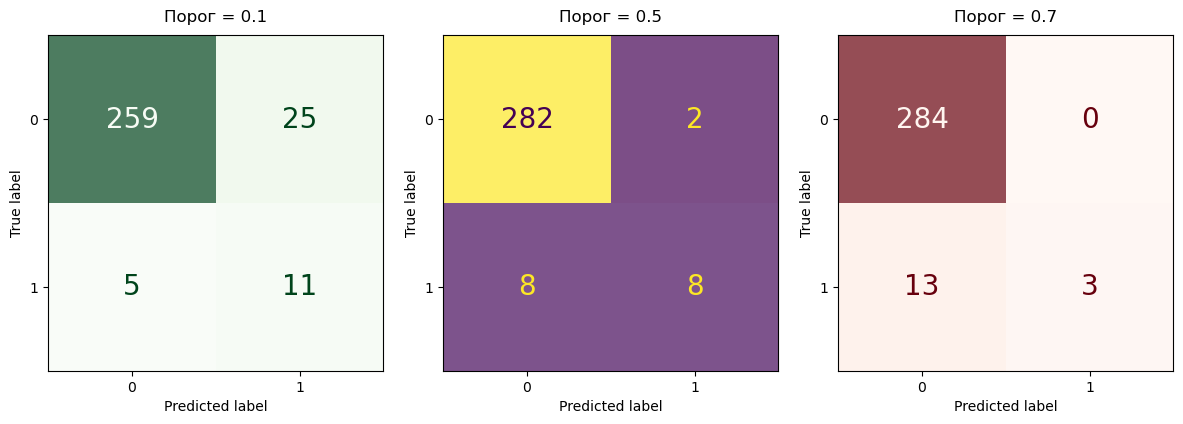

In [119]:
# Нарисуем матрицы ошибок для данного примера, 
# предварительно создав пользовательскую функцию для снижения объёма дублируемого кода:

from matplotlib.gridspec import GridSpec
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def draw_confusion_matrix(y_true, y_pred, ax, cmap='Greens', threshold=0.5):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap=cmap, 
              im_kw={'alpha': 0.7},
              text_kw={'fontsize': 20},
              ax=ax, 
              colorbar=False)
    plt.title(f'Порог = {threshold}', pad=10)


fig = plt.figure(figsize=(12, 4))
gs = GridSpec(nrows=1, ncols=3, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
draw_confusion_matrix(y_test, y_pred_custom_01, ax1, cmap='Greens', threshold=0.1)

ax2 = fig.add_subplot(gs[0,1])
draw_confusion_matrix(y_test, y_pred, ax2, cmap='viridis')

ax3 = fig.add_subplot(gs[0,2])
draw_confusion_matrix(y_test, y_pred_custom_07, ax3, cmap='Reds', threshold=0.7)

plt.tight_layout()
plt.show()

In [120]:
# Начнём с первой матрицы ошибок, показывающей "положение дел" при пороге, равном 0.1. 
# В данном случае мы настолько сильно снизили порог вероятности отнесения образцов к положительному классу (1), 
# что стали много примеров отрицательного класса (0) классифицировать как положительный класс (1). 
# От этого стало расти число ложноположительных примеров (FP = 25). 
# Так как FP находится в знаменателе формулы вычисления точности (precision), то происходит снижение этой метрики.
 
# Но в то же время, модель всё больше и больше начинает правильно предсказывать положительный класс. 
# Значение True Positive (TP = 11) самое высокое именно на первой матрице ошибок.

# Также снижается количество ложноотрицательных примеров (FN = 5), 
# а, следовательно, увеличивается полнота (recall), 
# так как показатель FN находится в знаменателе формулы расчёта метрики recall.

# Если эту задачу считать задачей определения мошеннических транзакций, 
# то при снижении порога классификации мы всё больше и больше правильно выявляем противоправные операции. 
# Но в то же время мы совершаем много ошибок, классифицируя легальные транзакции как мошеннические.

In [121]:
# Теперь обратим внимание на третью матрицу, сформированную при пороге, равном 0.7. 
# В этом случае мы достаточно высоко подняли порог вероятности для выявления положительного класса (1), 
# и как бы перестраховываемся, когда предсказываем этот класс. 
# Следовательно, мы много примеров положительного класса (1) классифицируем, как отрицательный класс (0), 
# поэтому растёт показатель False Negative (FN = 13), что, в свою очередь, снижает метрику recall.

# Но зато, модель начинает меньше ошибаться в предсказаниях отрицательного класса (0), 
# из-за чего снижается показатель False Positive (FP = 0 в нашем случае), 
# что, соответственно, отражается на росте точности (precision).

# Применительно к задаче определения мошеннических транзакций, 
# при увеличении порога классификации модель всё меньше и меньше ошибается в определении легальных операций, 
# но слабо классифицирует незаконные транзакции.

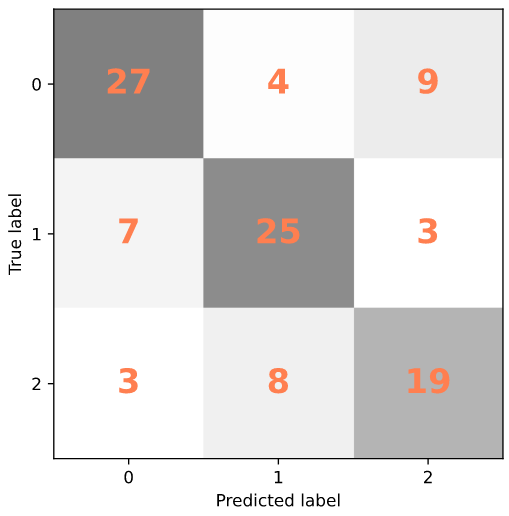

## Задачи

In [122]:
# Рассчитайте:

# Метрику recall macro для всех классов.
# Метрику recall macro только для классов 0 и 1.

y_true = [0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1]   
y_pred = [1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]

recall_macro = recall_score(y_true, y_pred, average='macro')
recall_macro_0_1 = recall_score(y_true, y_pred, average='macro', labels=[0, 1])

print(f'Macro-average Recall: {recall_macro:.4f}')
print(f'Macro-average Recall для классов 0 и 1: {recall_macro_0_1:.4f}')

Macro-average Recall: 0.6687
Macro-average Recall для классов 0 и 1: 0.6696


In [123]:
from sklearn.metrics import recall_score

y_true = [0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1]   
y_pred = [1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]

recall = recall_score(y_true, y_pred, average='macro', labels=[1])

print(f'Recall для класса 1: {recall:.3f}')

Recall для класса 1: 0.625


In [124]:
# Рассчитайте точность модели на тестовых данных при порогах классификации: 0.2, 0.5 и 0.8.

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split        

num_1, num_2, num_3, num_4, num_5 = map(int, '2000 10 2 5 42'.split())
X, y = make_classification(n_samples=num_1,            # количество примеров
                           n_features=num_2,           # количество признаков
                           n_classes=num_3,            # количество классов
                           n_informative=num_4,        # количество информативных признаков 
                           random_state=num_5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)

proba_positive = y_proba[:, 1]

thresholds = [0.2, 0.5, 0.8]
recall_values = []

for th in thresholds:
    y_pred_th = (proba_positive > th).astype(int)
    recall = recall_score(y_test, y_pred_th, average='binary')
    recall_values.append(recall)

recall_02, recall_05, recall_08 = recall_values

print(f'Recall при пороге 0.2: {recall_02:.4f}')
print(f'Recall при пороге 0.5: {recall_05:.4f}')
print(f'Recall при пороге 0.8: {recall_08:.4f}')

Recall при пороге 0.2: 0.9850
Recall при пороге 0.5: 0.8650
Recall при пороге 0.8: 0.6550


# 1.8 precision_recall_curve()

In [125]:
# Функция precision_recall_curve() библиотеки scikit-learn вычисляет значения точности (precision) и полноты (recall) 
# для различных пороговых значений вероятностей при бинарной классификации.

# Функция возвращает три значения:
# precision: 
# Значения точности для различных порогов классификации. 
# Массив имеет длину на один элемент больше, чем количество порогов.

# recall: 
# Значения полноты для тех же порогов, что и массив precision.

# thresholds: 
# Массив пороговых значений, для которых вычислены точность и полнота. 
# Длина этого массива меньше, чем у precision и recall на единицу, 
# так как дополнительно учитываются случаи, когда порог равен или меньше минимального значения вероятности).

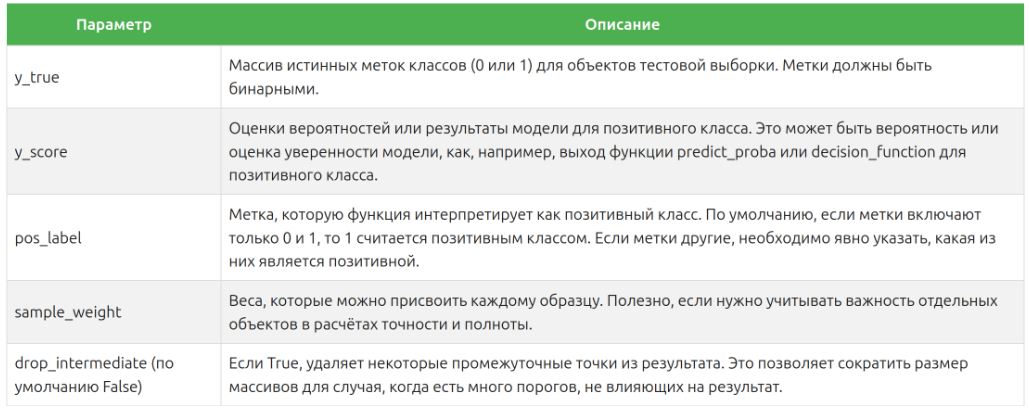

In [126]:
# Посмотрим на простой пример применения функции precision_recall_curve():

from sklearn.metrics import precision_recall_curve

# Истинные метки классов
y_true = [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0]

# Предсказанные вероятности положительного класса
y_scores = [0.05, 0.25, 0.51, 0.8, 0.18, 0.7, 0.73, 0.68, 0.23, 0.68, 0.33, 0.46]

# Вычисление точности и полноты при разных порогах
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

print(f'Precision: {precision}', end='\n\n')
print(f'Recall: {recall}', end='\n\n')
print(f'Thresholds: {thresholds}')

Precision: [0.33333333 0.36363636 0.4        0.33333333 0.375      0.42857143
 0.5        0.6        0.66666667 0.5        1.         1.        ]

Recall: [1.   1.   1.   0.75 0.75 0.75 0.75 0.75 0.5  0.25 0.25 0.  ]

Thresholds: [0.05 0.18 0.23 0.25 0.33 0.46 0.51 0.68 0.7  0.73 0.8 ]


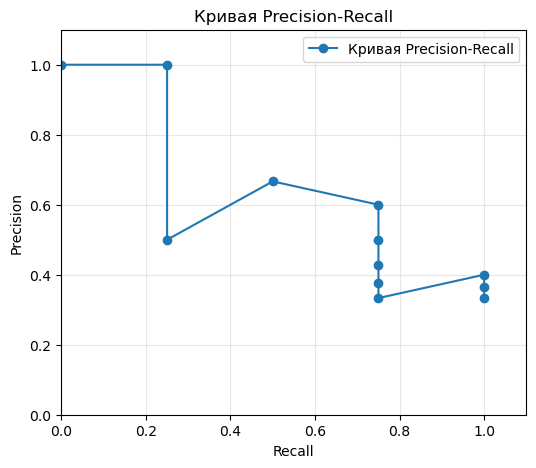

In [127]:
# Функция precision_recall_curve() часто используется в сочетании с построением графиков, 
# чтобы визуально оценить производительность модели. 

# Например, можно построить график, где по оси X откладывается полнота, а по оси Y – точность:

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

plt.plot(recall, precision, marker='o', label='Кривая Precision-Recall')

plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [128]:
# 1. Рассчитываются вероятности для каждого примера. 
# Это вероятности того, что объект принадлежит к классу 1.
# 2. Определяются различные пороги. 
# Каждое значение вероятности может быть использовано как порог. 
# Например, если порог равен 0.7, то объект будет отнесен к классу 1 только в том случае, 
# если вероятность принадлежности к этому классу больше 0.7.
# 3. Пересчитываются precision и recall. 
# Для каждого порога вычисляется precision и recall, определяющие, 
# сколько предсказаний класса 1 были корректными (precision) и сколько объектов класса 1 было выявлено (recall).
# 4. Построение кривой. 
# По мере изменения порога значения precision и recall изменяются, формируя кривую Precision-Recall.

In [129]:
# Давайте посмотрим на пример бинарной классификации, 
# который условно можно отнести к задаче определения мошеннических транзакций. 

# Сгенерируем данные, затем их разделим на обучающую и тестовую выборки. 
# Далее обучим модель случайного леса, и при помощи метода predict_proba() рассчитаем вероятности:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Создаем синтетический набор данных
# Здесь класс 1 будет представлять мошеннические транзакции
X, y = make_classification(
    n_samples=1000,       # количество транзакций
    n_features=20,        # количество признаков
    n_classes=2,          # два класса: мошенническая (1) и легитимная (0)
    weights=[0.95, 0.05], # несимметричное распределение (5% мошеннических)
    random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Обучаем модель
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

print(y_proba[:10])

[0.05 0.01 0.   0.   0.07 0.04 0.   0.   0.01 0.  ]


In [130]:
# Также распечатаем все уникальные значения вероятностей:

import numpy as np

print(np.unique(y_proba))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.19 0.25 0.26 0.28 0.35 0.38 0.4  0.41 0.42 0.46 0.48
 0.54 0.56 0.58 0.6  0.64 0.67 0.72 0.73]


In [131]:
# И рассчитаем при помощи функции precision_recall_curve() точность и полноту 
# при разных порогах классификации:

from sklearn.metrics import precision_recall_curve

# Вычисляем Precision, Recall и пороги
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

print('Precision:', precision, end='\n\n')
print('Recall:', recall, end='\n\n')
print('Thresholds:', thresholds)

Precision: [0.05333333 0.07425743 0.09859155 0.12121212 0.17391304 0.20338983
 0.23529412 0.24444444 0.26190476 0.28947368 0.30555556 0.33333333
 0.34375    0.36666667 0.37037037 0.41666667 0.43478261 0.47619048
 0.5        0.52631579 0.55555556 0.58823529 0.5625     0.6
 0.64285714 0.69230769 0.66666667 0.72727273 0.8        0.88888889
 0.875      0.83333333 0.8        1.         1.         1.
 1.        ]

Recall: [1.     0.9375 0.875  0.75   0.75   0.75   0.75   0.6875 0.6875 0.6875
 0.6875 0.6875 0.6875 0.6875 0.625  0.625  0.625  0.625  0.625  0.625
 0.625  0.625  0.5625 0.5625 0.5625 0.5625 0.5    0.5    0.5    0.5
 0.4375 0.3125 0.25   0.25   0.1875 0.125  0.    ]

Thresholds: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.19 0.25 0.26 0.28 0.35 0.38 0.4  0.41 0.42 0.46 0.48
 0.54 0.56 0.58 0.6  0.64 0.67 0.72 0.73]


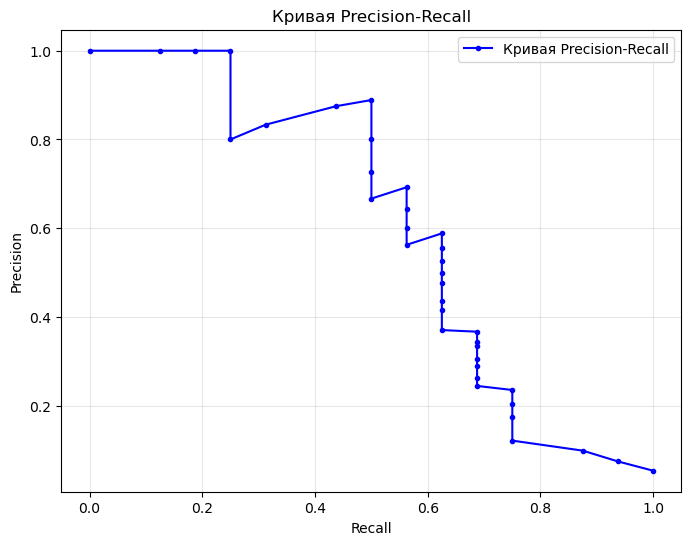

In [132]:
# Используя результат вывода функции precision_recall_curve(), построим кривую Precision-Recall:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(recall, precision, marker='.', color='b', label='Кривая Precision-Recall')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

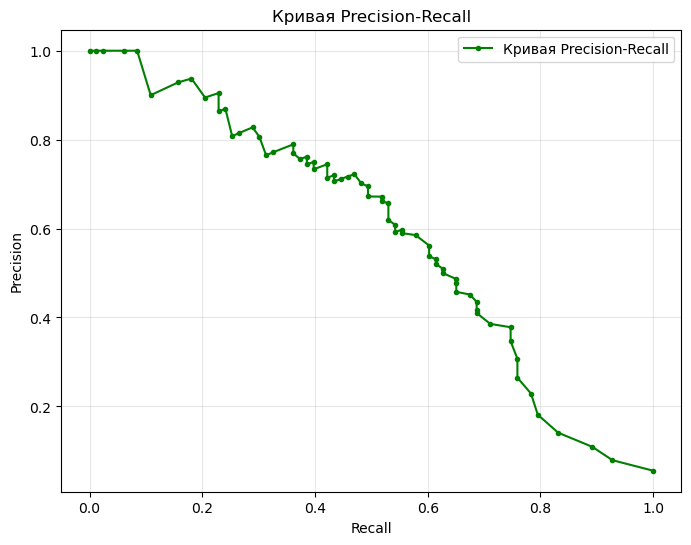

In [133]:
# Давайте увеличим количество примеров в датасете с 1000 до 5000 значений и построим кривую Precision-Recall:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=5000,      
    n_features=20,        
    n_classes=2,          
    weights=[0.95, 0.05], 
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='g', label='Кривая Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [134]:
# Как видим, чем больше образцов в данных, тем более сглаженный вид принимает кривая Precision-Recall.

# Итак, построение кривой зависимости точности от полноты является ключевым шагом в выборе правильного порога классификации 
# для задач, где важно находить баланс между этими двумя метриками.

In [135]:
# Функция precision_recall_curve() работает только с бинарной классификацией. 
# Она предназначена для анализа способности модели различать два класса.

## Многоклассовые задачи precision_recall_curve()

In [136]:
# Для многоклассовых задач precision_recall_curve() можно использовать с преобразованием задачи 
# в несколько бинарных, применяя один из подходов:

# One-vs-Rest (OvR): 
# Модель рассматривает каждый класс как положительный, 
# а все остальные классы как отрицательные, создавая несколько бинарных классификаций. 
# Для каждой из них можно построить отдельную Precision-Recall кривую.

# One-vs-One (OvO): 
# Построение кривых Precision-Recall для каждой пары классов. 
# Однако этот подход менее популярен для кривых Precision-Recall.

In [137]:
# Для преобразования многоклассовой задачи в несколько бинарных
# потребуется функция label_binarize() библиотеки scikit-learn. 

# Эта функция имеет следующий синтаксис:

# label_binarize(y, *, classes, neg_label=0, pos_label=1, sparse_output=False)

# Функция импортируется из модуля sklearn.preprocessing:

from sklearn.preprocessing import label_binarize

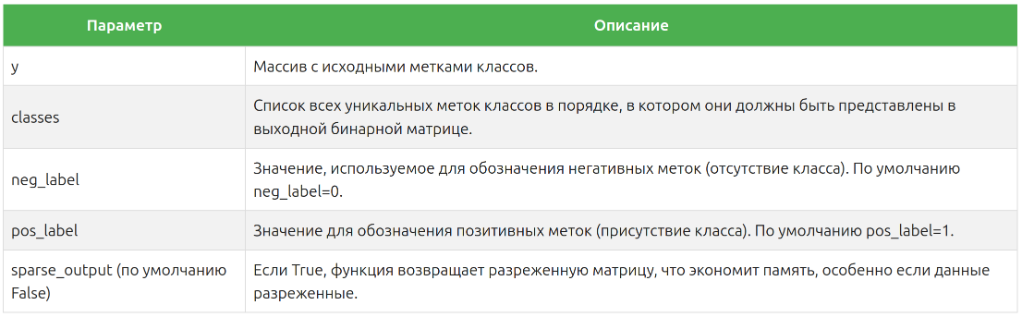

In [138]:
# Функция label_binarize() возвращает массив или разреженную матрицу с формой (n_samples, n_classes), где:

# Столбцы соответствуют классам из classes.
# Значения – либо pos_label, либо neg_label, показывают, принадлежит ли данный образец соответствующему классу.

In [139]:
# Для демонстрации примера создадим датасет, содержащий 3 класса и 100 образцов. 
# Затем данные разделим на обучающую и тестовую выборки. 
# Далее обучим модель случайного леса, и при помощи метода predict_proba() рассчитаем вероятности. 
# А также, применив функцию label_binarize(), произведём бинаризацию меток выборки y_test:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

X, y = make_classification(
    n_samples=100,      
    n_features=6,        
    n_classes=3,
    n_informative=3,
    weights=[0.70, 0.20, 0.10], 
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)

# Бинаризация меток y_test
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

In [140]:
# Распечатаем исходный массив с истинными метками:

print(y_test)

[0 0 1 0 0 0 0 0 0 0 2 1 0 0 0 2 0 0 2 0 0 0 0 1 0 0 1 1 1 0]


In [141]:
# Посмотрим, как функция label_binarize() преобразовала этот массив:

print(y_test_binarized[:10])

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [142]:
# И взглянем на вероятности:

print(y_proba[:10])

[[0.66 0.34 0.  ]
 [0.66 0.33 0.01]
 [0.08 0.45 0.47]
 [0.53 0.35 0.12]
 [0.72 0.25 0.03]
 [0.96 0.04 0.  ]
 [0.83 0.16 0.01]
 [0.77 0.23 0.  ]
 [0.65 0.35 0.  ]
 [0.56 0.39 0.05]]


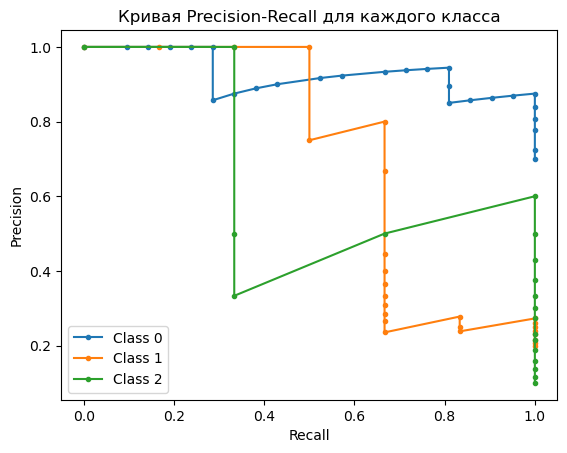

In [143]:
# И теперь, используя цикл, функцию precision_recall_curve() и инструменты библиотеки matplotlib, 
# построим кривые Precision-Recall для каждого класса следующим образом:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

for i in range(y_test_binarized.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_proba[:, i])
    plt.plot(recall, precision, marker='.', label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall для каждого класса')
plt.legend()
plt.show()

In [144]:
# Таким образом можно строить кривые Precision-Recall в многоклассовых задачах и анализировать, 
# как ваша модель справляется с классификацией каждого класса в отдельности.

# Итак, функция precision_recall_curve – это важный инструмент для оценки качества моделей. 
# Она позволяет анализировать, как изменение порога классификации влияет на метрики точности и полноты, что важно для задач, 
# где последствия ошибок могут быть серьёзными (например, в медицине или безопасности). 
# Использование кривой Precision-Recall помогает лучше понимать, как модель справляется с предсказаниями положительного класса,
# и даёт возможность настроить модель под конкретные требования задачи.

## Задачи

In [145]:
# Вычислите вероятности принадлежности объектов к классам на тестовых данных.
# Используя функцию precision_recall_curve(), рассчитайте точность и полноту для разных порогов классификации.
# Выведите на печать массив значений точности.
# Распечатайте пустую строку.
# Выведите на печать массив значений полноты.
# Распечатайте пустую строку.
# Выведите на печать массив значений порогов классификации.

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Добавьте необходимый импорт

num_1, num_2, num_3, num_4, num_5 = map(int, '200 10 2 5 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
# Продолжите написание кода здесь

y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

print(precision)
print()
print(recall)
print()
print(thresholds)

[0.5        0.51282051 0.52631579 0.54054054 0.55555556 0.57142857
 0.55882353 0.57575758 0.59375    0.61290323 0.63333333 0.65517241
 0.67857143 0.66666667 0.69230769 0.68       0.70833333 0.69565217
 0.72727273 0.71428571 0.7        0.68421053 0.66666667 0.64705882
 0.625      0.6        0.64285714 0.61538462 0.58333333 0.54545455
 0.6        0.66666667 0.625      0.57142857 0.5        0.4
 0.25       0.33333333 0.         0.         1.        ]

[1.   1.   1.   1.   1.   1.   0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.9
 0.9  0.85 0.85 0.8  0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.45 0.4
 0.35 0.3  0.3  0.3  0.25 0.2  0.15 0.1  0.05 0.05 0.   0.   0.  ]

[0.03572268 0.07295636 0.07609927 0.09612356 0.10230668 0.1185978
 0.15081646 0.1516271  0.1920545  0.28062214 0.29793812 0.32330016
 0.42180086 0.46252088 0.48737092 0.51538293 0.54581839 0.55435272
 0.57709416 0.59997423 0.60710988 0.61313251 0.65016161 0.65622792
 0.68854402 0.69949902 0.69999967 0.70581008 0.70822905 0.72479745
 0.73

In [146]:
# Выведите на печать:

# Массив со значениями точности для разных порогов для класса 0.
# Пустую строку.
# Массив со значениями полноты для разных порогов для класса 0.
# Пустую строку.
# Массив со значениями точности для разных порогов для класса 1.
# Пустую строку.
# Массив со значениями полноты для разных порогов для класса 1.
# Пустую строку.
# Массив со значениями точности для разных порогов для класса 2.
# Пустую строку.
# Массив со значениями полноты для разных порогов для класса 2.

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

num_1, num_2, num_3, num_4, num_5 = map(int, '100 10 3 5 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
# Продолжите написание кода здесь

y_test_binarized = label_binarize(y_test, classes=list(range(num_3)))
y_proba = model.predict_proba(X_test)

for i in range(y_test_binarized.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_proba[:, i])
    print(precision)
    print()
    print(recall)
    print()

[0.35       0.36842105 0.38888889 0.41176471 0.4375     0.46666667
 0.5        0.53846154 0.58333333 0.63636364 0.7        0.77777778
 0.875      0.85714286 0.83333333 0.8        1.         1.
 1.         1.         1.        ]

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.85714286 0.71428571 0.57142857 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]

[0.35       0.36842105 0.38888889 0.41176471 0.4375     0.46666667
 0.5        0.53846154 0.58333333 0.63636364 0.7        0.66666667
 0.625      0.57142857 0.5        0.6        0.75       0.66666667
 1.         1.         1.        ]

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.85714286
 0.71428571 0.57142857 0.42857143 0.42857143 0.42857143 0.28571429
 0.28571429 0.14285714 0.        ]

[0.3        0.31578947 0.33333333 0.35294118 0.375      0.4
 0.35714286 0.38461538 0

# 1.9 PrecisionRecallDisplay

In [147]:
# Кривые Precision-Recall также можно строить, используя инструменты библиотеки scikit-learn, 
# а именно класс PrecisionRecallDisplay и метод plot() этого класса.

In [148]:
# Класс PrecisionRecallDisplay имеет следующую сигнатуру:

# PrecisionRecallDisplay(precision, recall, *, average_precision=None, estimator_name=None, pos_label=None, 
#                        prevalence_pos_label=None)

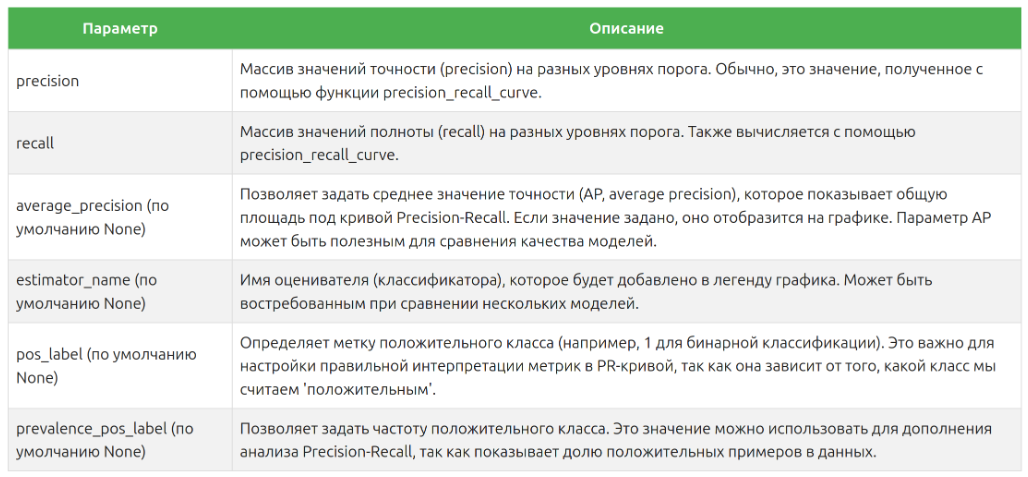

In [149]:
# Для демонстрации примера сгенерируем данные, затем их разделим на обучающую и тестовую выборки. 
# Далее обучим модель случайного леса, при помощи метода predict_proba() рассчитаем вероятности 
# и, используя функцию precision_recall_curve(), вычислим точность и полноту:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=2000, n_classes=2, weights=[0.7, 0.3], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

# Получаем вероятности положительного класса для модели
y_proba = model.predict_proba(X_test)[:, 1]

# Вычисляем precision и recall 
precision, recall, _ = precision_recall_curve(y_test, y_proba)

In [150]:
# Передадим значения precision и recall в PrecisionRecallDisplay:

from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay(precision=precision, recall=recall)

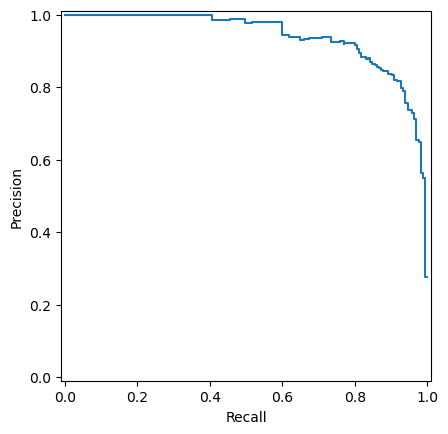

In [151]:
# Также, как и в случае с ConfusionMatrixDisplay, 
# происходит создание экземпляра класса PrecisionRecallDisplay, но визуализация не производится. 
# Для отображения графика, нужно к экземпляру класса PrecisionRecallDisplay применить метод plot():

from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

## Параметр average_precision класса PrecisionRecallDisplay

In [152]:
# Параметр average_precision в классе PrecisionRecallDisplay используется 
# для отображения на графике значения средней точности (Average Precision, AP). 
# Это значение помогает количественно оценить качество модели по PR-кривой, 
# поскольку средняя точность (AP) представляет собой интегральную площадь под кривой Precision-Recall.

# Параметр average_precision не влияет на форму или положение кривой Precision-Recall на графике. 
# Этот параметр не используется для вычислений или построения кривой, 
# а лишь служит для отображения значения средней точности в легенде графика.

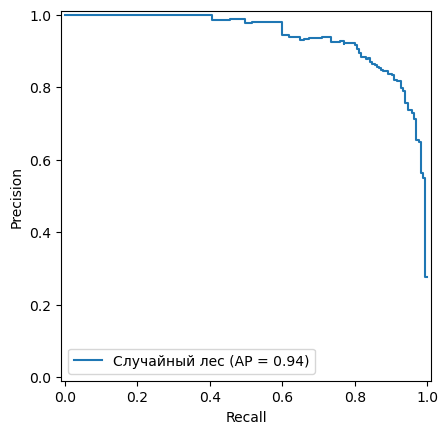

In [153]:
# Параметр average_precision используется для того, чтобы зрительно оценить производительность модели на основе одного числового показателя. 
# Он может быть рассчитан с помощью функции average_precision_score:

from sklearn.metrics import average_precision_score

# Вычисляем среднюю точность
ap_score = average_precision_score(y_test, y_proba)

disp = PrecisionRecallDisplay(precision=precision, recall=recall,
                              estimator_name='Случайный лес',
                              average_precision=ap_score)
disp.plot()

plt.show()

In [154]:
# Здесь average_precision отобразится на графике (AP = 0.94), показывая, 
# как хорошо модель поддерживает высокую точность при увеличении полноты, но сама кривая останется неизменной.

# Средняя точность (AP) – это мера, которая усредняет значение точности модели при разных уровнях полноты. 
# Она не просто фиксирует значения точности и полноты в одной точке, как это делают метрики, основанные на фиксированных порогах, 
# а интегрирует значения точности по всем порогам, чтобы охарактеризовать всю кривую Precision-Recall.

# Когда мы говорим, что average_precision показывает, насколько хорошо модель поддерживает высокую точность 
# при увеличении полноты, это связано с тем, как эта метрика вычисляется:

# - Усреднение точности на всех уровнях полноты
# average_precision фактически подсчитывает площадь под кривой Precision-Recall. 
# Значение AP будет выше, если модель поддерживает высокую точность, даже когда полнота растет – 
# это указывает, что модель способна корректно находить положительные объекты без значительного количества ложных срабатываний.

# - Зависимость точности от полноты
# В большинстве моделей, когда полнота увеличивается (т.е., модель предсказывает больше объектов как положительные), 
# точность часто падает, поскольку увеличивается число ложных положительных. 
# Высокий AP указывает, что даже при высокой полноте модель сохраняет адекватный уровень точности, эффективно минимизируя ошибки.

# - Отличие от ROC-AUC
# В отличие от метрики ROC-AUC, AP более чувствителен к дисбалансу классов 
# и лучше отражает способность модели работать с редкими положительными метками, 
# поддерживая высокую точность при различных порогах полноты.

In [155]:
# Таким образом, average_precision - это показатель того, 
# насколько «гладко» модель переходит от высокой точности к большей полноте, 
# помогая оценить, не жертвуется ли точность ради более высоких значений полноты.

## Параметр prevalence_pos_label класса PrecisionRecallDisplay

In [156]:
# Параметр prevalence_pos_label позволяет указать частоту положительного класса (т.е. долю положительных примеров в данных), 
# чтобы добавить линию случайного угадывания на график Precision-Recall. 
# Эта линия показывает, какой уровень точности (precision) можно было бы получить, 
# если бы модель делала случайные предсказания для положительного класса с этой частотой.

# Параметр prevalence_pos_label также не изменяет саму кривую Precision-Recall, 
# поскольку кривая строится только на основе значений precision и recall. 
# Этот параметр отвечает только за добавление уровня случайного угадывания на графике, 
# и влияет на отображение только если вы укажете plot_chance_level=True при вызове метода plot().

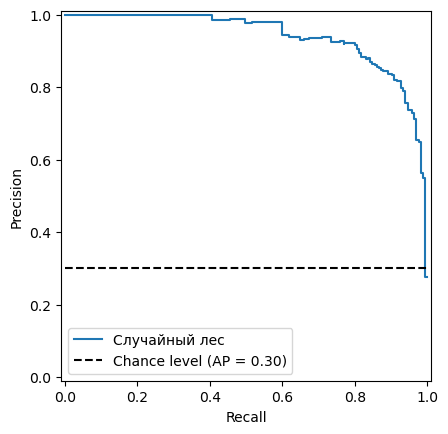

In [157]:
# Задать частоту положительного класса (prevalence_pos_label) означает указать долю (от 0 до 1), 
# которая соответствует положительному классу в выборке. 
# Например, если prevalence_pos_label=0.3, это значит, что положительный класс составляет 30% от общего числа примеров.

# Добавим линию случайного угадывания на график:

disp = PrecisionRecallDisplay(precision=precision, recall=recall,
                              estimator_name='Случайный лес',
                              prevalence_pos_label=0.3)
disp.plot(plot_chance_level=True)

plt.show()

In [158]:
# Уровень случайного угадывания на Precision-Recall графике позволяет понять, 
# насколько модель лучше, чем случайные предсказания. 
# Если, например, частота положительного класса равна 0.3, 
# то случайное угадывание для положительного класса будет давать точность (precision) около 0.3. 
# Модель считается полезной, если её Precision-Recall кривая лежит выше этой линии, так как это показывает, 
# что она делает более информативные предсказания, чем случайная модель.

## Метод plot() класса PrecisionRecallDisplay

In [159]:
# Метод plot() класса PrecisionRecallDisplay библиотеки scikit-learn 
# строит кривую Precision-Recall на заданной оси matplotlib. 

# Данный метод имеет следующий синтаксис:

# plot(ax=None, *, name=None, plot_chance_level=False, chance_level_kw=None, **kwargs)

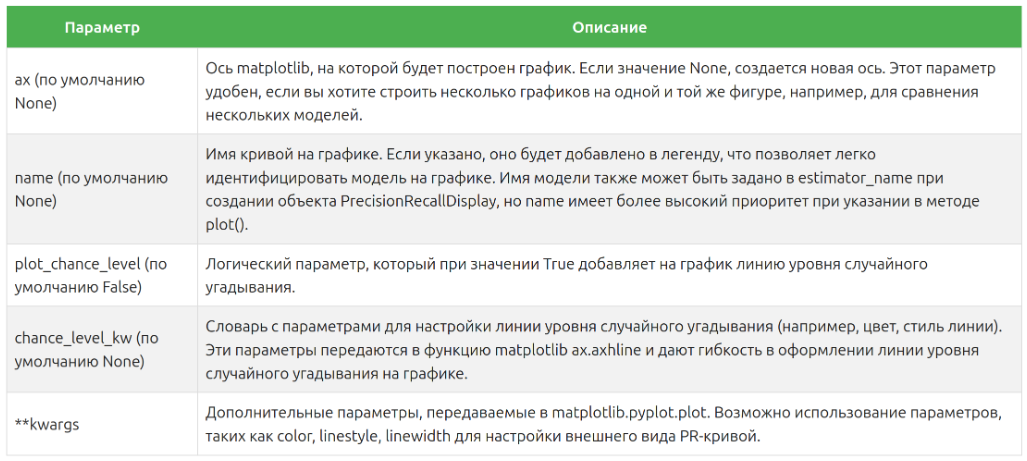

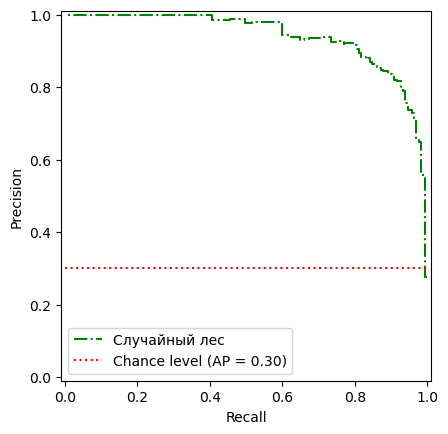

In [160]:
# Пример использования параметра chance_level_kw:

disp = PrecisionRecallDisplay(precision=precision, recall=recall,
                              estimator_name='Случайный лес',
                              prevalence_pos_label=0.3)
disp.plot(color='green',
          linestyle='-.',
          plot_chance_level=True,
          chance_level_kw={'color': 'red', 'linestyle': ':'})
plt.show()

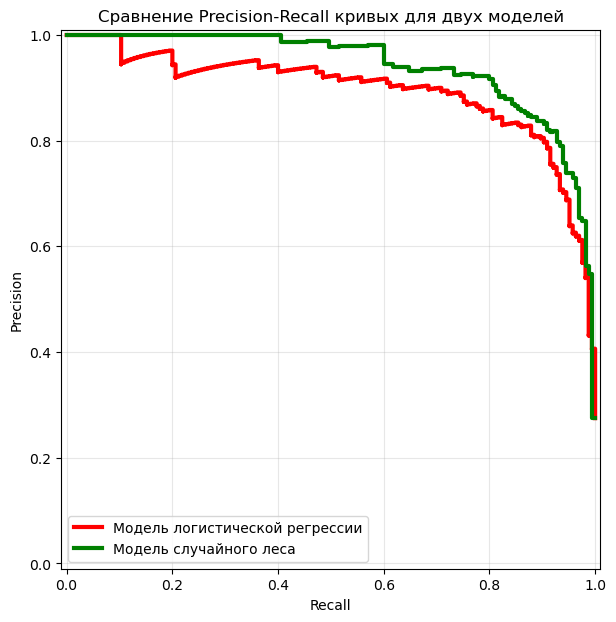

In [161]:
# PrecisionRecallDisplay также позволяет сравнивать между собой PR-кривые нескольких моделей. 
# Для примера сравним кривые Precision-Recall моделей логистической регрессии и случайного леса:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Создаем синтетические данные
X, y = make_classification(n_samples=2000, n_classes=2, weights=[0.7, 0.3], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучаем две модели
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Получаем вероятности положительного класса для каждой модели
y_proba1 = model1.predict_proba(X_test)[:, 1]
y_proba2 = model2.predict_proba(X_test)[:, 1]

# Вычисляем precision и recall для каждой модели
precision1, recall1, _ = precision_recall_curve(y_test, y_proba1)
precision2, recall2, _ = precision_recall_curve(y_test, y_proba2)

# Создаем объект отображения для каждой модели и строим кривые
plt.figure(figsize=(7, 7))

disp1 = PrecisionRecallDisplay(precision=precision1, recall=recall1)
disp1.plot(name='Модель логистической регрессии', ax=plt.gca(), color='red', linewidth=3)

disp2 = PrecisionRecallDisplay(precision=precision2, recall=recall2)
disp2.plot(name='Модель случайного леса', ax=plt.gca(), color='green', linewidth=3)

# Настройка графика
plt.title('Сравнение Precision-Recall кривых для двух моделей')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 1.10 roc_curve()

In [162]:
# True Positive Rate (TPR)

# TPR – это умение видеть положительные результаты среди всех реальных положительных.

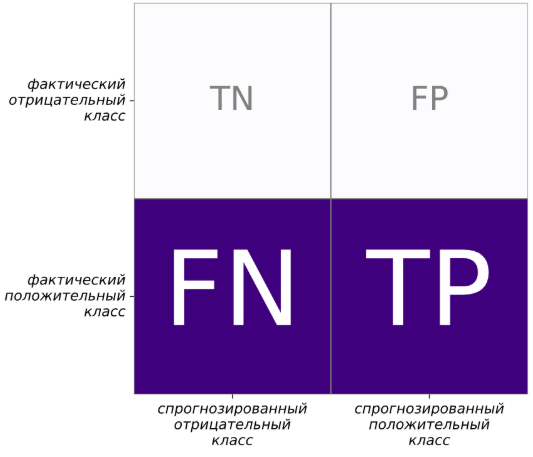

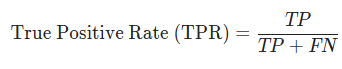

In [163]:
# False Positive Rate (FPR)

# FPR – это ложные положительные результаты среди всех реальных отрицательных.

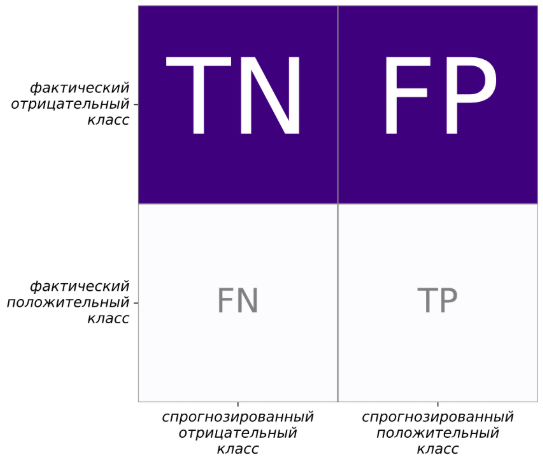

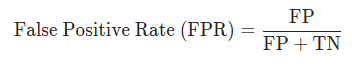

In [164]:
# ROC-кривая (Receiver Operating Characteristic) – это график, который иллюстрирует, 
# как изменяется качество бинарного классификатора при разных порогах принятия решения.

# ROC-кривая позволяет визуализировать баланс между True Positive Rate (TPR) и False Positive Rate (FPR), 
# показывая, насколько хорошо модель различает положительные и отрицательные классы.

In [165]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Генерация синтетических данных
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели на обучающей выборке
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Предсказанные вероятности положительного класса для тестовой выборки
y_proba_test = model.predict_proba(X_test)[:, 1]

In [166]:
# Взглянем на первые 10 значений массива с вероятностями и на его размер:

print(y_proba_test[:10], end='\n\n')
print(len(y_proba_test))

[0.22552209 0.9663315  0.32931785 0.9201332  0.02338335 0.95864272
 0.02097123 0.04063274 0.19147995 0.31504568]

300


In [167]:
# Это наши пороги классификации. 
# Для дальнейшей работы с ними, отсортируем их по возрастанию:

import numpy as np

thresholds_test = np.sort(y_proba_test)
print(thresholds_test[:10])

[0.00130762 0.0021253  0.00216559 0.00220741 0.003029   0.00326674
 0.00621915 0.00687417 0.00850121 0.01187718]


In [168]:
# Далее, для каждого значения порога, используя цикл, 
# рассчитаем показатели True Positive Rate (TPR) и False Positive Rate (FPR), 
# значения которых сохраним в списки tpr_manual_test и fpr_manual_test :

tpr_manual_test = []
fpr_manual_test = []

# Вычисление TPR и FPR на каждом пороге
for threshold in thresholds_test:
    y_pred_test = (y_proba_test >= threshold).astype(int)
    tp = np.sum((y_pred_test == 1) & (y_test == 1))   # True Positive
    fp = np.sum((y_pred_test == 1) & (y_test == 0))   # False Positive
    fn = np.sum((y_pred_test == 0) & (y_test == 1))   # False Negative
    tn = np.sum((y_pred_test == 0) & (y_test == 0))   # True Negative
    
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    
    tpr_manual_test.append(tpr)
    fpr_manual_test.append(fpr)

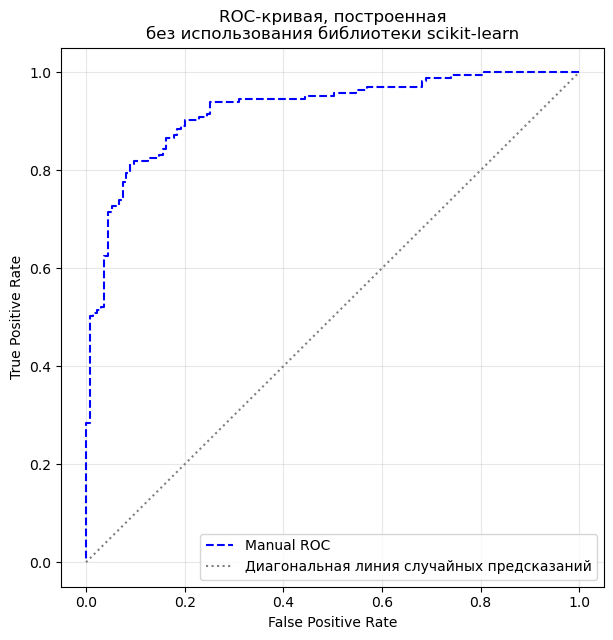

In [169]:
# И теперь, используя инструменты библиотеки matplotlib, построим ROC-кривую:

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(fpr_manual_test, tpr_manual_test, color='blue', linestyle='--', label='Manual ROC')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Диагональная линия случайных предсказаний')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, построенная\nбез использования библиотеки scikit-learn')
plt.legend(loc=4)
plt.grid(alpha=0.3)

plt.show()

In [170]:
# В идеальной модели ROC-кривая устремляется к левому верхнему углу графика, где:

# TPR = 1 (100% всех положительных примеров предсказаны правильно).
# FPR = 0 (0% всех отрицательных примеров предсказаны неверно).
# Чем ближе ROC-кривая к этому левому верхнему углу, тем лучше работает модель.

In [171]:
# # roc_curve()

# Функция roc_curve() библиотеки scikit-learn используется для вычисления значений 
# истинно положительной ставки (TPR) и ложноположительной ставки (FPR) 
# при различных порогах для бинарной классификации.

# На выходе функция roc_curve() выдаёт три массива:

# Массив FPR.
# Массив TPR.
# Массив thresholds – пороги, при которых вычислены соответствующие FPR и TPR.

In [172]:
# Функция roc_curve() имеет синтаксис:

# roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

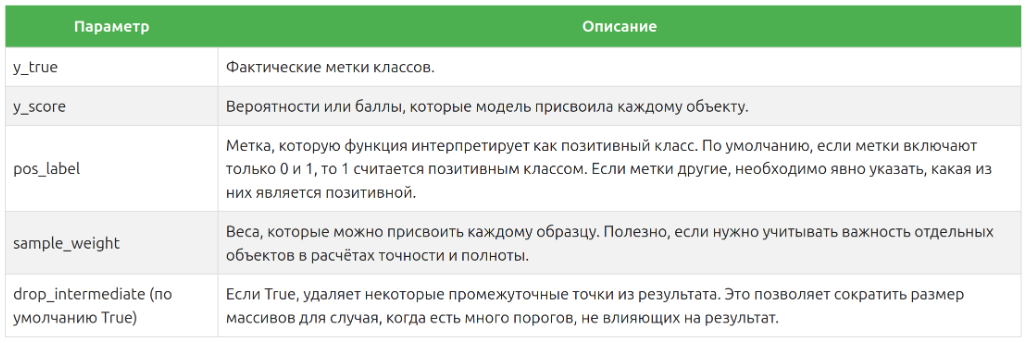

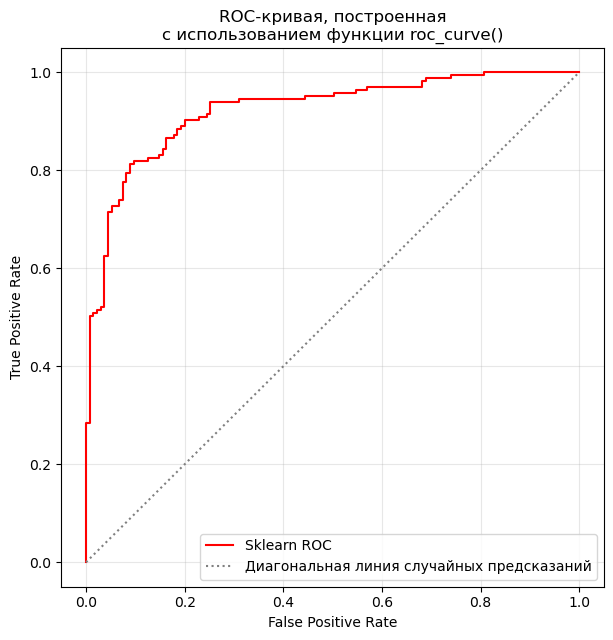

In [173]:
# Давайте на данных предыдущего примера посчитаем FPR и TPR, используя функцию roc_curve(), а затем визуализируем эти данные:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve       # Импорт roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_proba_test = model.predict_proba(X_test)[:, 1]

# Расчёт показателей при помощи функции roc_curve()
fpr_sklearn_test, tpr_sklearn_test, thresholds_sklearn_test = roc_curve(y_test, y_proba_test,
                                                                        drop_intermediate=False)
plt.figure(figsize=(7, 7))
plt.plot(fpr_sklearn_test, tpr_sklearn_test, color='red', label='Sklearn ROC')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Диагональная линия случайных предсказаний')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, построенная\nс использованием функции roc_curve()')
plt.legend(loc=4)
plt.grid(alpha=0.3)
plt.show()

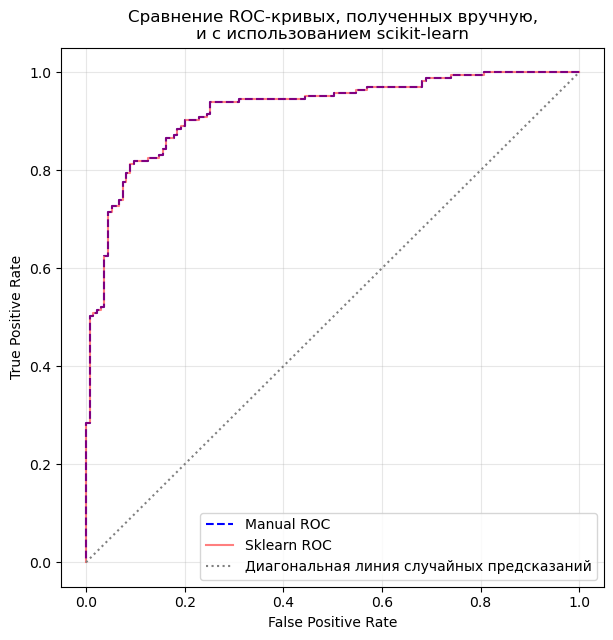

In [174]:
# Вроде, по внешнему виду, эта кривая похожа на ту, которую мы построили без применения функции roc_curve(). 
# Проверим это, наложив графики друг на друга:

plt.figure(figsize=(7, 7))
plt.plot(fpr_manual_test, tpr_manual_test, color='blue', linestyle='--', label='Manual ROC')
plt.plot(fpr_sklearn_test, tpr_sklearn_test, color='red', label='Sklearn ROC', alpha=0.5)
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Диагональная линия случайных предсказаний')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Сравнение ROC-кривых, полученных вручную,\nи с использованием scikit-learn')
plt.legend(loc=4)
plt.grid(alpha=0.3)
plt.show()

In [175]:
# Графики один в один накладываются друг на друга, т.е. расчёт FPR и TPR без применения функции roc_curve() является верным.

## Поиск оптимальной точки

In [176]:
# Оптимальная точка на кривой ROC часто определяется как точка, 
# которая обеспечивает баланс между максимизацией TPR (True Positive Rate) и минимизацией FPR (False Positive Rate).
#  
# При поиске оптимальной точки на ROC-кривой важно найти ту, 
# где TPR значительно превышает FPR, чтобы минимизировать ложные срабатывания.

In [177]:
# Чтобы найти эту точку, можно вычислить разницу между TPR и FPR для каждого порога и выбрать порог, 
# где эта разница максимальна. Вот как это можно сделать:

import numpy as np

# Нахождение индекса точки, где разница между TPR и FPR максимальна
optimal_idx = np.argmax(tpr_sklearn_test - fpr_sklearn_test)

# Оптимальный порог вероятности, при котором достигается этот баланс
optimal_threshold = thresholds_sklearn_test[optimal_idx]

print(f'Оптимальный порог: {optimal_threshold:.3f}')
print(f'TPR при оптимальном пороге: {tpr_sklearn_test[optimal_idx]:.3f}')
print(f'FPR при оптимальном пороге: {fpr_sklearn_test[optimal_idx]:.3f}')

Оптимальный порог: 0.527
TPR при оптимальном пороге: 0.812
FPR при оптимальном пороге: 0.089


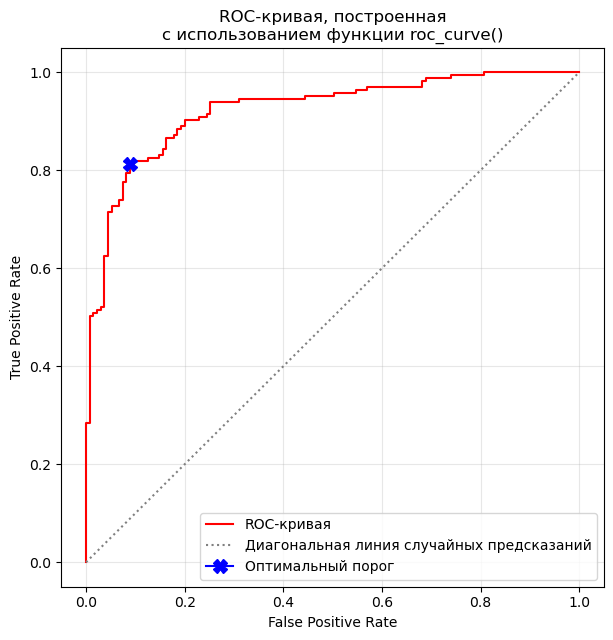

In [178]:
# Нанесём эту точку на график:

plt.figure(figsize=(7, 7))
plt.plot(fpr_sklearn_test, tpr_sklearn_test, color='red', label='ROC-кривая')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Диагональная линия случайных предсказаний')
plt.plot(fpr_sklearn_test[optimal_idx], tpr_sklearn_test[optimal_idx], color='blue', 
         marker='X', markersize=10, label='Оптимальный порог')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, построенная\nс использованием функции roc_curve()')
plt.legend(loc=4)
plt.grid(alpha=0.3)
plt.show()

In [179]:
# Функции roc_curve() можно передавать не только вероятности, 
# но и оценки уверенности модели, которые получают при помощи метода decision_function().

# Метод decision_function() возвращает так называемые оценки уверенности (или "решающие значения"), 
# которые модель присваивает каждому образцу, характеризуя, насколько уверенно она относит его к тому или иному классу. 

# Эти значения предоставляют числовое выражение уверенности модели 
# и дают возможность анализировать не просто окончательный результат классификации, 
# но и степень уверенности, с которой модель делает своё предсказание.

In [180]:
# В задачах бинарной классификации decision_function() возвращает одномерный массив, 
# в котором каждому образцу соответствует единственное числовое значение.
#  
# Это значение отражает расстояние до разделяющей гиперплоскости:
# Положительное значение указывает на предсказание положительного класса.
# Отрицательное значение указывает на предсказание отрицательного класса.

# Чем дальше значение от нуля (как в положительную, так и в отрицательную сторону), 
# тем выше уверенность модели в своём предсказании.

# Предположим, что модель в бинарной классификации возвращает оценку 5.3 для одного образца и -2.7 для другого:
# Оценка 5.3 говорит о том, что модель уверенно относит этот образец к положительному классу.
# Оценка -2.7 говорит о том, что образец относится к отрицательному классу, но уверенность модели ниже, чем в первом случае.

In [181]:
# Когда модель обучена для многоклассовой задачи (например, три или больше классов), 
# decision_function() возвращает двумерный массив.
#  
# В этом массиве каждому образцу соответствует по одному значению для каждого класса, 
# что описывает уверенность модели в том, что образец относится к этому классу. 

# В данном случае:
# Каждый столбец массива представляет оценки для одного из классов.
# Для предсказания класса выбирается тот, чья оценка для данного образца максимальна.
# Эти оценки имеют схожую интерпретацию с бинарной классификацией: 
# чем выше значение для определенного класса, 
# тем сильнее уверенность модели, что данный образец относится к этому классу.

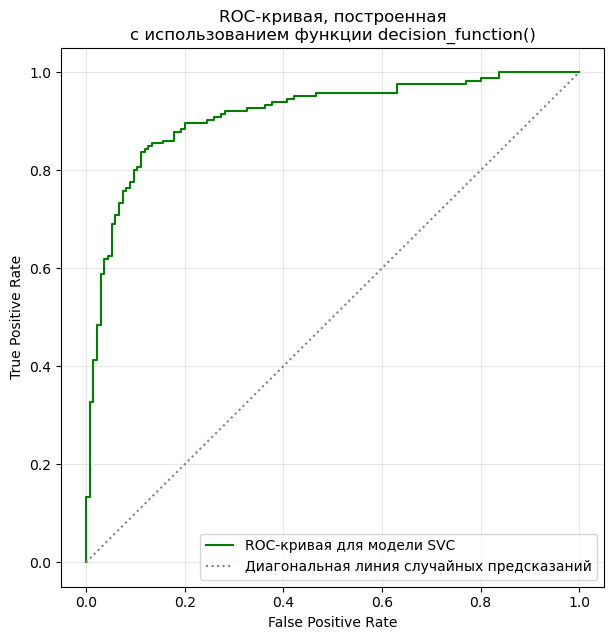

In [182]:
# Например, для модели опорных векторов SVC построим ROC-кривую, используя оценки уверенности:

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_svc = SVC(random_state=42)
model_svc.fit(X_train, y_train)

decision_scores = model_svc.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, decision_scores, drop_intermediate=False)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, color='green', label='ROC-кривая для модели SVC')
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', label='Диагональная линия случайных предсказаний')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая, построенная\nс использованием функции decision_function()')
plt.legend(loc=4)
plt.grid(alpha=0.3)
plt.show()

## Задачи

In [183]:
# Даны два списка:

# y_true – фактические метки;
# y_score – предсказанные вероятности положительного класса.
 
# Рассчитайте метрики и выведите на печать:

# Массив с значениями FPR в усечённом формате.
# Массив с значениями TPR в усечённом формате.
# Массив с порогами классификации в усечённом формате.
# Пустую строку.
# Массив с значениями FPR в полном формате.
# Массив с значениями TPR в полном формате.
# Массив с порогами классификации в полном формате.

y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]  
y_scores = [0.3, 0.8, 0.6, 0.4, 0.85, 0.1, 0.75, 0.3, 0.9, 0.65]

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
fpr_full, tpr_full, thresholds_full = roc_curve(y_true, y_scores, drop_intermediate=False)

print(fpr, tpr, thresholds, sep='\n')
print()
print(fpr_full, tpr_full, thresholds_full, sep='\n')

[0.   0.   0.   0.25 0.75 1.  ]
[0.         0.16666667 1.         1.         1.         1.        ]
[inf 0.9 0.6 0.4 0.3 0.1]

[0.   0.   0.   0.   0.   0.   0.   0.25 0.75 1.  ]
[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.         1.         1.         1.        ]
[ inf 0.9  0.85 0.8  0.75 0.65 0.6  0.4  0.3  0.1 ]


In [184]:
# Рассчитайте метрики и выведите на печать:

# Матрицу ошибок.
# Пустую строку.
# Массив с значениями FPR в полном формате.
# Массив с значениями TPR в полном формате.
# Массив с порогами классификации в полном формате.

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

num_1, num_2, num_3, num_4, num_5 = map(int, '200 7 2 5 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Продолжите написание кода здесь

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_proba, drop_intermediate=False)

print(cm)
print()
print(fpr, tpr, thresholds, sep='\n')

[[20  0]
 [ 7 13]]

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.05 0.05 0.1  0.15 0.2  0.2  0.25 0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.95 1.  ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7
 0.8  0.8  0.85 0.85 0.85 0.85 0.9  0.95 0.95 0.95 1.   1.   1.   1.
 1.   1.   1.  ]
[ inf 0.95 0.94 0.91 0.86 0.84 0.79 0.78 0.77 0.71 0.67 0.66 0.52 0.5
 0.43 0.38 0.35 0.28 0.27 0.25 0.2  0.19 0.15 0.14 0.13 0.1  0.08 0.07
 0.05 0.04 0.02]


In [185]:
# Произведите необходимые вычисления и выведите на печать:

# Массив с предсказаниями модели на тестовых данных.
# Пустую строку.
# Массив с оценками уверенности модели на тестовых данных.

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

num_1, num_2, num_3, num_4, num_5 = map(int, '100 7 3 5 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Продолжите написание кода здесь

y_pred = model.predict(X_test)
decision_scores = model.decision_function(X_test)

print(y_pred)
print()
print(decision_scores)

[0 2 0 1 0 1 2 1 0 0 1 1 2 0 1 2 1 2 1 0]

[[ 2.5845007  -2.00546584 -4.81359337]
 [-5.73617098 -1.16744229  1.27487895]
 [ 4.05316155 -2.86186515 -4.80357786]
 [-4.3496291  -3.28317425 -3.44827575]
 [-0.3807206  -1.87755378 -1.39504485]
 [-5.20384744  4.35514704 -4.45882525]
 [ 2.82934374 -3.70916729  2.88984229]
 [-5.29648487  5.55419707 -3.90271481]
 [ 0.93046829 -1.59505261 -1.98554948]
 [ 5.22893838 -3.79015539 -3.13225287]
 [-5.20630817  4.20941559 -4.28860927]
 [-5.34148844  1.14868796 -4.15862179]
 [-4.70876888 -0.90867021  0.35056514]
 [ 4.64143766 -3.8727076  -2.16132424]
 [-3.78115978  4.68155282 -4.70488868]
 [-4.14574053 -3.08223463  3.76225466]
 [-6.18035321 -1.75789459 -2.46008862]
 [-5.73617098 -1.27964349  1.27487895]
 [-4.88974101  2.55661562 -3.41868328]
 [ 1.62542846 -2.99508081 -4.73066383]]


In [186]:
# Произведите необходимые вычисления и выведите на печать:

# Массив с предсказаниями модели на тестовых данных.
# Пустую строку.
# Массив с оценками уверенности модели на тестовых данных.
# Пустую строку.
# Массив с значениями FPR, рассчитанными на оценках уверенности, в полном формате.
# Массив с значениями TPR, рассчитанными на оценках уверенности, в полном формате.
# Массив с порогами классификации, рассчитанными на оценках уверенности, в полном формате.

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

num_1, num_2, num_3, num_4, num_5 = map(int, '150 7 2 5 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Продолжите написание кода здесь

y_pred = model.predict(X_test)
decision_scores = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, decision_scores, drop_intermediate=False)

print(y_pred)
print()
print(decision_scores)
print()
print(fpr, tpr, thresholds, sep='\n')

[1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0]

[ 4.077304   -2.12689225 -1.62024824 -3.23409431  6.53220854 -5.91113188
  0.37970047 -5.70888353 -5.6835715   2.61754563  5.95417915 -4.93496808
 -5.58311749  6.88676965 -1.1317903   1.41517332 -5.6835715   6.62341414
  3.06632218 -3.16232229  4.32264516 -5.78690475  4.63099194  2.66692309
  4.4167271  -6.10523273  4.92788343 -1.76914254 -5.94278049 -4.64480032]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.06666667 0.06666667 0.13333333
 0.2        0.26666667 0.33333333 0.4        0.46666667 0.53333333
 0.66666667 0.73333333 0.8        0.86666667 0.93333333 1.        ]
[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 0.93333333 1.         1.
 1.         1.         1.         1.         1.         1

In [187]:
# Посчитайте оптимальный порог классификации, а также метрики TPR и FPR для этого порога. 
# Используйте метод максимизации разницы между уровнями истинно положительных и ложноположительных срабатываний.

# При расчёте TPR и FPR не удаляйте промежуточные точки.

# Внесите необходимые переменные в print'ы для вывода результатов на печать.

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

num_1, num_2, num_3, num_4, num_5 = map(int, '500 7 2 5 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Продолжите написание кода здесь

y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba, drop_intermediate=False)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Оптимальный порог: {optimal_threshold:.2f}')
print(f'TPR при оптимальном пороге: {tpr[optimal_idx]:.2f}')
print(f'FPR при оптимальном пороге: {fpr[optimal_idx]:.2}')

Оптимальный порог: 0.46
TPR при оптимальном пороге: 0.98
FPR при оптимальном пороге: 0.04


# 1.11 RocCurveDisplay

In [188]:
# RocCurveDisplay – это класс в библиотеке scikit-learn, предназначенный для визуализации ROC-кривой.

In [189]:
# Синтаксис класса RocCurveDisplay:

# RocCurveDisplay(*, fpr, tpr, roc_auc=None, estimator_name=None, pos_label=None)

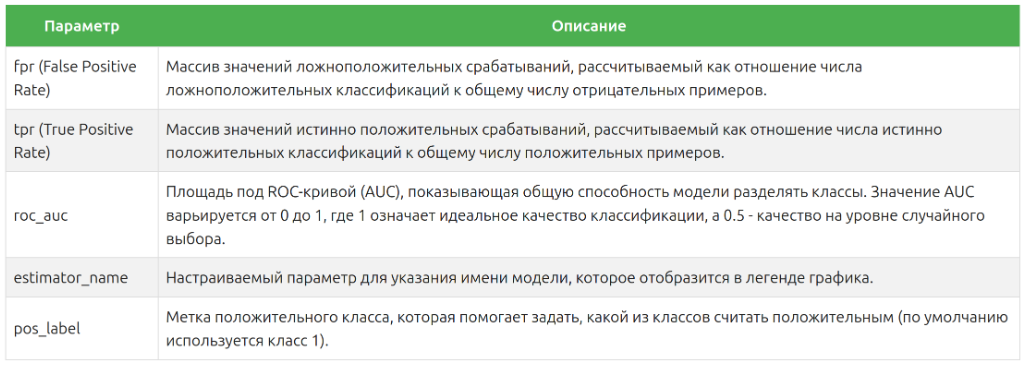

In [190]:
# Давайте построим ROC-кривую:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = auc(fpr, tpr)   # о функции auc() поговорим в следующем уроке

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)

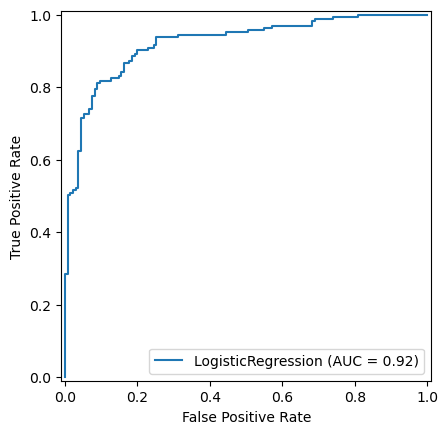

In [191]:
# Вернулся объект класса RocCurveDisplay. Для того, чтобы визуализировать его, применим к нему метод plot():

import matplotlib.pyplot as plt

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='LogisticRegression')

disp.plot()

plt.show()

In [192]:
# Метод plot() класса RocCurveDisplay используется для отображения ROC-кривой на графике. 
# Этот метод позволяет настроить внешний вид графика и добавить дополнительные элементы, такие как уровень случайного угадывания.

# Метод plot() класса RocCurveDisplay имеет следующую сигнатуру:

# plot(ax=None, *, name=None, plot_chance_level=False, chance_level_kw=None, **kwargs)

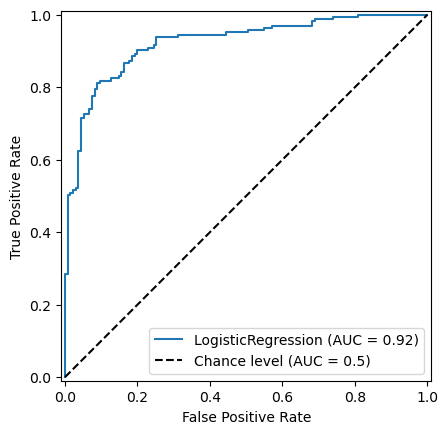

In [193]:
# Давайте добавим на график линию случайного угадывания:

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='LogisticRegression')

disp.plot(plot_chance_level=True)

plt.show()

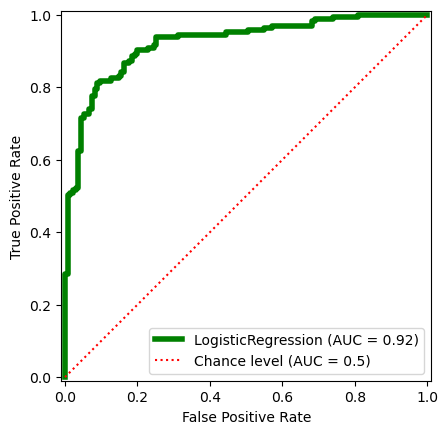

In [194]:
# А теперь поменяем цвет и стиль линии случайного угадывания, а также цвет и ширину ROC-кривой:

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='LogisticRegression')

disp.plot(plot_chance_level=True,
          chance_level_kw={'color': 'red', 'linestyle': ':'},
          color='green',
          linewidth=4)
plt.show()

## Метод from_estimator()

In [195]:
# Метод from_estimator()
# Метод from_estimator() класса RocCurveDisplay используется для автоматического построения ROC-кривой 
# с использованием предсказаний вероятностей от заданной модели.

# Он выполняет все необходимые шаги – от вычисления ROC-кривой до её визуализации – 
# и является удобным способом создать график, указав модель и данные.

# Метод from_estimator() требует модель (объект estimator) и данные (массивы X и y). 
# Он вызывает модель для вычисления предсказаний на основе данных X.

# Если модель поддерживает метод predict_proba, то используются вероятности для положительного класса.
# Если же модель поддерживает метод decision_function, то используются значения оценки уверенности.
# Если доступны оба метода, можно выбрать метод через параметр response_method.

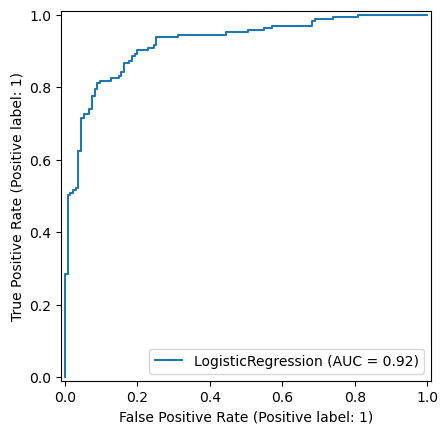

In [196]:
# Итак, построим ROC-кривую при помощи метода from_estimator():

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

RocCurveDisplay.from_estimator(model, X_test, y_test)

plt.show()

In [197]:
# Синтаксис метода from_estimator():

# from_estimator(estimator, X, y, *, sample_weight=None, drop_intermediate=True, 
#                response_method='auto', pos_label=None, name=None, ax=None, plot_chance_level=False, 
#                chance_level_kw=None, **kwargs)

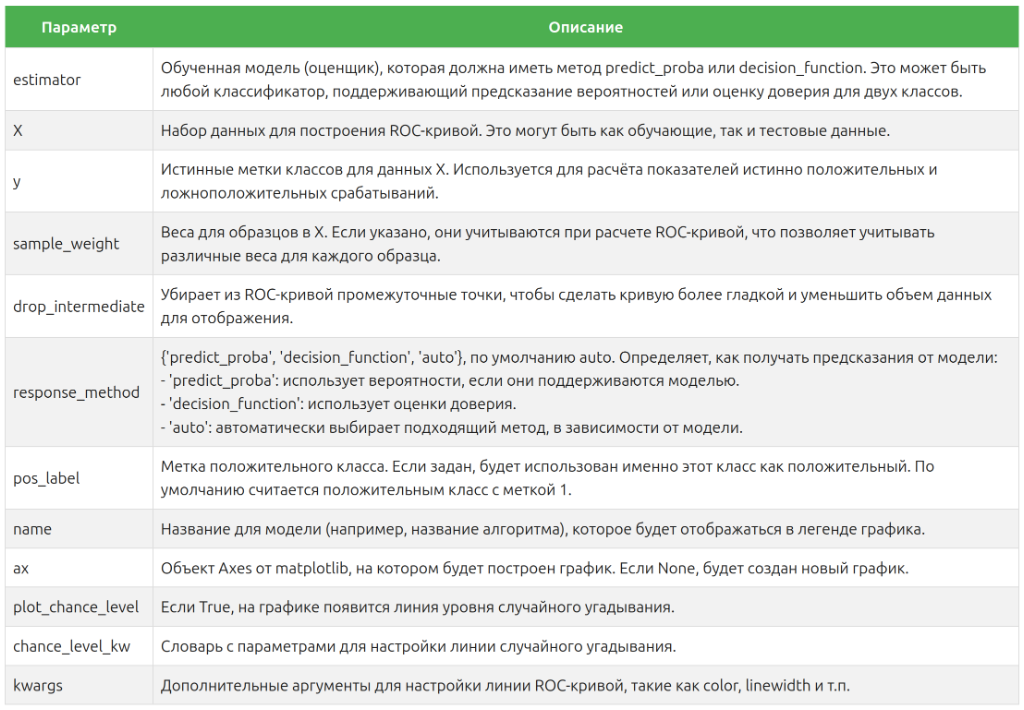

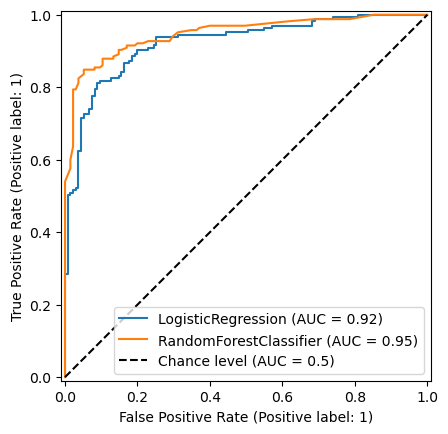

In [198]:
# Например, построим ROC-кривые для двух моделей: логистической регресии и случайного леса:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)

model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

RocCurveDisplay.from_estimator(model1, X_test, y_test, ax=plt.gca())
RocCurveDisplay.from_estimator(model2, X_test, y_test, ax=plt.gca(), plot_chance_level=True)

plt.show()

## Метод from_predictions()

In [199]:
# Метод from_predictions()
# Метод from_predictions() класса RocCurveDisplay позволяет построить ROC-кривую на основе предсказанных вероятностей 
# или оценок уверенности, предоставленных предсказаниями модели. 

# Этот метод используется, если у нас уже есть предсказания модели (как вероятности или оценки уверенности).

# Синтаксис метода from_predictions():

# from_predictions(y_true, y_pred, *, sample_weight=None, drop_intermediate=True, pos_label=None, 
#                  name=None, ax=None, plot_chance_level=False, chance_level_kw=None, **kwargs)

                  
# y_true принимает истинные метки классов (бинарные).
# y_pred принимает предсказанные вероятности для положительного класса, либо оценки уверенности.
# Остальные параметры from_predictions() аналогичны параметрам метода from_estimator(), кроме response_method, которого нет в from_predictions().

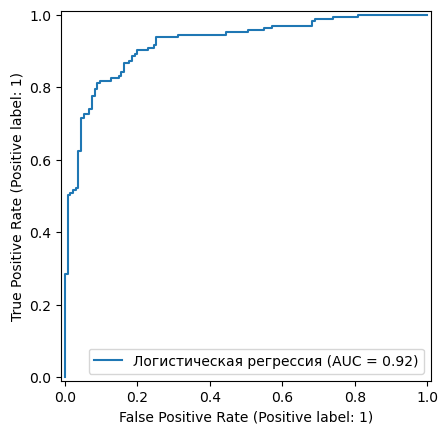

In [200]:
# Пример использования:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

decision_scores = model.decision_function(X_test)

RocCurveDisplay.from_predictions(y_test, decision_scores, name='Логистическая регрессия')

plt.show()

# 1.12  roc_auc_score(), auc()

In [201]:
# AUC – это площадь под кривой (area under curve).
 
# ROC-AUC – это площадь под ROC-кривой (Receiver Operating Characteristic). 
# Часто, в машинном обучении, когда говорят "AUC", то подразумевают именно ROC-AUC.

# ROC-AUC принимает значения от 0 до 1. 
# Чем больше площадь под ROC-кривой, 
# тем лучше модель в целом различает классы.

In [202]:
# Чем выше ROC-AUC, тем лучше модель различает положительные и отрицательные примеры на разных порогах классификации. 
# Это означает, что модель умеет точно находить положительные примеры (TPR высокий) и избегать ошибок в отрицательных (FPR низкий).

# Модели с высоким ROC-AUC обладают хорошей устойчивостью к изменениям порога, 
# поскольку их способность различать классы сохраняется на разных уровнях.

# Если ROC-AUC низкий, это значит, что модель плохо различает классы 
# и даже при изменении порога будет ошибаться.

In [203]:
# В библиотеке scikit-learn для расчёта метрики ROC-AUC используется функция roc_auc_score(). Эта функция имеет следующий синтаксис:

# roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None,   
#               multi_class='raise', labels=None)

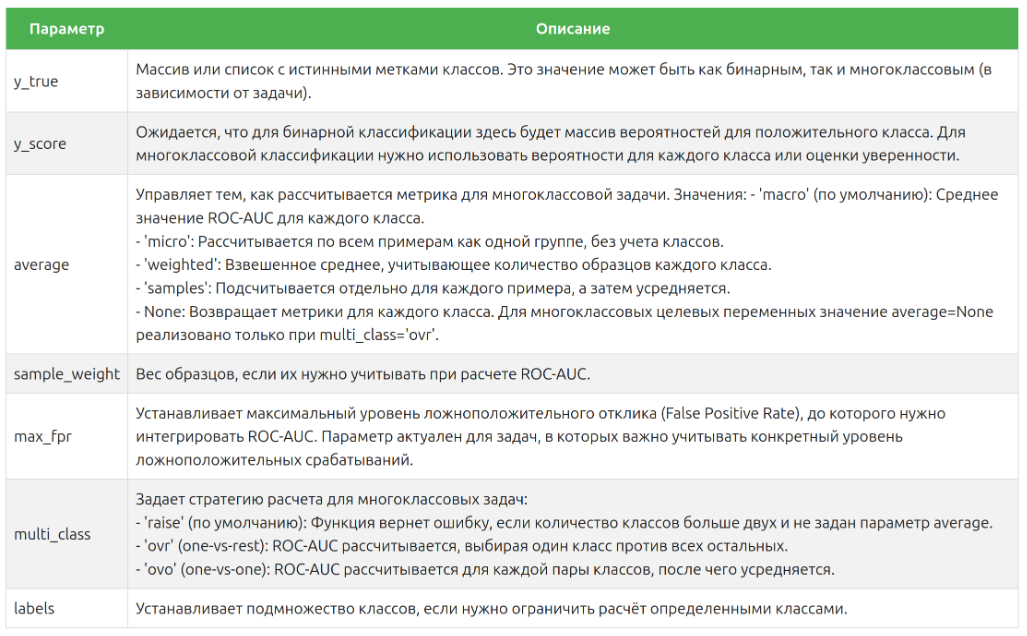

In [204]:
# Приведём простой пример использования функции roc_auc_score():

from sklearn.metrics import roc_auc_score

# Истинные метки классов
y_true = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]

# Предсказанные вероятности
y_score = [0.1, 0.7, 0.3, 0.55, 0.2, 0.4, 0.15, 0.9, 0.6, 0.85]  

auc = roc_auc_score(y_true, y_score)

print(f'AUC-ROC: {auc:.3f}')

AUC-ROC: 0.840


In [205]:
# Для вычисления AUC, функция roc_auc_score() использует метод трапеций. 
# В библиотеке NumPy имеется функция np.trapz(y, x), 
# которая вычисляет площадь под кривой, определенной набором точек (x, y), 
# с использованием метода трапеций. 
# Метод трапеций суммирует площади под кривой, разбивая её на трапеции.

# Попробуем рассчитать площадь под ROC-кривой без использования функции roc_auc_score():

from sklearn.metrics import roc_curve
import numpy as np

# Истинные метки классов
y_true = [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]

# Предсказанные вероятности
y_score = [0.1, 0.7, 0.3, 0.55, 0.2, 0.4, 0.15, 0.9, 0.6, 0.85]

# Вычисление ROC-кривой с использованием функции roc_curve
fpr, tpr, _ = roc_curve(y_true, y_score)

# Считаем площадь под кривой (AUC) с использованием метода трапеций
auc_manual = np.trapz(tpr, fpr)

print(f'ROC-AUC: {auc_manual:.3f}')

ROC-AUC: 0.840


C:\Users\pong\AppData\Local\Temp\ipykernel_23596\2666365493.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_manual = np.trapz(tpr, fpr)


In [206]:
# Создадим синтетические данные и рассчитаем ROC-AUC для трёх моделей: 
# логистической регрессии, 
# решающего дерева,
# случайного леса:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Логистическая регрессия
model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)
y_proba1 = model1.predict_proba(X_test)[:, 1]
auc1 = roc_auc_score(y_test, y_proba1)

# Дерево решений
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)
y_proba2 = model2.predict_proba(X_test)[:, 1]
auc2 = roc_auc_score(y_test, y_proba2)

# Случайный лес
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)
y_proba3 = model3.predict_proba(X_test)[:, 1]
auc3 = roc_auc_score(y_test, y_proba3)

print(f'ROC-AUC для логистической регрессии: {auc1:.3f}')
print(f'ROC-AUC для дерева решений: {auc2:.3f}')
print(f'ROC-AUC для случайного леса: {auc3:.3f}')

ROC-AUC для логистической регрессии: 0.923
ROC-AUC для дерева решений: 0.868
ROC-AUC для случайного леса: 0.948


In [207]:
# Добавим к этому результату расчёт метрики accuracy, для сравнения:

from sklearn.metrics import accuracy_score

# Логистическая регрессия
y_pred1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

# Дерево решений
y_pred2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)

# Случайный лес
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)

print(f'ROC-AUC для логистической регрессии: {auc1:.3f}')
print(f'ROC-AUC для дерева решений: {auc2:.3f}')
print(f'ROC-AUC для случайного леса: {auc3:.3f}', end='\n\n')

print(f'Accuracy для логистической регрессии: {accuracy1:.3f}')
print(f'Accuracy для дерева решений: {accuracy2:.3f}')
print(f'Accuracy для случайного леса: {accuracy3:.3f}')

ROC-AUC для логистической регрессии: 0.923
ROC-AUC для дерева решений: 0.868
ROC-AUC для случайного леса: 0.948

Accuracy для логистической регрессии: 0.847
Accuracy для дерева решений: 0.863
Accuracy для случайного леса: 0.887


In [208]:
# ROC-AUC измеряет качество ранжирования, проверяя, склонна ли модель 
# присваивать более высокие вероятности положительным примерам по сравнению с отрицательными.

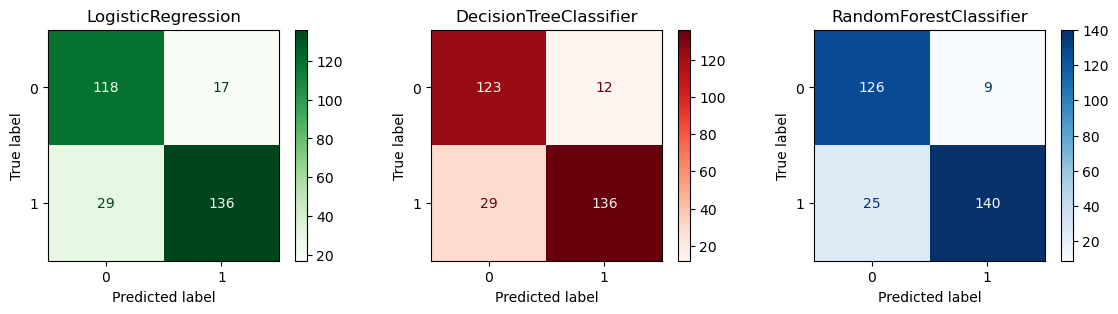

In [209]:
# Для информативности также построим матрицы ошибок, 
# предварительно создав пользовательскую функцию для снижения объёма дублируемого кода:

from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt


def make_cmd(y_true, y_pred, name, gridspec, cmap='Greens'):
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap=cmap, ax=fig.add_subplot(gridspec))
    plt.title(name)
    

fig = plt.figure(figsize=(14, 3))
gs = GridSpec(nrows=1, ncols=3, figure=fig)

make_cmd(y_test, y_pred1, 'LogisticRegression', gs[0, 0])
make_cmd(y_test, y_pred2, 'DecisionTreeClassifier', gs[0, 1], 'Reds')
make_cmd(y_test, y_pred3, 'RandomForestClassifier', gs[0, 2], 'Blues')

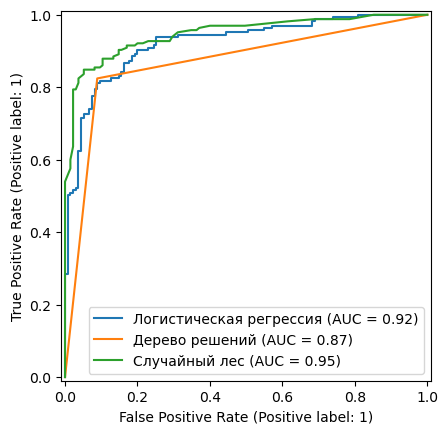

In [210]:
# У моделей логистической регрессии и случайного леса, значения ROC-AUC хорошо выше показателей accuracy, 
# а у модели решающего дерева – не сильно различаются. 
# Давайте визуализируем ROC-кривые:

RocCurveDisplay.from_predictions(y_test, y_proba1, name='Логистическая регрессия', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba2, name='Дерево решений', ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, y_proba3, name='Случайный лес', ax=plt.gca())

plt.show()

In [211]:
# В случае с DecisionTreeClassifier предсказанные вероятности могут принимать только значения 0 и 1, 
# так как дерево решений строится так, чтобы полностью разделять данные по каждой из своих веток. 
# Поскольку дерево решений стремится идеально разделить данные, 
# каждый конечный узел (лист) содержит объекты только одного класса.

# Следовательно:
# Если в конечном узле (листе) все объекты принадлежат к классу 1, 
# то предсказанная вероятность для этого класса будет равна 1.
# Если все объекты принадлежат к классу 0, 
# то вероятность для класса 1 будет равна 0.

# Поэтому ROC-кривая для дерева решений состоит из двух прямых линий.

## Параметр max_fpr функции roc_auc_score()

In [212]:
# Параметр max_fpr в функции roc_auc_score() позволяет ограничить расчёт AUC (площади под кривой) 
# только на интервале до определённого уровня ложноположительных срабатываний (False Positive Rate, FPR), 
# что может быть востребовано в случаях, когда важно, 
# чтобы модель хорошо работала на низком уровне ложноположительных ошибок.

In [213]:
# Например, представьте, что вы разрабатываете систему безопасности, где критически важно, 
# чтобы ложные срабатывания были минимальны. 

# При этом вы хотите знать, насколько хорошо модель определяет настоящие угрозы именно в условиях, 
# когда ложноположительных срабатываний мало.

# Вот тут и пригодится max_fpr. Устанавливая, например, max_fpr=0.1, 
# мы говорим функции roc_auc_score(): 
# «Посчитай площадь под кривой только там, где ложноположительные срабатывания не превышают 10%». 
# Это помогает нам сосредоточиться на той области, где модель остаётся достаточно "чистой" от ложных тревог, 
# и оценить её качество именно в этой ситуации.

In [214]:
# В нашем примере для моделей логистической регрессии и случайного леса посчитаем AUC при доле ложных срабатываний, не превышающей 0.1:

# Логистическая регрессия
auc1_10 = roc_auc_score(y_test, y_proba1, max_fpr=0.1)

# Случайный лес
auc3_10 = roc_auc_score(y_test, y_proba3, max_fpr=0.1)

print(f'ROC-AUC с параметром max_fpr=0.1 для логистической регрессии: {auc1_10:.3f}')
print(f'ROC-AUC с параметром max_fpr=0.1 для случайного леса: {auc3_10:.3f}')
print()
print(f'ROC-AUC для логистической регрессии: {auc1:.3f}')
print(f'ROC-AUC для случайного леса: {auc3:.3f}', end='\n\n')

ROC-AUC с параметром max_fpr=0.1 для логистической регрессии: 0.811
ROC-AUC с параметром max_fpr=0.1 для случайного леса: 0.884

ROC-AUC для логистической регрессии: 0.923
ROC-AUC для случайного леса: 0.948



In [215]:
# Когда вы задаёте max_fpr=0.1, функция roc_auc_score() не обрезает кривую 
# и не считает площадь под ней до 10% ложноположительных срабатываний как пропорцию всей площади. 
# Вместо этого она использует нормализацию для этой ограниченной области.

# При max_fpr=0.1 roc_auc_score() смотрит только на первую часть кривой (до FPR=0.1), 
# а затем нормализует эту площадь так, как будто она представляет всю кривую.

# То есть, она как бы растягивает этот участок на всю шкалу (от 0 до 1), 
# чтобы значение оставалось в привычном диапазоне (от 0 до 1).

# В нашем примере, значение 0.884 для случайного леса при max_fpr=0.1 показывает, 
# что в первой части кривой, где FPR доходит только до 10%, модель работает хорошо. 
# А результат 0.948 на полной кривой говорит о том, что на всех уровнях FPR модель демонстрирует хорошее качество.

In [216]:
# Высокий ROC-AUC означает, что модель хорошо разделяет классы, но, 
# чтобы интерпретировать его, важно понимать контекст задачи. Вот общие ориентиры:

# ROC-AUC = 0.5 – случайное угадывание. Модель не лучше случайного выбора 
# (в бинарной классификации это аналог подбрасывания монетки). 
# Такой результат указывает на то, что модель не выявляет различия между классами.

# 0.6-0.7 – модель с низкой разделяющей способностью. 
# Она различает классы лучше, чем случайное угадывание, но еще недостаточно для практического применения.

# 0.7-0.8 – умеренная способность к различению. 
# Такой AUC может быть приемлем для некоторых задач, где четкое разделение не требуется, но все равно есть над чем работать.

# 0.8-0.9 – хорошая способность к различению. 
# Модель с таким ROC-AUC уже является достаточно надежной, и в большинстве случаев ее предсказания можно считать полезными.

# 0.9 и выше – отличное разделение. 
# Модель очень хорошо различает классы, и ее можно использовать в задачах, где точность предсказаний имеет критическое значение.

In [217]:
# Однако, какое значение ROC-AUC считать "высоким", зависит от требований конкретной задачи:

# Медицина: 
# Для задач, таких как диагностика заболеваний, обычно стремятся к 
# ROC-AUC выше 0.9, так как ошибка может быть критичной.

# Маркетинг: 
# В задачах, где классифицируется склонность клиентов к покупкам, 
# ROC-AUC около 0.7-0.8 может считаться достаточным, так как ошибки менее критичны.

# Технические задачи: 
# В инженерии, например, для анализа отказов оборудования, также важно высокое значение, 
# часто выше 0.85-0.9.

# Таким образом, "высокий" ROC-AUC – это не фиксированное значение, 
# а относительное понятие, зависящее от конкретной сферы и требований к качеству модели.

## ROC-AUC в многоклассовых задачах

In [218]:
# В многоклассовых задачах функция roc_auc_score() используется 
# с одновременным применением параметров multi_class и average.

# Для параметра multi_class выбирается одно их двух значений: 
# ovr (one-vs-rest) и ovo (one-vs-one) – это два разных подхода к многоклассовой классификации.

# ovr:
# для каждого класса рассчитывается AUC по отношению ко всем остальным классам, 
# что может быть более устойчивым при наличии дисбаланса классов.

# ovo: 
# рассматриваются все возможные пары классов, где AUC считается для каждой пары независимо. 
# Этот метод полезен для случаев, когда классы сбалансированы, 
# но может давать более низкие значения при сильном дисбалансе.

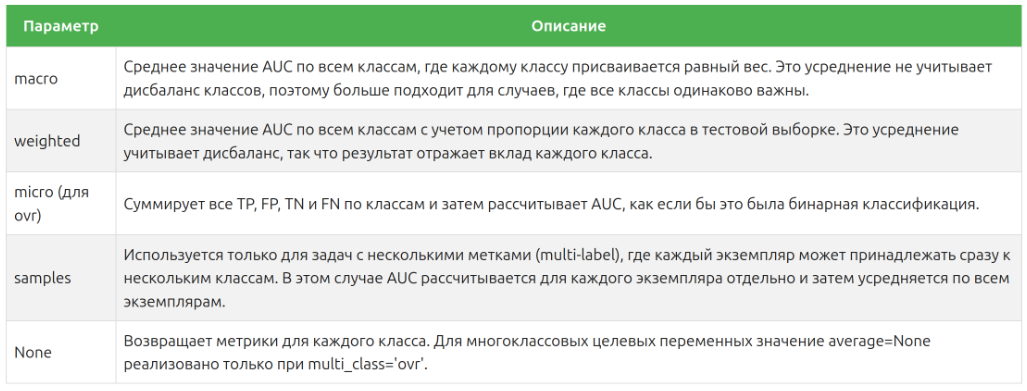

In [219]:
# Для примера, создадим датасет с дисбалансом классов (weights=[0.7, 0.2, 0.1]), 
# разделим на обучающую и тестовую выборки, 
# обучим модель логистической регрессии и 
# сделаем несколько расчётов для разных сочетаний параметров multi_class и average:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Создаем набор данных с дисбалансом классов
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, n_redundant=2,
                           weights=[0.7, 0.2, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Обучение модели
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Получение прогнозов
y_proba = model.predict_proba(X_test)

# Примеры с multi_class='ovr'
roc_auc_ovr_micro = roc_auc_score(y_test, y_proba, multi_class='ovr', average='micro')
roc_auc_ovr_macro = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')
roc_auc_ovr_weighted = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

# Примеры с multi_class='ovo'
roc_auc_ovo_macro = roc_auc_score(y_test, y_proba, multi_class='ovo', average='macro')
roc_auc_ovo_weighted = roc_auc_score(y_test, y_proba, multi_class='ovo', average='weighted')

print(f'ROC-AUC (ovr, micro): {roc_auc_ovr_micro:.3f}')
print(f'ROC-AUC (ovr, macro): {roc_auc_ovr_macro:.3f}')
print(f'ROC-AUC (ovr, weighted): {roc_auc_ovr_weighted:.3f}', end='\n\n')

print(f'ROC-AUC (ovo, macro): {roc_auc_ovo_macro:.3f}')
print(f'ROC-AUC (ovo, weighted): {roc_auc_ovo_weighted:.3f}')

ROC-AUC (ovr, micro): 0.939
ROC-AUC (ovr, macro): 0.892
ROC-AUC (ovr, weighted): 0.915

ROC-AUC (ovo, macro): 0.832
ROC-AUC (ovo, weighted): 0.882


In [220]:
# Посмотрим на результаты:

# ROC-AUC (ovr, micro): 0.939: 
# Это высокое значение указывает на то, что модель хорошо справляется с классификацией всех классов в совокупности. 
# Высокий micro ROC-AUC – это признак сильной общей разграничительной способности модели.

# ROC-AUC (ovr, macro): 0.892 и AUC-ROC (ovr, weighted): 0.916: 
# Значения близки, но weighted чуть выше, что говорит о том, что модель лучше классифицирует классы с большим числом образцов. 
# Это подтверждает, что дисбаланс классов немного влияет на точность предсказаний.

# ROC-AUC (ovo, macro): 0.832 и AUC-ROC (ovo, weighted): 0.882: 
# Эти значения ниже, чем ovr, что может указывать на то, что метод ovo менее устойчив к дисбалансу в данном наборе данных. 
# Параметр weighted снова выше, так как учтены веса классов, а macro дает более общее представление.

In [221]:
# Метод one-vs-one (ovo) в условиях сильного дисбаланса классов может показывать более низкие значения метрики AUC, 
# потому что он строит отдельные классификаторы для каждой пары классов и не учитывает распределение классов в наборе данных.

# Вот подробнее, как это происходит:

# Принцип работы ovo: 
# Метод ovo строит классификатор для каждой возможной пары классов. 
# Это означает, что для трёх классов (A, B и C) будет построено три классификатора: 
# один для пары A vs B, второй для A vs C, и третий для B vs C. 
# Таким образом, каждая пара обрабатывается как отдельная задача бинарной классификации.

# Влияние дисбаланса: 
# Когда классы сильно дисбалансированы (например, A составляет 70% данных, B – 20%, а C – 10%), 
# модель, тренируемая на одной паре (скажем, A vs B), видит больше примеров класса A, чем класса B. 
# Это может привести к тому, что модель "подстраивается" под более крупный класс, 
# снижая качество классификации меньшего класса. 
# Такие перекосы усиливаются в парах, где участвует наименьший класс, 
# поскольку для него примеров еще меньше.

# Пример на паре A vs C: 
# В классификаторе A vs C дисбаланс будет еще более заметен, 
# так как A будет иметь намного больше примеров по сравнению с C. 
# Модель в таком случае может плохо справляться с распознаванием класса C, 
# а также предсказывать A чаще, чем это корректно, из-за ограниченного объема данных для класса C. 
# В итоге для этой пары AUC будет ниже.

# Итоговое усреднение: 
# Значение AUC для метода ovo усредняется по всем парам. 
# Если модель слабо различает классы в парах, включающих меньшие классы (например, A vs C или B vs C), 
# то итоговое значение AUC будет заниженным.

In [222]:
# Напротив, метод one-vs-rest (ovr) классифицирует каждый класс против всех остальных сразу, 
# что позволяет модели видеть больше примеров меньших классов в каждом бинарном классификаторе. 
# За счет этого модель лучше "учится" различать классы, включая меньшие классы, 
# и итоговые значения AUC для ovr могут быть выше и стабильнее в условиях дисбаланса.

In [223]:
# Метод one-vs-one (ovo) может быть востребован в ряде ситуаций, 
# особенно когда классы хорошо сбалансированы, 
# и модель должна уметь различать тонкие различия между ними.

## Параметр labels функции roc_auc_score()

In [224]:
# Параметр labels функции roc_auc_score() позволяет указать, 
# какие классы нужно учитывать при вычислении AUC для многоклассовых задач.

# Например, если у вас есть 4 класса, а вы хотите рассчитать метрику только для 3 из них, 
# можно указать эти 3 класса с помощью labels. 

In [225]:
# Реализуем этот сценарий на практике. 
# Предположим, что нам нужно получить значение ROC-AUC только для трёх классов [0, 1, 2].

# Для начала создадим датасет, имеющий 4 класса, 
# разделим данные на обучающую и тестовую выборки, 
# обучим модель логистической регрессии и 
# сделаем предсказания вероятностей:

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import normalize

# Создаем набор данных с 4 классами
X, y = make_classification(n_samples=1000, n_classes=4, n_informative=5, n_redundant=0, random_state=42)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказание вероятностей
y_proba = model.predict_proba(X_test)

In [226]:
# Если сразу перейдём к расчёту ROC-AUC, то получим ошибку. 
# Дело в том, что когда мы указываем labels=[0, 1, 2], 
# функция roc_auc_score() ожидает только 3 столбца в y_score 
# (в нашем случае переменная называется y_proba), что вызовет ошибку.

# Чтобы корректно использовать параметр labels при работе с roc_auc_score, 
# нужно убедиться, что предсказания y_score включают только те классы, которые указаны в labels.

# Уберём из y_test и y_proba четвёртый класс (имеющий метку 3), и сделаем это следующим образом:

import numpy as np

# Отфильтруем y_test для классов 0, 1 и 2
mask = np.isin(y_test, [0, 1, 2])
y_test_filtered = y_test[mask]

# Отфильтруем y_proba, оставив только столбцы для классов 0, 1 и 2
y_proba_filtered = y_proba[mask][:, [0, 1, 2]]

In [227]:
# Теперь вызовем функцию roc_auc_score():

from sklearn.metrics import roc_auc_score

# roc_auc = roc_auc_score(y_test_filtered, y_proba_filtered, multi_class='ovr', average='macro', labels=[0, 1, 2])

# И снова получим ошибку.

# Ошибка возникает, потому что после фильтрации, 
# вероятности по выбранным классам [0, 1, 2] в y_proba_filtered не суммируются до 1 для каждой строки, 
# как требуется для многоклассового расчёта roc_auc_score().

# Чтобы решить эту проблему, можно нормализовать вероятности в y_proba_filtered так, 
# чтобы они снова суммировались до 1. 
# Сделаем это при помощи функции normalize из модуля sklearn.preprocessing:

from sklearn.preprocessing import normalize

# Нормализуем вероятности по строкам
y_proba_normalized = normalize(y_proba_filtered, norm='l1', axis=1)

In [228]:
# Здесь:

# norm='l1' указывает, что следует нормализовать с использованием нормы L1 (сумма значений в каждой строке будет равна 1).
# axis=1 указывает, что нормализация выполняется по строкам, а не по столбцам.

In [229]:
# Теперь y_proba_normalized будет содержать нормализованные вероятности, 
# и их сумма по каждой строке будет равна 1, 
# и расчёт ROC-AUC произведётся без ошибки.

roc_auc = roc_auc_score(y_test_filtered, y_proba_normalized, multi_class='ovr', average='macro', labels=[0, 1, 2])
print(f'ROC-AUC для классов 0, 1 и 2: {roc_auc:.3f}')

ROC-AUC для классов 0, 1 и 2: 0.842


## auc()

In [230]:
# Функция auc() – это универсальный инструмент, применимый не только для ROC-кривых, 
# но для любого набора точек, где нужно посчитать площадь под кривой по методу трапеций.

In [231]:
# Функция auc() принимает два массива значений, представляющих координаты x и y точек на графике. 
# Её основное назначение – вычислить площадь под кривой, которую образуют эти точки.
#  
# Это делает её гибкой: auc() может быть полезна, когда у нас есть произвольные данные, 
# для которых нужно оценить площадь под линейно соединёнными точками, 
# и они необязательно связаны с ROC или Precision-Recall.

In [232]:
# Приведём пример. 
# Сгенерируем данные, 
# разделим их на обучающую и тестовую выборки, 
# обучим модель случайного леса и 
# посчитаем метрики precision и recall:

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=5000,      
    n_features=20,        
    n_classes=2,          
    weights=[0.95, 0.05], 
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_proba)

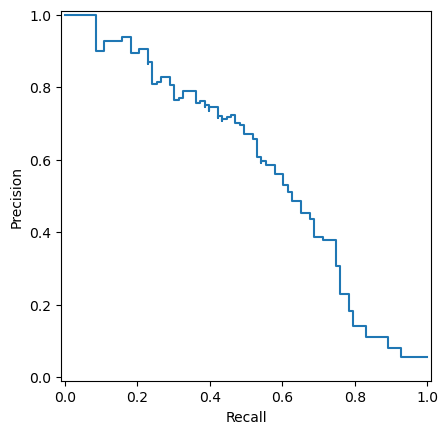

In [233]:
# Визуализируем кривую Precision-Recall:

from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

In [234]:
# При помощи функции auc(), рассчитаем площадь под кривой Precision-Recall:

from sklearn.metrics import auc

auc_pr = auc(recall, precision)

print(f'AUC-PR: {auc_pr:.3f}')

AUC-PR: 0.586


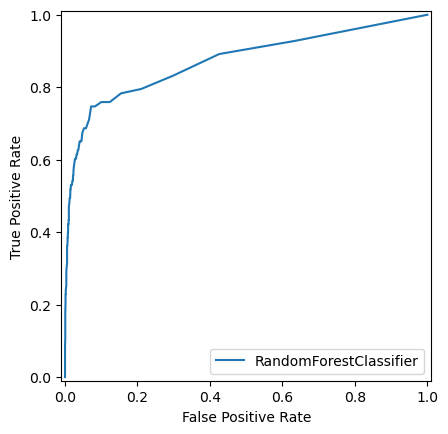

In [235]:
# А теперь посчитаем FPR и TPR и построим ROC-кривую:

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='RandomForestClassifier')
disp.plot()

plt.show()

In [236]:
# И снова, используя функцию auc(), рассчитаем прощадь, но уже под ROC-кривой:

auc_roc = auc(fpr, tpr)

print(f'ROC-AUC: {auc_roc:.3f}')

ROC-AUC: 0.873


In [237]:
# Таким образом, auc() – это универсальный инструмент для численного интегрирования, 
# который можно применять, когда нужно посчитать площадь под кривой на графике данных, 
# не ограничиваясь конкретными метриками или типами кривых.

## Задачи

In [238]:
# Рассчитайте и выведите на печать следующие значения:

# ROC-AUC на интервале до уровня ложноположительных срабатываний, равного 0.2.
# ROC-AUC на интервале до уровня ложноположительных срабатываний, равного 0.4.

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

num_1, num_2, num_3, num_4, num_5 = map(int, '1000 8 2 2 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Продолжите написание кода здесь

y_proba = model.predict_proba(X_test)[:, 1]

print('%.3f' % roc_auc_score(y_test, y_proba, max_fpr=0.2))
print('%.3f' % roc_auc_score(y_test, y_proba, max_fpr=0.4))

0.885
0.916


In [239]:
# Рассчитайте матрицу ошибок, а также micro, macro и weighted ROC-AUC, 
# используя метод: "один класс против всех остальных".

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9 = map(int, '2000 8 4 4 6 25 1 5 42'.split())
X, y = make_classification(n_samples=num_1,                   # количество примеров
                           n_features=num_2,                  # количество признаков
                           n_classes=num_3,                   # количество классов
                           n_informative=num_4,               # количество информативных признаков 
                           weights=[num_5/10, num_6/100, num_7/10, num_8/100], # веса классов
                           random_state=num_9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Продолжите написание кода здесь

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)

roc_auc_micro = roc_auc_score(y_test, y_proba, average='micro', multi_class='ovr')
roc_auc_macro = roc_auc_score(y_test, y_proba, average='macro', multi_class='ovr')
roc_auc_weighted = roc_auc_score(y_test, y_proba, average='weighted', multi_class='ovr')

print(cm, end='\n\n')
print(f'ROC AUC micro: {roc_auc_micro:.3f}')
print(f'ROC AUC macro: {roc_auc_macro:.3f}')
print(f'ROC AUC weighted: {roc_auc_weighted:.3f}')

[[345  13   5   0]
 [ 44 105   2   1]
 [ 25   7  31   0]
 [  5   5   1  11]]

ROC AUC micro: 0.951
ROC AUC macro: 0.915
ROC AUC weighted: 0.920


In [240]:
# Рассчитайте ROC-AUC для каждого класса. Вывод на печать уже прописан в прекоде.

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9 = map(int, '2000 8 4 4 6 25 1 5 42'.split())
X, y = make_classification(n_samples=num_1,                   # количество примеров
                           n_features=num_2,                  # количество признаков
                           n_classes=num_3,                   # количество классов
                           n_informative=num_4,               # количество информативных признаков 
                           weights=[num_5/10, num_6/100, num_7/10, num_8/100], # веса классов
                           random_state=num_9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Продолжите написание кода здесь

y_proba = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average=None)

print(f'ROC AUC: {roc_auc}')

ROC AUC: [0.92321373 0.92548755 0.88359788 0.9285939 ]


58.5


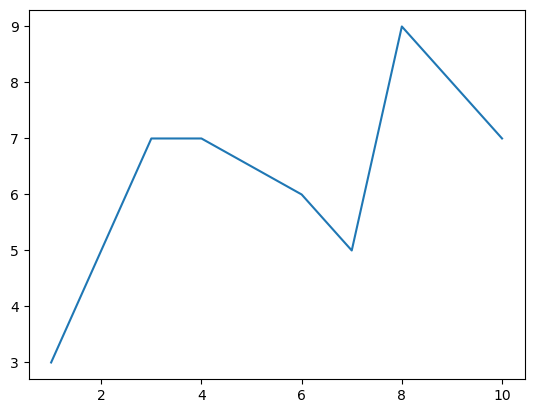

In [241]:
# Рассчитайте площадь под кривой с координатами x и y.
from sklearn.metrics import auc

x = [1, 2, 3, 4, 6, 7, 8, 10]
y = [3, 5, 7, 7, 6, 5, 9, 7]

print(auc(x, y))

plt.plot(x, y)
plt.show();

AUC-PR: 0.963


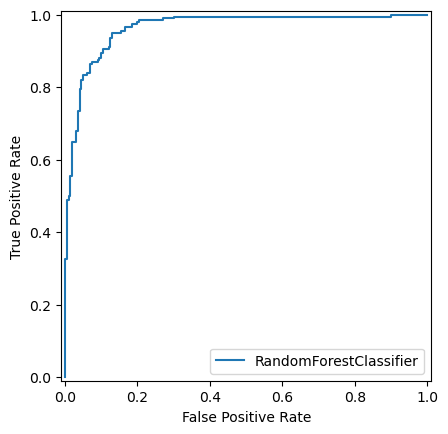

In [242]:
# Рассчитайте площадь под кривой Precision-Recall, 
# используя при этом не вероятности, а оценки уверенности модели.

from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

num_1, num_2, num_3, num_4, num_5 = map(int, '2000 8 2 2 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Продолжите написание кода здесь

decision_scores = model.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, decision_scores)
fpr, tpr, _ = roc_curve(y_test, decision_scores)

auc_pr = auc(recall, precision)

print(f'AUC-PR: {auc_pr:.3f}')

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name='RandomForestClassifier')
disp.plot()

plt.show();

# 1.13 f1_score(), fbeta_score()

## f1_score()

In [243]:
# Функция f1_score() библиотеки scikit-learn – это ключевая метрика в задачах классификации, 
# особенно если важен баланс между точностью (precision) и полнотой (recall). 
# Она помогает понять, насколько хорошо модель предсказывает целевой класс, 
# сводя воедино две важные характеристики: 
# насколько предсказания модели точны и сколько нужных примеров она находит.

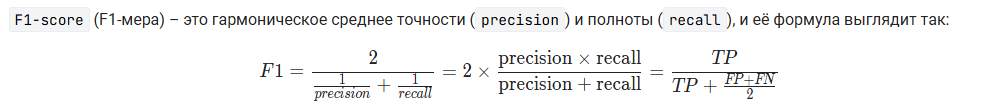

In [244]:
# Синтаксис функции f1_score():

# f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

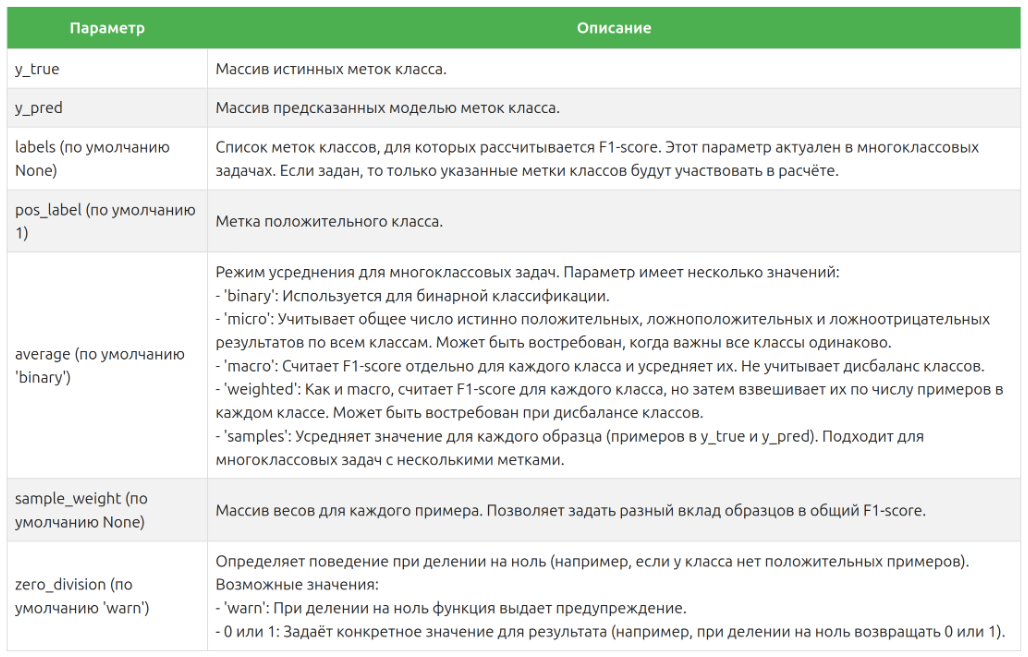

In [245]:
# Приведём пример. Сгенерируем данные, 
# разделим их на обучающую и тестовую выборки, 
# обучим модель дерева решений, 
# сделаем предсказания на тестовых данных и 
# посчитаем метрику F1-score:

from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализируем модель дерева решений и обучаем её
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Получаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Рассчитываем F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.3f}')

F1-score: 0.869


In [246]:
# Дополнительно посчитаем точность и полноту для большей информативности:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')

Precision: 0.919
Recall: 0.824


In [249]:
# Давайте также посмотрим на пример с многоклассовой классификацией. 
# Создадим датасет с тремя классами и с дисбалансом этих классов (weights=[0.7, 0.2, 0.1]). 
# Разделим датасет на обучающую и тестовую выборки, обучим модель дерева решений 
# и сделаем предсказания на тестовых данных. Затем, используя функцию f1_score(), 
# произведём расчёт F1-меры для разных режимов усреднения:

from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Создаем набор данных с дисбалансом классов
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, n_redundant=2,
                           weights=[0.7, 0.2, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Инициализируем модель случайного леса и обучаем её
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Получаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Рассчитываем F1-score
f1_micro = f1_score(y_test, y_pred, average='micro')
print(f'F1-score micro: {f1_micro:.3f}')

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f'F1-score macro: {f1_macro:.3f}')

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f'F1-score weighted: {f1_weighted:.3f}')

F1-score micro: 0.863
F1-score macro: 0.751
F1-score weighted: 0.867


In [ ]:
# Что мы можем вынести из полученных результатов:

# F1-score micro: 0.863:
# micro усредняет результаты по всем классам, 
# считая общее количество правильно и неправильно предсказанных объектов, 
# без учета их принадлежности к конкретному классу.
# Значение 0.863 указывает на то, что, в общем, модель хорошо предсказывает, 
# но это значение не показывает различий между классами.

# F1-score macro: 0.751:
# macro усредняет F1-меру для каждого класса поровну, 
# независимо от того, сколько объектов в каждом классе.
# Значение 0.751 ниже, чем micro, что указывает на то, что модель работает хуже на редких классах.
# Модель, вероятно, предсказывает большинство объектов в доминирующем классе (с весом 0.7), 
# но плохо работает с классами, где объектов меньше (0.2 и 0.1).

# F1-score weighted: 0.867:
# weighted усредняет F1-меру, учитывая размер каждого класса 
# (т.е. классы с большим количеством объектов больше влияют на итоговый результат).
# Значение 0.867 показывает, что модель работает особенно хорошо с наиболее распространенным классом (с весом 0.7).

# Таким образом, если цель – улучшить модель для всех классов, 
# стоит обратить внимание на macro F1-score и улучшить точность на редких классах.

In [ ]:
# Используя F1-score, важно учитывать не только само значение метрики, 
# но и её ограниченность в каждом конкретном контексте. 
# В условиях, когда необходима более сложная оценка ошибок или когда классы сильно несбалансированы, 
# F1-score должен рассматриваться как одна из нескольких метрик для полной и объективной оценки качества модели.

## fbeta_score()

In [ ]:
# F1-score – это метрика, которая уравновешивает точность (precision) и полноту (recall), давая им равный вес. 
# Но вот в чём особенность: она не позволяет гибко управлять соотношением между типами ошибок, 
# а именно между ложноположительными (False Positives, FP) и ложноотрицательными (False Negatives, FN).

In [ ]:
# В некоторых бизнес-задачах один тип ошибки более критичен, чем другой.
#  
# Рассмотрим пару показательных примеров:
# Медицина (диагностика заболеваний): 
# Пропустить заболевание (FN) часто гораздо опаснее, чем ошибочно диагностировать болезнь (FP). 
# Здесь важно, чтобы полнота (recall) была как можно выше, 
# даже если это приведёт к большему числу ложноположительных результатов.

# Финансы (выдача кредитов): 
# Отказ клиенту, который мог бы выплатить кредит (FN), может быть менее критичен, 
# чем одобрение кредита неблагонадёжному клиенту (FP). 
# Здесь наоборот, предпочтительно снизить число ложноположительных срабатываний, жертвуя некоторой полнотой.

In [ ]:
# F2-score: При расчёте F2-score полнота получает в два раза больший вес, чем точность. 
# Это полезно, когда важнее находить все положительные случаи (например, больных), 
# даже если точность страдает.

# F0.5-score: Здесь точность получает больший вес, чем полнота, 
# что предпочтительно в задачах, где ложноотрицательные ошибки нежелательны, например, 
# при кредитовании, когда важно уменьшить количество необоснованных одобрений.

# Итак, если в вашей задаче действительно важен не равный компромисс между FP и FN, 
# то вместо стандартного F1-score стоит использовать метрики, 
# которые могут акцентировать внимание на одном из типов ошибок 
# (например, F2-score для большей полноты или F0.5-score для большей точности).

# В scikit-learn можно рассчитать F2-score и F0.5-score, используя функцию fbeta_score(). 
# Эта функция позволяет задавать любой вес для точности и полноты с помощью параметра beta.

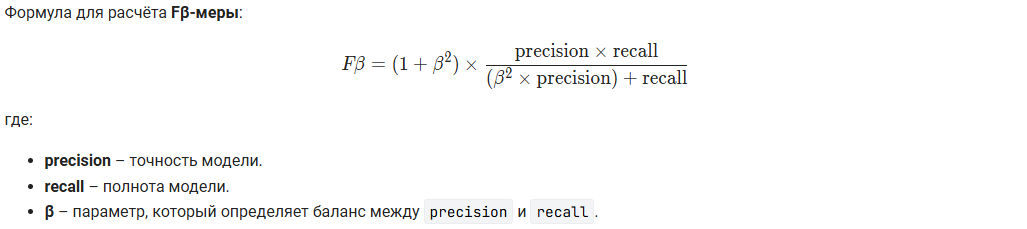

In [ ]:
# Синтаксис функции fbeta_score():

# sklearn.metrics.fbeta_score(y_true, y_pred, *, beta, labels=None, pos_label=1, average='binary', 
#                             sample_weight=None, zero_division='warn')

In [ ]:
# В этой функции нас интересует параметр beta, который определяет баланс между точностью (precision) и полнотой (recall).

# Если beta=1, fbeta_score соответствует f1_score, где точность и полнота уравновешены.
# Если beta=2, функция будет придавать больший вес полноте (это и есть F2-score).
# Если beta=0.5, больший вес будет отдан точности (это F0.5-score).

In [253]:
# Возьмём пример из предыдущего шага, в котором был произведён расчёт метрик: precision, recall и f1-score.

from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')

print()

# Используя функцию fbeta_score(), посчитаем F2-score и F0.5-score:

from sklearn.metrics import fbeta_score

# F2-score, где полнота важнее точности
f2 = fbeta_score(y_test, y_pred, beta=2)

# F0.5-score, где точность важнее полноты
f0_5 = fbeta_score(y_test, y_pred, beta=0.5)

print(f'F2-score: {f2:.3f}')
print(f'F0.5-score: {f0_5:.3f}')

Precision: 0.919
Recall: 0.824
F1-score: 0.869

F2-score: 0.842
F0.5-score: 0.898


In [ ]:
# Как можем наблюдать, значение метрики F0.5-score, в которой больший вес отдаётся точности (precision), 
# выше, чем у метрики F2-score, так как точность модели (precision=0.919) выше, чем её полнота (recall=0.824).

In [ ]:
# Таким образом, fbeta_score даёт гибкость в установке предпочтительного баланса 
# между точностью и полнотой в зависимости от значимости ошибок.

## Задачи

In [247]:
# В прекоде:
# Созданы два многометочных набора данных, при помощи функции make_multilabel_classification(). 
# В каждом датасете по четыре класса. В первом наборе содержится 300 примеров, во втором – 3000 примеров.
# Каждый датасет разделён на тренировочную и тестовую выборки;
# Обучены модели дерева решений DecisionTreeClassifier на тренировочных данных.

# Рассчитайте значения метрики F1-score для каждого датасета. 
# Выведите на печать эти значения, округлённые до трёх знаков после "запятой": 
# на первой строке – для первого датасета, на второй строке – для второго.

from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9, num_10, num_11, num_12 = map(int, '300 8 4 2 0 42 3000 8 4 2 0 42'.split())

# Набор данных с количеством экземпляров = 300
X_1, y_1 = make_multilabel_classification(n_samples=num_1,             # количество примеров
                                          n_features=num_2,            # количество признаков
                                          n_classes=num_3,             # количество классов
                                          n_labels=num_4,              # среднее количество меток на образец 
                                          allow_unlabeled=bool(num_5), # False – каждый образец гарантированно 
                                                                       # получает хотя бы одну метку
                                          random_state=num_6)

# Набор данных с количеством экземпляров = 3000
X_2, y_2 = make_multilabel_classification(n_samples=num_7,         
                                          n_features=num_8,           
                                          n_classes=num_9,             
                                          n_labels=num_10,              
                                          allow_unlabeled=bool(num_11), 
                                          random_state=num_12)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

model_1 = DecisionTreeClassifier(random_state=42)
model_1.fit(X_train_1, y_train_1)

model_2 = DecisionTreeClassifier(random_state=42)
model_2.fit(X_train_2, y_train_2)

# Продолжите написание кода здесь

y_pred_1 = model_1.predict(X_test_1)
y_pred_2 = model_2.predict(X_test_2)

f1_1 = f1_score(y_test_1, y_pred_1, average='samples')
f1_2 = f1_score(y_test_2, y_pred_2, average='samples')

print(f'{f1_1:.3f}')
print(f'{f1_2:.3f}')

0.784
0.844


In [248]:
# В прекоде произведены:

# создание многометочного набора данных с четырьмя классами;
# разделение данных на тренировочную и тестовую выборки;
# обучение на тренировочных данных моделей: дерева решений DecisionTreeClassifier 
# и случайного леса RandomForestClassifier.

# Рассчитайте значения метрики F1-score для каждой модели. 
# Выведите их на печать, округлив до трёх знаков после "запятой": 
# на первой строке – для DecisionTreeClassifier, на второй строке – для RandomForestClassifier.

from sklearn.datasets import make_multilabel_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

num_1, num_2, num_3, num_4, num_5, num_6 = map(int, '200 8 4 2 0 42'.split())
X, y = make_multilabel_classification(n_samples=num_1,             # количество примеров
                                      n_features=num_2,            # количество признаков
                                      n_classes=num_3,             # количество классов
                                      n_labels=num_4,              # среднее количество меток на образец 
                                      allow_unlabeled=bool(num_5), # False – каждый образец гарантированно 
                                                                   # получает хотя бы одну метку
                                      random_state=num_6)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)
# Продолжите написание кода здесь

y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)

f1_1 = f1_score(y_test, y_pred_1, average='samples')
f1_2 = f1_score(y_test, y_pred_2, average='samples')

print(f'{f1_1:.3f}')
print(f'{f1_2:.3f}')

0.818
0.898


# 1.14 precision_recall_fscore_support()

In [ ]:
# Функция precision_recall_fscore_support() вычисляет метрики Precision, Recall, F-score , 
# а также количество экземпляров в каждом классе для каждой категории в задаче классификации.

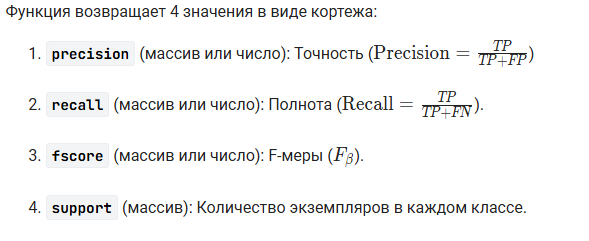

In [ ]:
# Поддержка (support) – это просто количество экземпляров каждого класса в истинных метках y_true, 
# без учета того, как модель предсказала (значения y_pred на это не влияют).
#  
# Даже если модель ошиблась или вообще не угадала, support останется таким же, 
# потому что функция считает только экземпляры в y_true.

In [ ]:
# Функция имеет следующий синтаксис:

# precision_recall_fscore_support(y_true, y_pred, *, beta=1.0, labels=None, pos_label=1, 
#                                 average=None, warn_for=('precision', 'recall', 'f-score'), 
#                                 sample_weight=None, zero_division='warn')

In [254]:
# Посмотрим на работу функции precision_recall_fscore_support() на простом примере:

from sklearn.metrics import precision_recall_fscore_support

y_true = [0, 1, 2, 1, 2, 0, 1, 2, 0, 2, 1, 1, 2]
y_pred = [0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2]

precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', fscore)
print('Support:', support)

Precision: [0.5 0.5 0.8]
Recall: [0.33333333 0.6        0.8       ]
F1-Score: [0.4        0.54545455 0.8       ]
Support: [3 5 5]


In [258]:
# Для улучшения читаемости данных, представим их в виде объекта DataFrame.

unique_values = sorted(np.unique(y_true))

# Создание датафрейма
results_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-Score': fscore, 'Support': support}, 
                          index=[f'Class {i}' for i in unique_values])
display(results_df)

Precision    Recall  F1-Score  Support
Class 0        0.5  0.333333  0.400000        3
Class 1        0.5  0.600000  0.545455        5
Class 2        0.8  0.800000  0.800000        5

In [ ]:
# В итоге для каждого класса посчитаны: точность, полнота и F1-мера, 
# а также количество экземпляров в наборе данных с истинными метками.

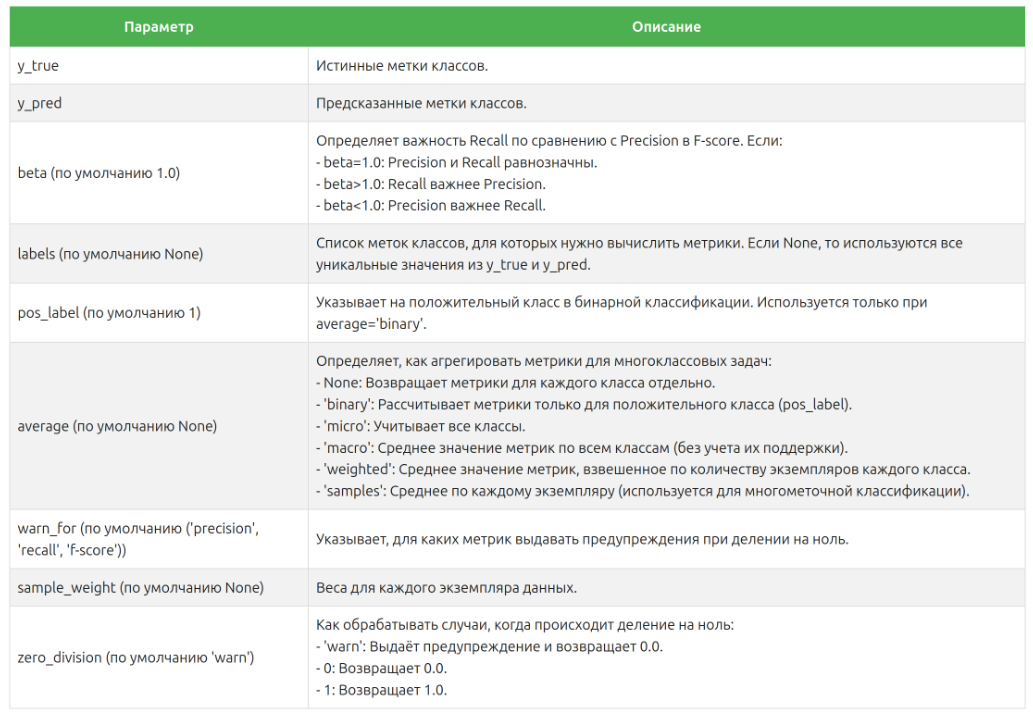

In [261]:
# Давайте сгенерируем набор данных с десятью признаками и тремя классами:

from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

# Генерация данных
X, y = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_classes=3, 
                           n_informative=7, 
                           n_redundant=2, 
                           n_clusters_per_class=1, 
                           weights=[0.85, 0.10, 0.05], 
                           flip_y=0.01, 
                           random_state=42)

# Добавим шум, чтобы усилить отличие редких классов
np.random.seed(42)
X[y == 1] += np.random.normal(0, 0.5, X[y == 1].shape)  
X[y == 2] += np.random.normal(0, 0.8, X[y == 2].shape)  

# Преобразуем в DataFrame для удобного отображения
n_features = 10
column_names = [f'feature_{i+1}' for i in range(n_features)]
df = pd.DataFrame(X, columns=column_names)
df['class'] = y

print(df['class'].value_counts())
display(df.head())

class
0    843
1    102
2     55
Name: count, dtype: int64


feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.878187  -0.021556  -0.850516   2.126736  -0.710257   2.664592   
1   3.229709  -4.578855  -0.654876  -1.915209  -2.035674   0.138363   
2   2.930155  -2.031738  -0.722219   1.110705  -0.853212   1.926767   
3   0.688598   1.161287   1.269233   1.532301  -0.601076   1.357126   
4  -1.079003  -0.569991  -1.127797   1.160931  -2.599680  -0.129556   

   feature_7  feature_8  feature_9  feature_10  class  
0   0.750390  -1.594369  -0.037059   -1.108289      0  
1   3.551400  -1.247078   1.120997   -0.374193      0  
2   0.196190  -1.161995   1.388660   -0.558683      0  
3   2.745435   1.074966  -0.731045   -1.314554      0  
4  -1.045383   3.466740  -1.367903    2.992344      1

In [262]:
# Применим модель дерева решений к этому набору данных и сделаем предсказания:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Инициализируем модель дерева решений и обучаем её
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Получаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

In [263]:
# Далее, используя функцию precision_recall_fscore_support(), расчитаем метрики:

from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', fscore)
print('Support:', support)

Precision: [0.95366795 0.85714286 0.69230769]
Recall: [0.97628458 0.77419355 0.5625    ]
F1-Score: [0.96484375 0.81355932 0.62068966]
Support: [253  31  16]


In [269]:
# И снова представим данные в виде датафрейма:

import pandas as pd

unique_values = sorted(np.unique(y_test))

# Создание датафрейма
results_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-Score': fscore, 'Support': support}, 
                          index=[f'Class {i}' for i in unique_values])
display(results_df)

Precision    Recall  F1-Score  Support
Class 0   0.953668  0.976285  0.964844      253
Class 1   0.857143  0.774194  0.813559       31
Class 2   0.692308  0.562500  0.620690       16

In [ ]:
# В этом примере функция precision_recall_fscore_support() использовалась с параметром average по умолчанию, когда average=None. 
# Давайте посмотрим как функция отработает с другими атрибутами этого параметра.

In [265]:
# average='micro':

precision_micro, recall_micro, fscore_micro, support_micro = precision_recall_fscore_support(y_test, y_pred,
                                                                                             average='micro')
print('Precision micro:', precision_micro)
print('Recall micro:', recall_micro)
print('F1-Score micro:', fscore_micro)
print('Support:', support_micro)

Precision micro: 0.9333333333333333
Recall micro: 0.9333333333333333
F1-Score micro: 0.9333333333333333
Support: None


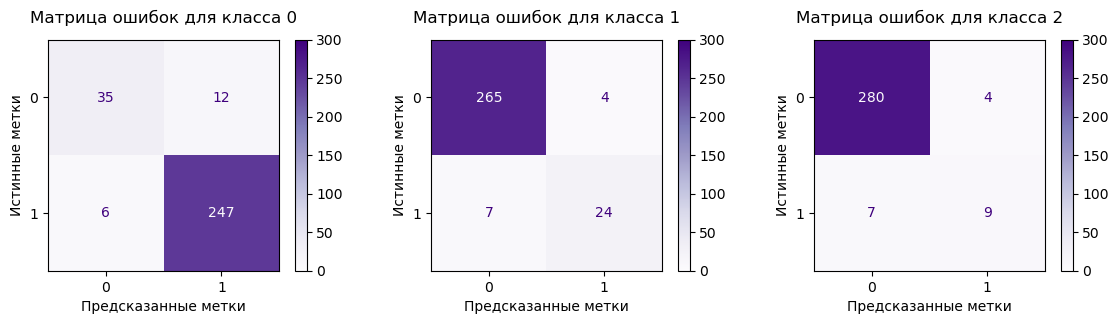

In [266]:
# Получаем одинаковое значение для всех трёх метрик. 
# Давайте проверим, правильным ли является, 
# что значения точности, полноты и F-меры для этого набора данных 
# и предсказаний модели будут одинаковыми.
 
# Для этого построим матрицу ошибок для каждого класса:

from matplotlib.gridspec import GridSpec
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt

# Вычисление многометочной матрицы ошибок
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Визуализация многометочной матрицы ошибок для каждой метки с горизонтальным отображением
fig = plt.figure(figsize=(14, 3))
gs = GridSpec(nrows=1, ncols=3, figure=fig)

for i, matrix in enumerate(mcm):
    ax = fig.add_subplot(gs[0, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=mcm[i])
    disp.plot(cmap='Purples', im_kw={'vmin': 0, 'vmax': 300}, ax=ax)
    plt.title(f'Матрица ошибок для класса {i}', pad=12)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')

plt.show()

In [ ]:
# При выборе average='micro', все классы рассматриваются как один общий класс. 
# Считается общее количество верно классифицированных объектов (TP), 
# ложноположительных объектов (FP) и ложноотрицательных объектов (FN) для всех классов вместе.

# Так как в нашем случае получается, что FP=FN, то и precision=recall. А раз precision=recall, то и F1-score тоже равен им.

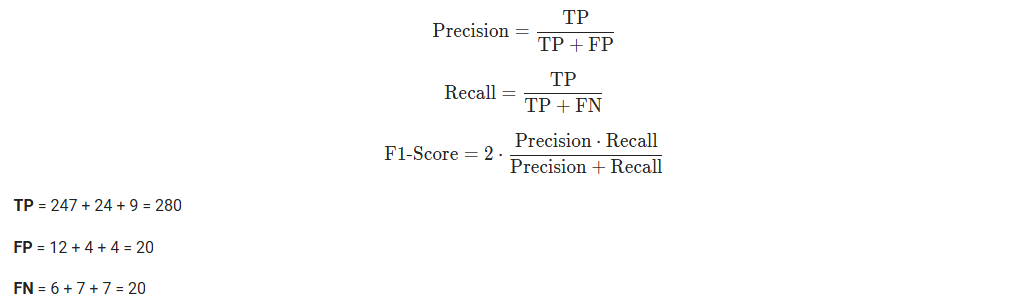

In [267]:
# average='macro':

precision_macro, recall_macro, fscore_macro, support_macro = precision_recall_fscore_support(y_test, y_pred,
                                                                                             average='macro')
print('Precision macro:', precision_macro)
print('Recall macro:', recall_macro)
print('F1-Score macro:', fscore_macro)
print('Support:', support_macro)

Precision macro: 0.8343728343728344
Recall macro: 0.7709927111224446
F1-Score macro: 0.7996975757354373
Support: None


In [268]:
# average='weighted'

precision_w, recall_w, fscore_w, support_w = precision_recall_fscore_support(y_test, y_pred,
                                                                             average='weighted')
print('Precision weighted:', precision_w)
print('Recall weighted:', recall_w)
print('F1-Score weighted:', fscore_w)
print('Support:', support_w)

Precision weighted: 0.9297544797544798
Recall weighted: 0.9333333333333333
F1-Score weighted: 0.9308561407193648
Support: None


In [ ]:
# Стоит отметить, что функция precision_recall_fscore_support() возвращает support, 
# только если параметр average равен None. 
# При усреднении (average='macro', 'weighted', или 'micro') support будет возвращаться как None, 
# потому что метрики сводятся к одному значению для всех классов.

## Задачи

In [283]:
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

num_1, num_2, num_3, num_4, num_5 = map(int, '1000 6 2 2 42'.split())
X, y = make_classification(n_samples=num_1,                 # количество примеров
                           n_features=num_2,                # количество признаков
                           n_classes=num_3,                 # количество классов
                           n_informative=num_4,             # количество информативных признаков 
                           random_state=num_5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Продолжите написание кода здесь
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

unique_values = sorted(np.unique(y_test))

df = pd.DataFrame(data=np.c_[precision, recall, fscore, support],
                  columns=['precision', 'recall', 'f1-score', 'support'],
                  index=[f'класс {i}' for i in unique_values])

print(df)

         precision    recall  f1-score  support
класс 0   0.897959  0.871287  0.884422    101.0
класс 1   0.872549  0.898990  0.885572     99.0


In [282]:
np.c_[precision, recall]

array([[0.89795918, 0.87128713],
       [0.87254902, 0.8989899 ]])

In [286]:
# В прекоде произведены:

# загрузка датасета 'digits';
# разделение данных на тренировочную и тестовую выборки;
# обучение модели дерева решений DecisionTreeClassifier на тренировочных данных.
# Выведите на печать:

# Матрицу ошибок для предсказанных и тестовых данных.
# Пустую строку.
# Значения precision, recall, f1-score, support, 
# рассчитанные для классов: 0, 3, 6, 8, 9 (каждый массив на новой строке).

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score

digits = load_digits()

X = digits.data  
y = digits.target  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Продолжите написание кода здесь
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, labels=[0, 3, 6, 8, 9])

print(cm)
print()
print(precision, recall, fscore, support, sep='\n')

[[48  0  0  1  2  1  0  0  0  1]
 [ 1 39  5  1  2  0  0  0  1  1]
 [ 3  3 35  3  0  0  0  1  1  1]
 [ 0  1  0 46  2  0  0  1  1  3]
 [ 0  3  1  1 51  0  2  1  0  1]
 [ 0  0  0  1  1 57  2  1  0  4]
 [ 0  0  0  1  2  0 50  0  0  0]
 [ 0  1  0  4  2  0  0 46  1  1]
 [ 0  6  0  1  0  0  0  1 33  2]
 [ 0  0  1  0  1  4  0  3  0 50]]

[0.92307692 0.77966102 0.92592593 0.89189189 0.78125   ]
[0.90566038 0.85185185 0.94339623 0.76744186 0.84745763]
[0.91428571 0.81415929 0.93457944 0.825      0.81300813]
[53 54 53 43 59]


# 1.15 classification_report()

In [ ]:
# Функция classification_report() библиотеки scikit-learn генерирует текстовый отчёт или отчёт в виде словаря, 
# содержащий основные метрики для оценки качества модели классификации. 
# Он выводит значения для каждой метрики по каждому классу, а также общие (средние) значения. 

# Вот основные элементы, которые включены в отчёт:

# 1. Для каждого класса (label из целевой переменной y_test):
# precision;
# recall;
# F1-score;
# support: число истинных примеров (наблюдений) для данного класса в тестовых данных.

# 2. Средние значения:
# accuracy;
# macro avg: средние значения precision, recall и F1-score по всем классам, вычисленные простым усреднением. 
# Все классы имеют одинаковый вес, независимо от их размера;
# weighted avg: средние значения precision, recall и F1-score по всем классам, 
# взвешенные на основе support, что учитывает дисбаланс классов, 
# так как классы с большим количеством примеров имеют больший вес.

In [ ]:
# Функция classification_report() имеет следующий синтаксис:

# classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, 
#                       digits=2, output_dict=False, zero_division='warn')

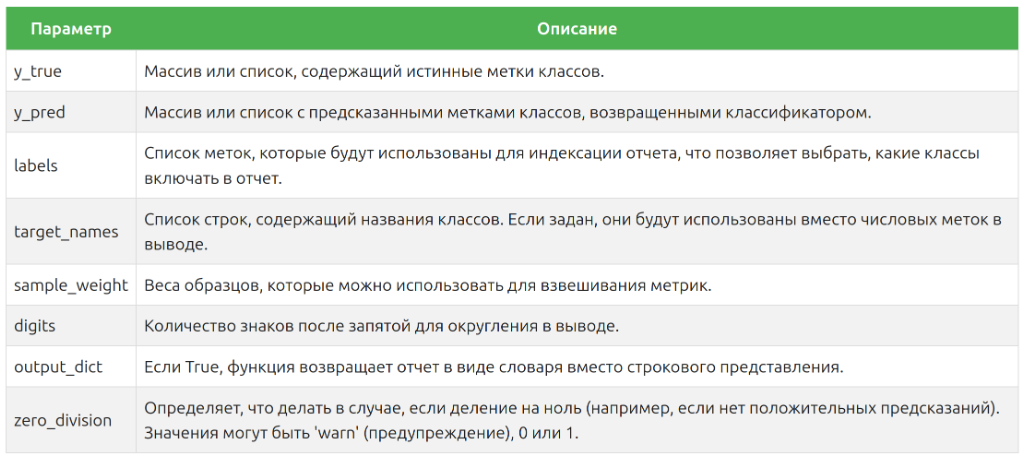

In [287]:
# Применим функцию classification_report() к датасету, который мы использовали в предыдущем уроке:

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_classes=3, 
                           n_informative=7, 
                           n_redundant=2, 
                           n_clusters_per_class=1, 
                           weights=[0.85, 0.10, 0.05], 
                           flip_y=0.01, 
                           random_state=42)

X[y == 1] += np.random.normal(0, 0.5, X[y == 1].shape)  
X[y == 2] += np.random.normal(0, 0.8, X[y == 2].shape)  

n_features = 10
column_names = [f'feature_{i+1}' for i in range(n_features)]
df = pd.DataFrame(X, columns=column_names)
df['class'] = y

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Используем функцию classification_report()
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       253
           1       0.88      0.90      0.89        31
           2       0.60      0.38      0.46        16

    accuracy                           0.94       300
   macro avg       0.81      0.75      0.77       300
weighted avg       0.93      0.94      0.93       300



In [288]:
# Параметр digits предоставляет возможность менять размерность значений. 
# Например, сделаем у десятичных чисел в отчёте 3 знака после запятой (digits=3):

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=3)

print(report)

              precision    recall  f1-score   support

           0      0.957     0.976     0.967       253
           1      0.875     0.903     0.889        31
           2      0.600     0.375     0.462        16

    accuracy                          0.937       300
   macro avg      0.811     0.752     0.772       300
weighted avg      0.930     0.937     0.932       300



In [ ]:
# Изменением названий классов в отчёте, управляет параметр target_names. 
# Для примера поменяем их наименования в отчёте следующим образом:

from sklearn.metrics import classification_report

unique_values = sorted(np.unique(y_test))

report = classification_report(y_test, y_pred, digits=3,
                               target_names=[f'Class {i}' for i in unique_values])

print(report)

              precision    recall  f1-score   support

     Class 0      0.957     0.976     0.967       253
     Class 1      0.875     0.903     0.889        31
     Class 2      0.600     0.375     0.462        16

    accuracy                          0.937       300
   macro avg      0.811     0.752     0.772       300
weighted avg      0.930     0.937     0.932       300



In [292]:
# По умолчанию функция classification_report() формирует отчёт в текстовом формате. 
# Если же параметру output_dict передать значение True, то отчёт будет сформирован в виде словаря:

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

display(report)

{'0': {'precision': 0.9573643410852714,
  'recall': 0.9762845849802372,
  'f1-score': 0.9667318982387475,
  'support': 253.0},
 '1': {'precision': 0.875,
  'recall': 0.9032258064516129,
  'f1-score': 0.8888888888888888,
  'support': 31.0},
 '2': {'precision': 0.6,
  'recall': 0.375,
  'f1-score': 0.46153846153846156,
  'support': 16.0},
 'accuracy': 0.9366666666666666,
 'macro avg': {'precision': 0.8107881136950904,
  'recall': 0.7515034638106167,
  'f1-score': 0.7723864162220327,
  'support': 300.0},
 'weighted avg': {'precision': 0.9297939276485789,
  'recall': 0.9366666666666666,
  'f1-score': 0.93174447064858,
  'support': 300.0}}

In [296]:
# Теперь преобразуем этот словарь в объект DataFrame:

import pandas as pd

report_df = pd.DataFrame(report).transpose()

display(report_df)

precision    recall  f1-score     support
0              0.957364  0.976285  0.966732  253.000000
1              0.875000  0.903226  0.888889   31.000000
2              0.600000  0.375000  0.461538   16.000000
accuracy       0.936667  0.936667  0.936667    0.936667
macro avg      0.810788  0.751503  0.772386  300.000000
weighted avg   0.929794  0.936667  0.931744  300.000000

In [298]:
# И в завершение рассмотрения возможностей функции classification_report(), отметим параметр labels, 
# при помощи которого можно управлять отображением классов в отчёте. 
# Например, сформируем отчёт только по двум классам:

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels=[0, 1])

print(report)

# Как вы можете заметить, некоторые показатели пересчитались, 
# и отчёт показывает значения метрик для классов 0 и 1, 
# не учитывая при этом класс 2. 
# А также вместо метрики accuracy появилась метрика micro avg.

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       253
           1       0.88      0.90      0.89        31

   micro avg       0.95      0.97      0.96       284
   macro avg       0.92      0.94      0.93       284
weighted avg       0.95      0.97      0.96       284



## Задачи

In [302]:
# Выведите на печать classification report. 
# В отчёте классы должны именоваться как: Класс 0, Класс 1 и т.д.

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np

num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9 = map(int, '500 8 4 4 6 25 1 5 42'.split())
X, y = make_classification(n_samples=num_1,                   # количество примеров
                           n_features=num_2,                  # количество признаков
                           n_classes=num_3,                   # количество классов
                           n_informative=num_4,               # количество информативных признаков 
                           weights=[num_5/10, num_6/100, num_7/10, num_8/100], # веса классов
                           random_state=num_9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Продолжите написание кода здесь

unique_values = sorted(np.unique(y_test))

report = classification_report(y_test, y_pred,
                               target_names=[f'Класс {i}' for i in unique_values],
                               zero_division=0)

print(report)

              precision    recall  f1-score   support

     Класс 0       0.69      0.92      0.79        59
     Класс 1       0.67      0.48      0.56        25
     Класс 2       0.50      0.18      0.27        11
     Класс 3       0.00      0.00      0.00         5

    accuracy                           0.68       100
   macro avg       0.46      0.39      0.40       100
weighted avg       0.63      0.68      0.63       100



# 1.16 det_curve()

# Tail